In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import time as time
import pyarrow as pa
import dask.dataframe as dd
from dask.distributed import Client
import dask
import gc
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def wind_eval(orig_height, target_height, ds, surface_roughness):
    """Takes in an xarray dataset and evaluates the wind speed magnitude at a certain height using formula, 
    then creates a new variables and assigns it to the database and replaces the original wind speed magnitude.
    Note: Sets values of wind magnitude > 25m/s to zero."""
    #creating magnitude
    ds = ds.assign(wind_mag=lambda ds: np.sqrt(ds.u100**2 + ds.v100**2))
    
    #function to adjust for height of wind turbine
    def multiply(x,surface_roughness=surface_roughness,orig_height=orig_height,target_height=target_height):
        alpha = 0.5*(surface_roughness/10)**0.2
        factor = (target_height/orig_height)**alpha
        return x*factor
        
    ds['wind_mag'] = xr.apply_ufunc(multiply, ds['wind_mag'],input_core_dims=[["longitude","latitude"]],
               output_core_dims=[["longitude", "latitude"]], dask = 'allowed', vectorize = True)
    #dropping values above 25ms-1 (cut-out speed)
    ds['wind_mag'] = ds['wind_mag'].where((ds['wind_mag']<=25) & (ds['wind_mag']>0),0, drop=False)
    ds.wind_mag.attrs["units"] = "m s**-1"
    return ds

In [3]:
#importing dataset
paths = ["/share/data1/xzcaplbl/100m_1982_to_2022_8.3MW.nc"]
ds = xr.open_mfdataset(paths, parallel=True,chunks={'latitude': -1, 'longitude': -1, 'time': -1} ,concat_dim='time', data_vars='minimal',combine='nested',coords='minimal',compat='override')

/share/data1/xzcaplbl/anaconda3/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.29.0
  warnings.warn(


Text(0.5, 1.0, 'Wind Magnitude at Latitude 55 and Longitude -5')

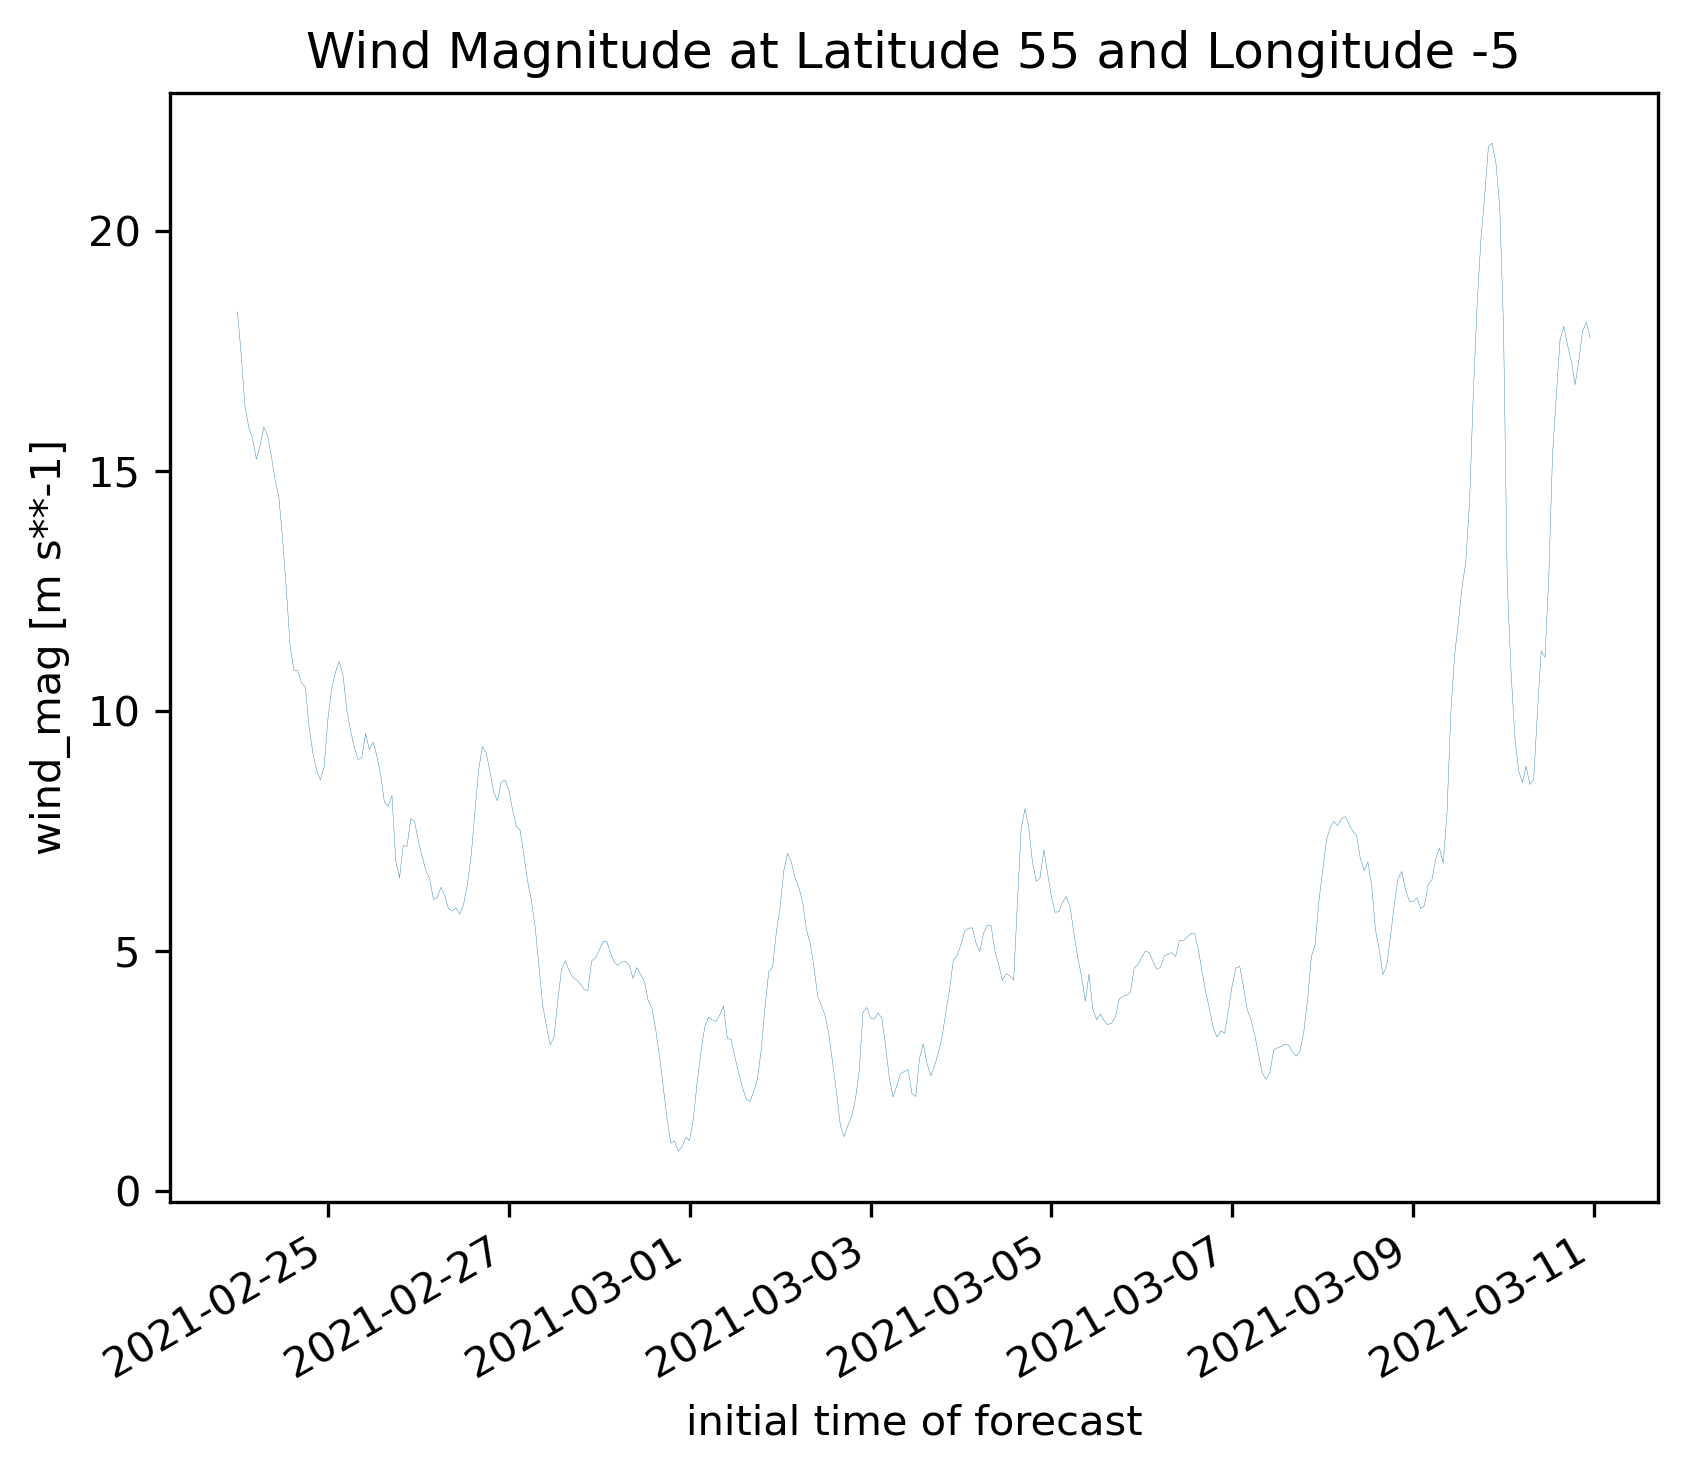

In [4]:
longitude = -5
latitude = 55

#plotting
plt.figure(dpi=300)
ds.sel(latitude=[latitude], longitude=[longitude],time=slice('2021-02-24', '2021-03-10'))['wind_mag'].plot(linewidth=0.1)
plt.title('Wind Magnitude at Latitude {} and Longitude {}'.format(latitude, longitude))

Text(0.5, 1.0, 'Power Output at Latitude 55 and Longitude -5')

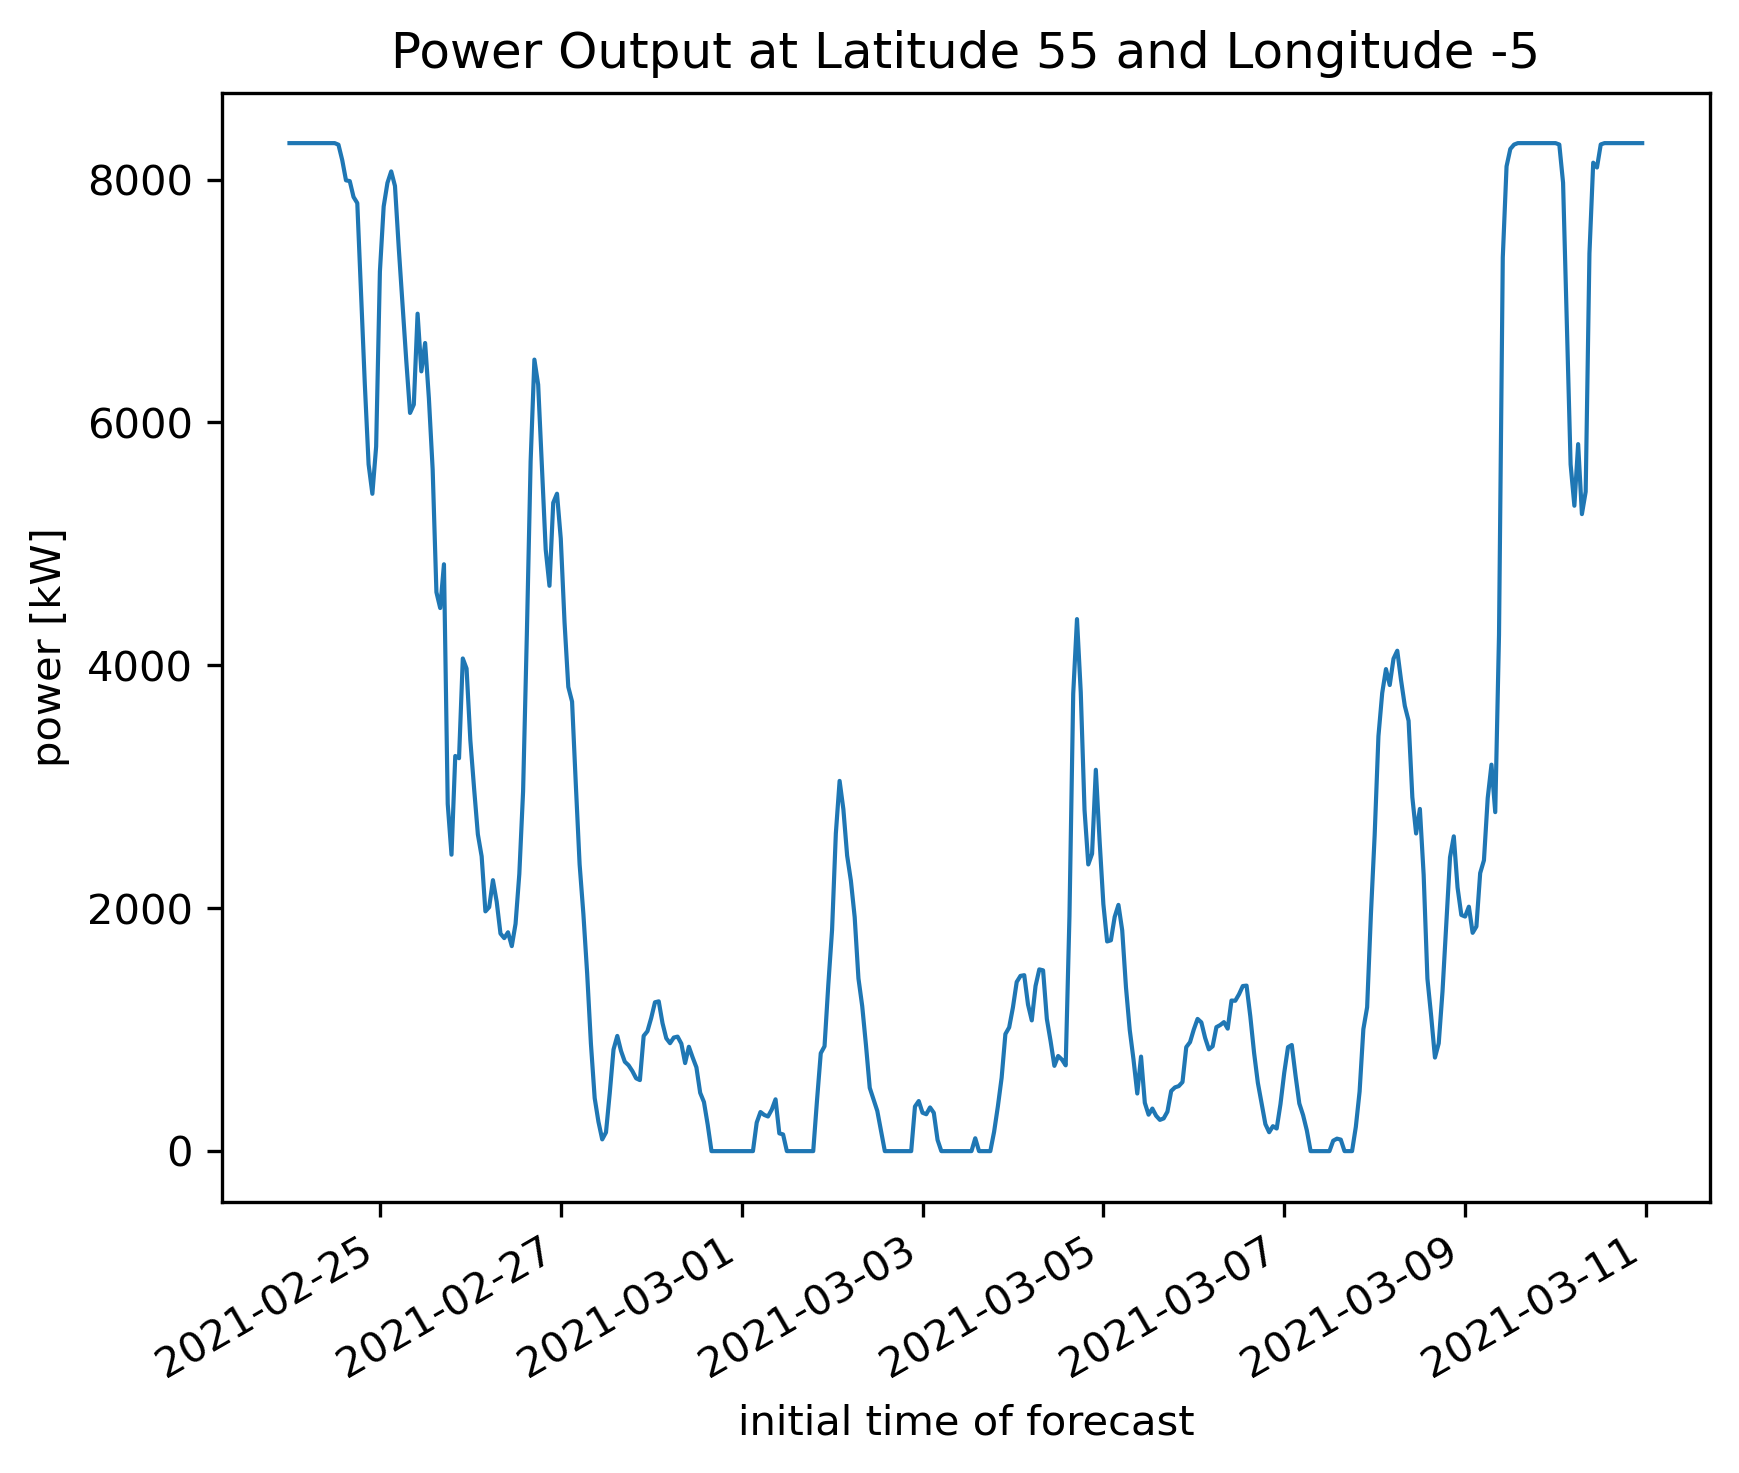

In [5]:
longitude = -5
latitude = 55

#plotting
plt.figure(dpi=300)
ds.sel(latitude=[latitude], longitude=[longitude],time=slice('2021-02-24', '2021-03-10'))['power'].plot(linewidth=1)
plt.title('Power Output at Latitude {} and Longitude {}'.format(latitude, longitude))

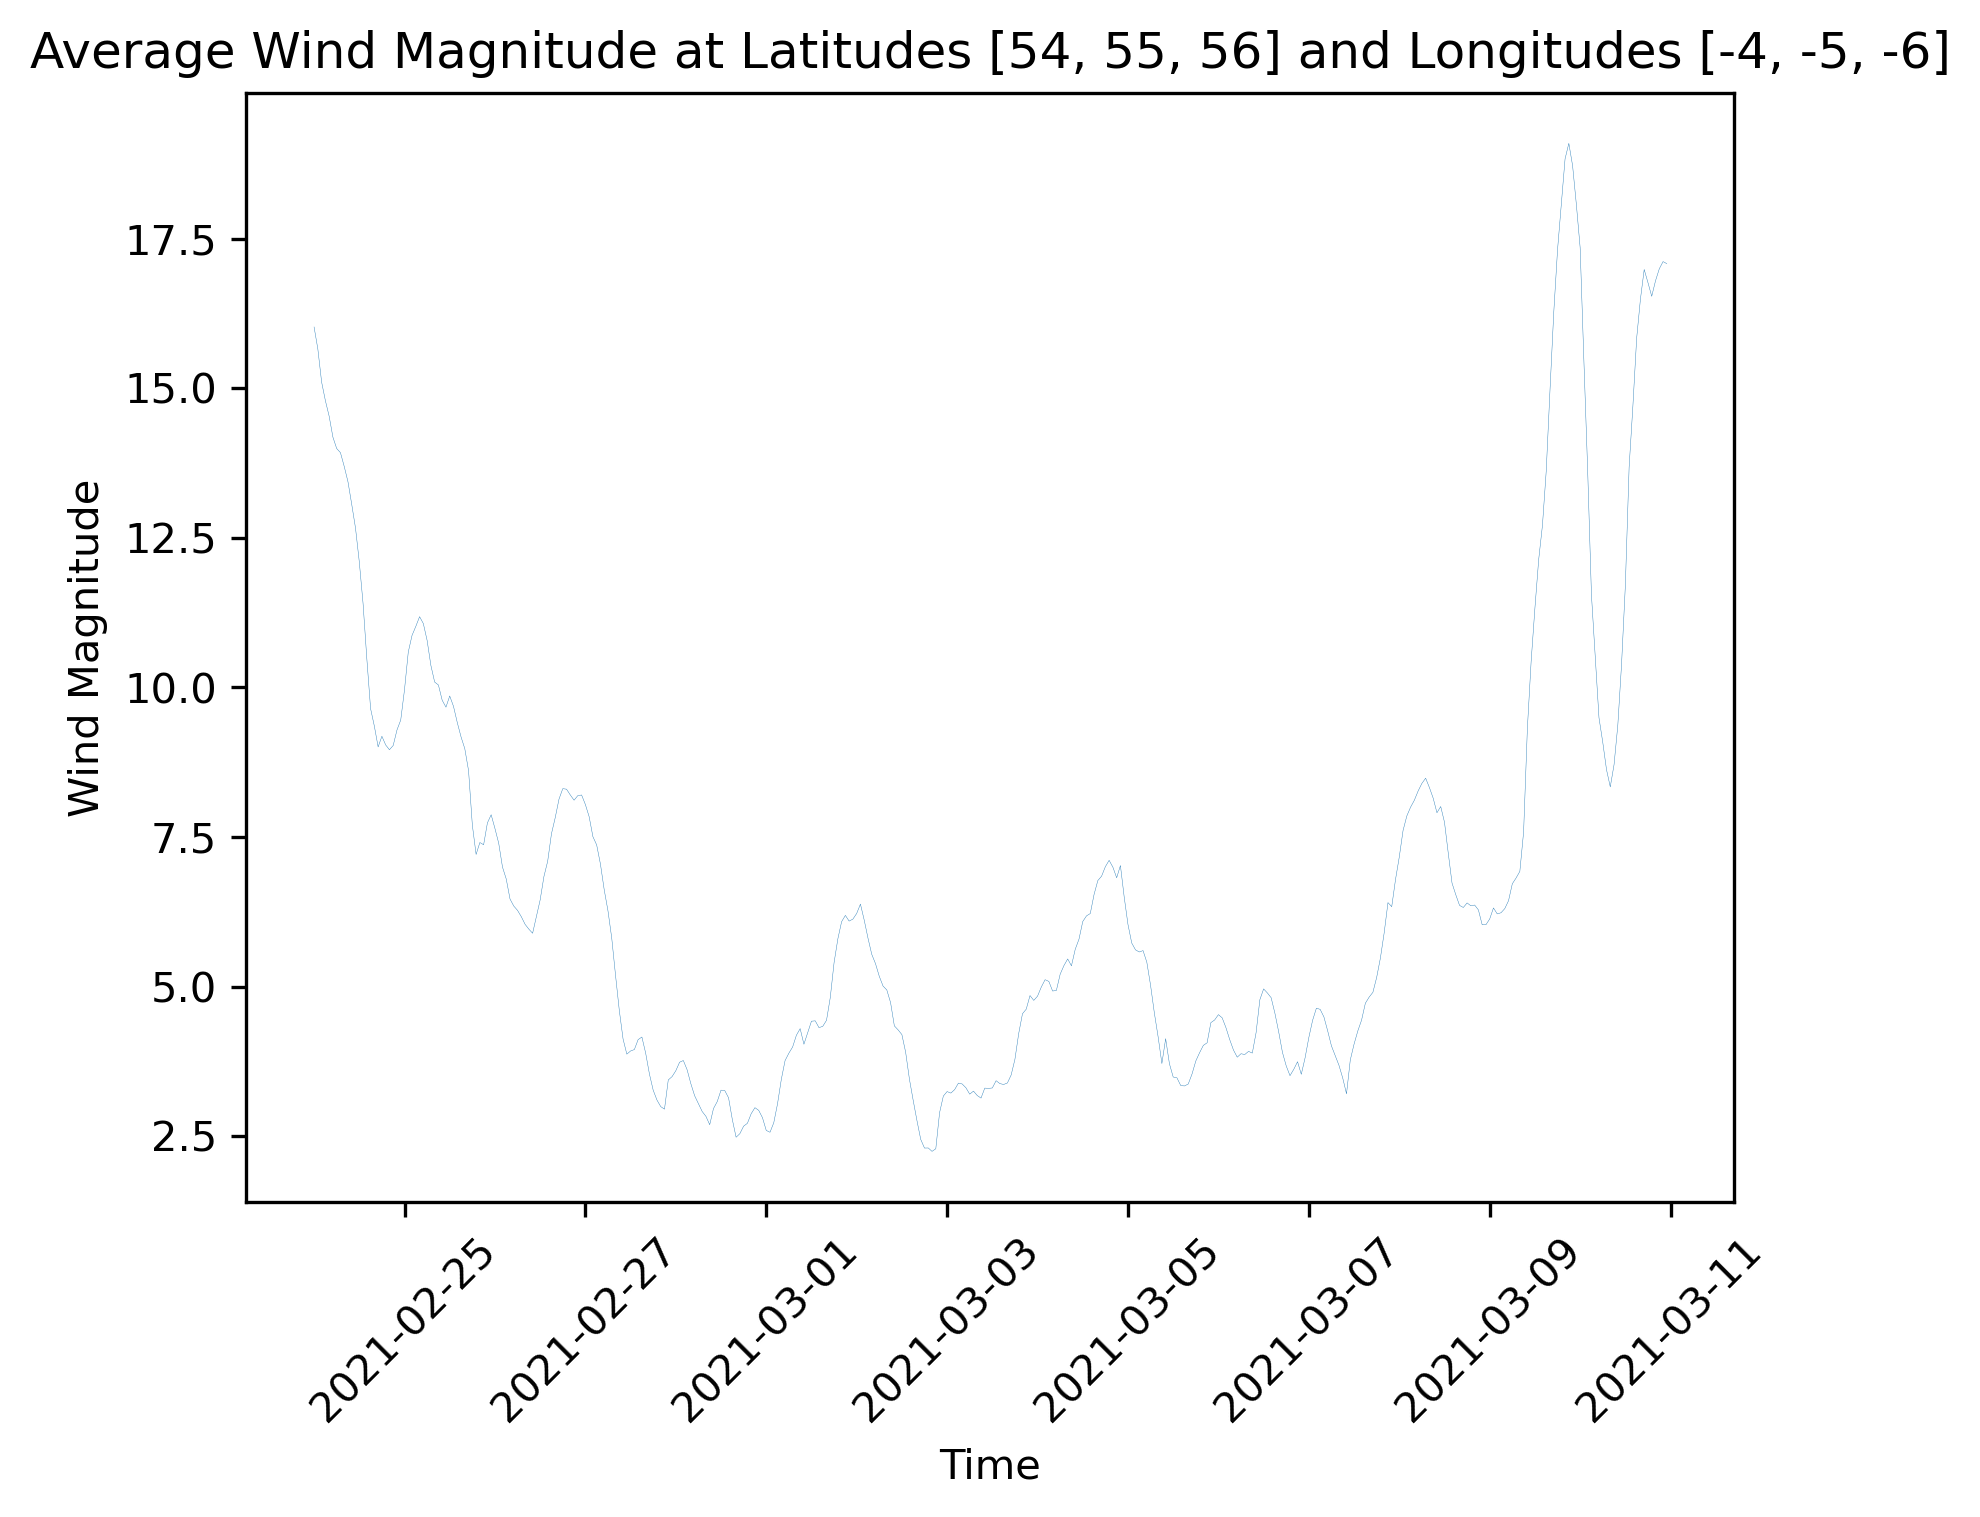

In [6]:
# Specify the latitude and longitude values
latitudes1 = [54, 55, 56]
longitudes1 = [-4, -5, -6]

# Initialize an empty list to store wind magnitude values
wind_mag_values1 = []

# Loop through the specified latitude and longitude values
for lat1 in latitudes1:
    for lon1 in longitudes1:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values1.append(ds.sel(latitude=lat1, longitude=lon1, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values1 = np.array(wind_mag_values1)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag1 = np.mean(wind_mag_values1, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag1, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes1, longitudes1))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()



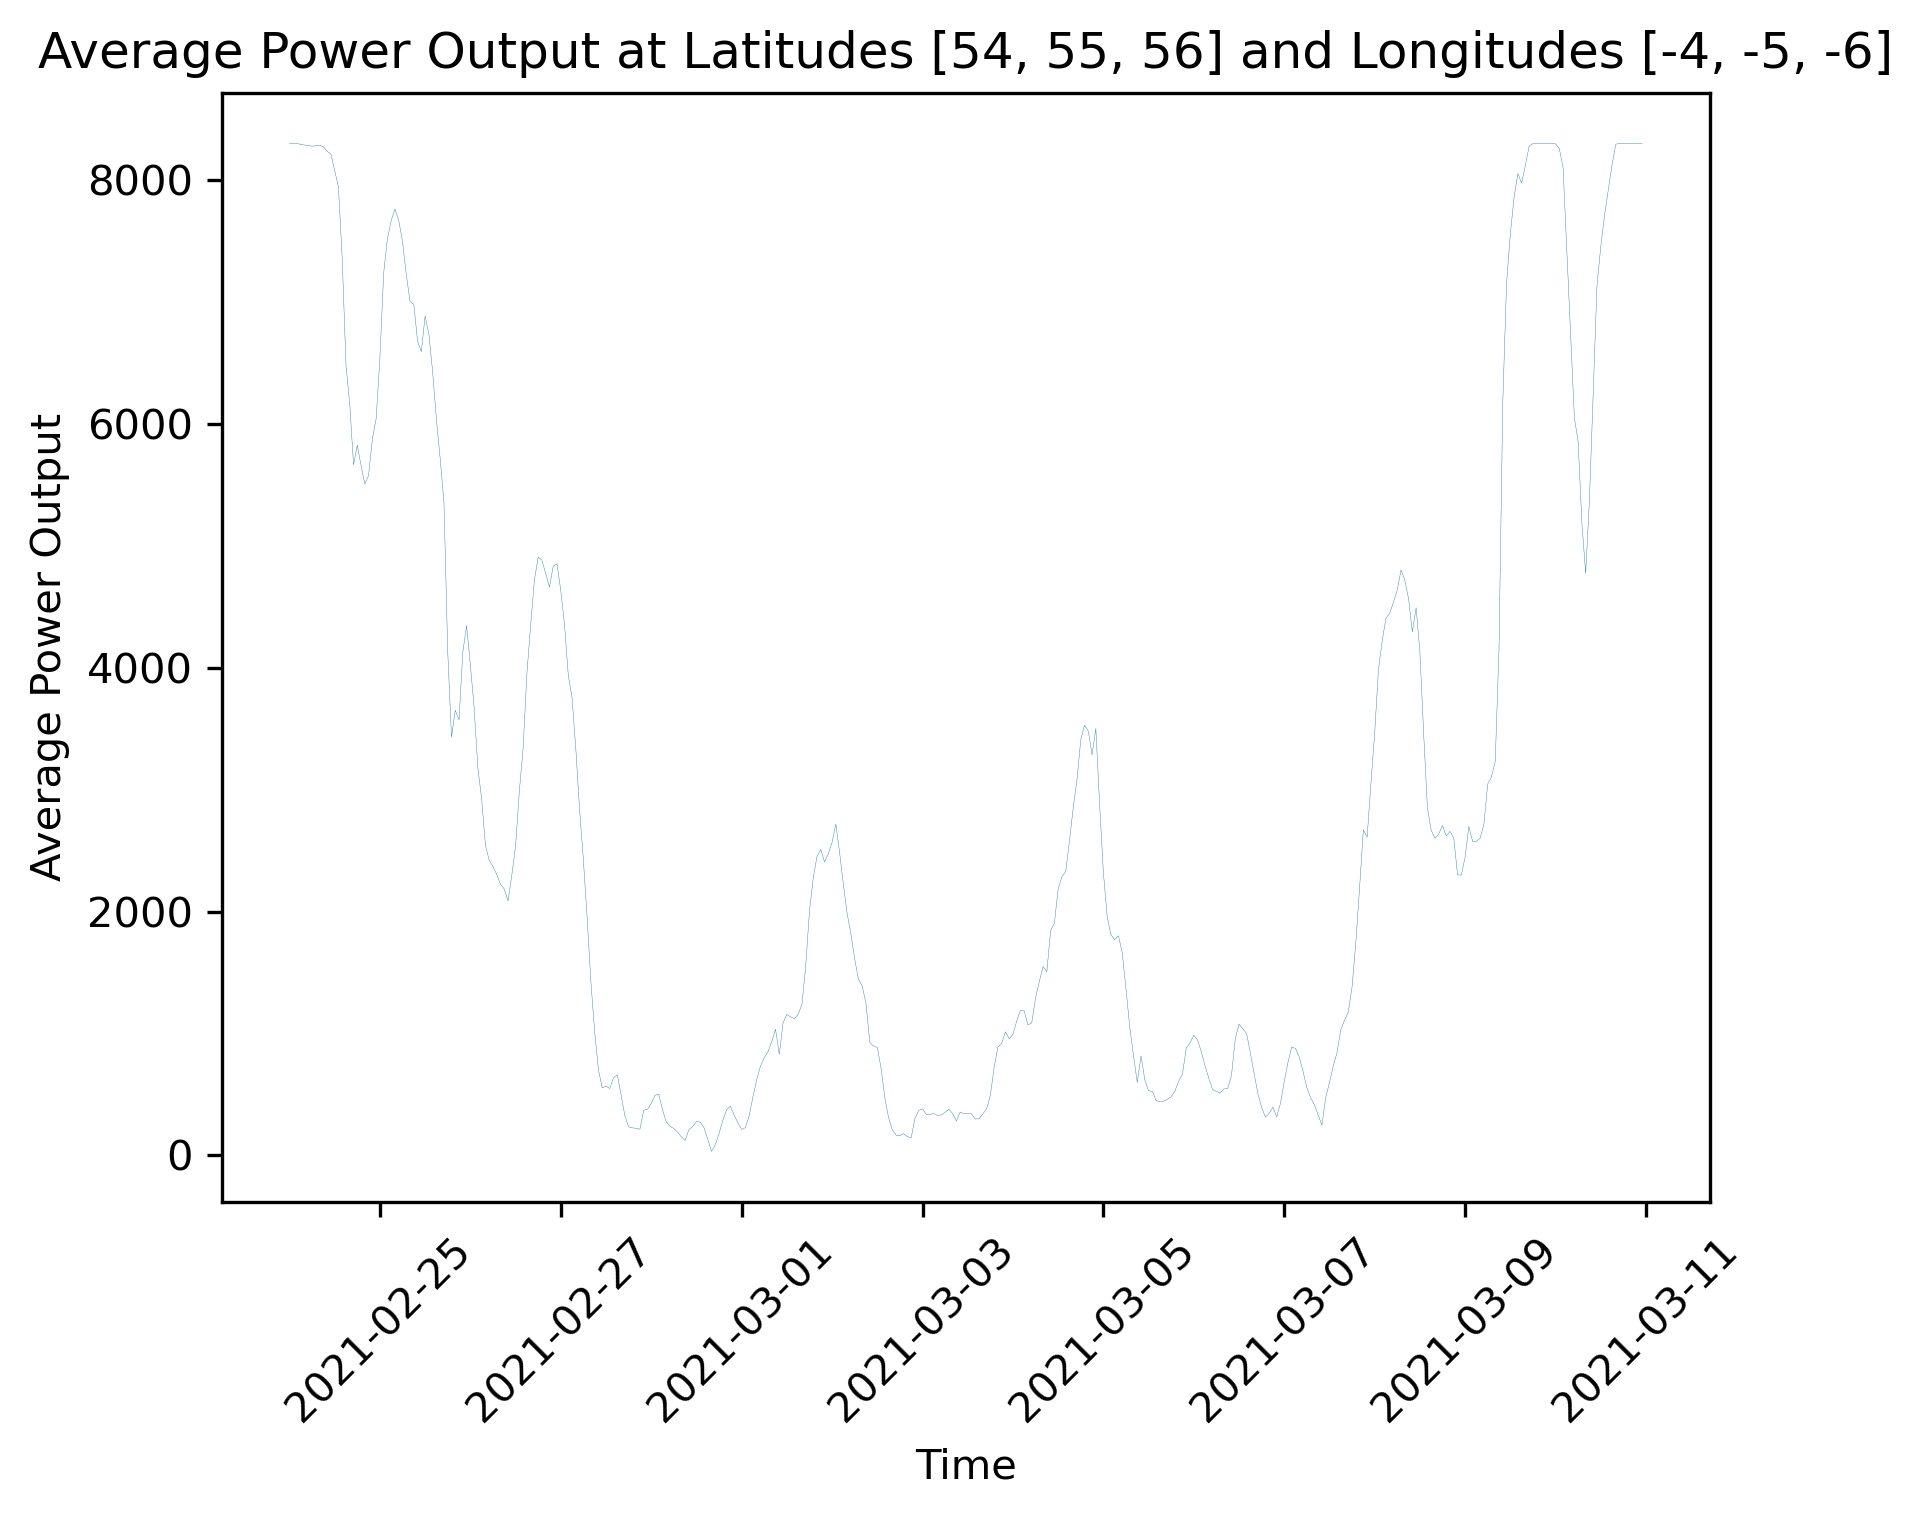

In [7]:
# Specify the latitude and longitude values
latitudes1 = [54, 55, 56]
longitudes1 = [-4, -5, -6]

# Initialize an empty list to store wind magnitude values
power_values1 = []

# Loop through the specified latitude and longitude values
for lat1 in latitudes1:
    for lon1 in longitudes1:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        power_values1.append(ds.sel(latitude=lat1, longitude=lon1, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values1 = np.array(power_values1)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
power_mag1 = np.mean(power_values1, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag1, linewidth=0.1)
plt.title('Average Power Output at Latitudes {} and Longitudes {}'.format(latitudes1, longitudes1))
plt.xlabel('Time')
plt.ylabel('Average Power Output')
plt.xticks(rotation=45)
plt.show()



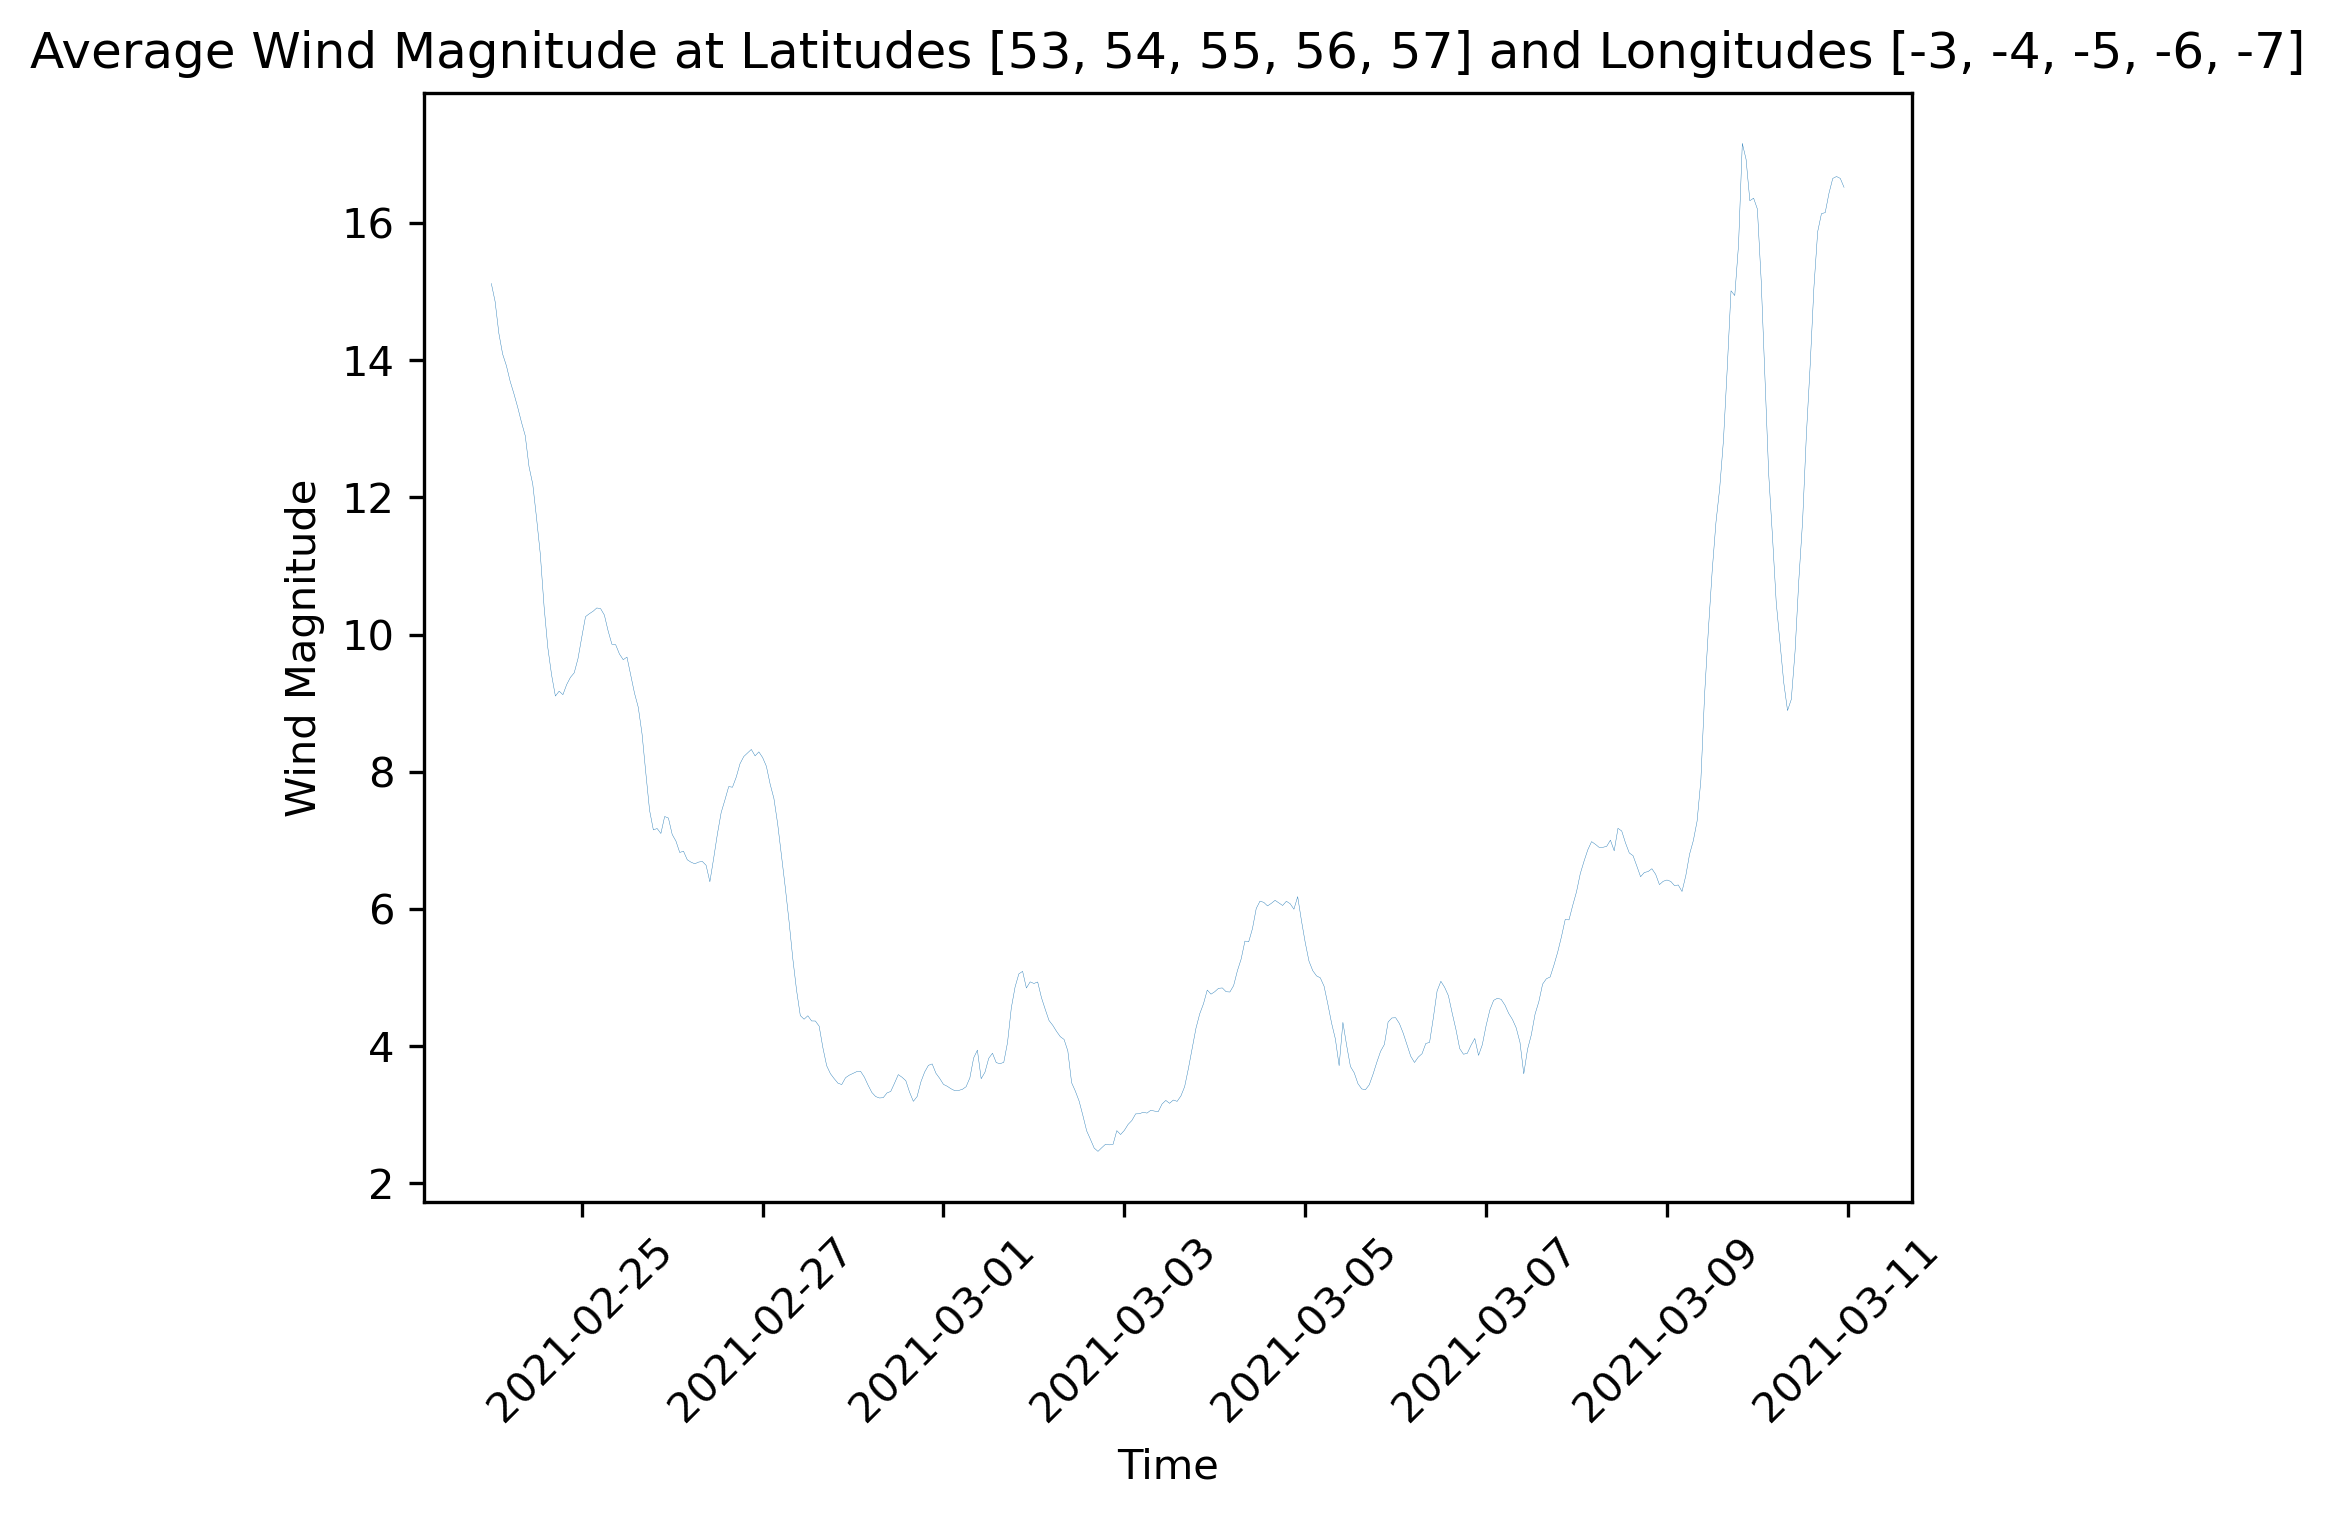

In [8]:
# Specify the latitude and longitude values
latitudes2 = [53,54, 55, 56,57]
longitudes2 = [-3,-4, -5, -6,-7]

# Initialize an empty list to store wind magnitude values
wind_mag_values2 = []

# Loop through the specified latitude and longitude values
for lat2 in latitudes2:
    for lon2 in longitudes2:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values2.append(ds.sel(latitude=lat2, longitude=lon2, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values2 = np.array(wind_mag_values2)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag2 = np.mean(wind_mag_values2, axis=0)

# Extract the time values for the specified time range
time_values2 = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag2, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes2, longitudes2))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()




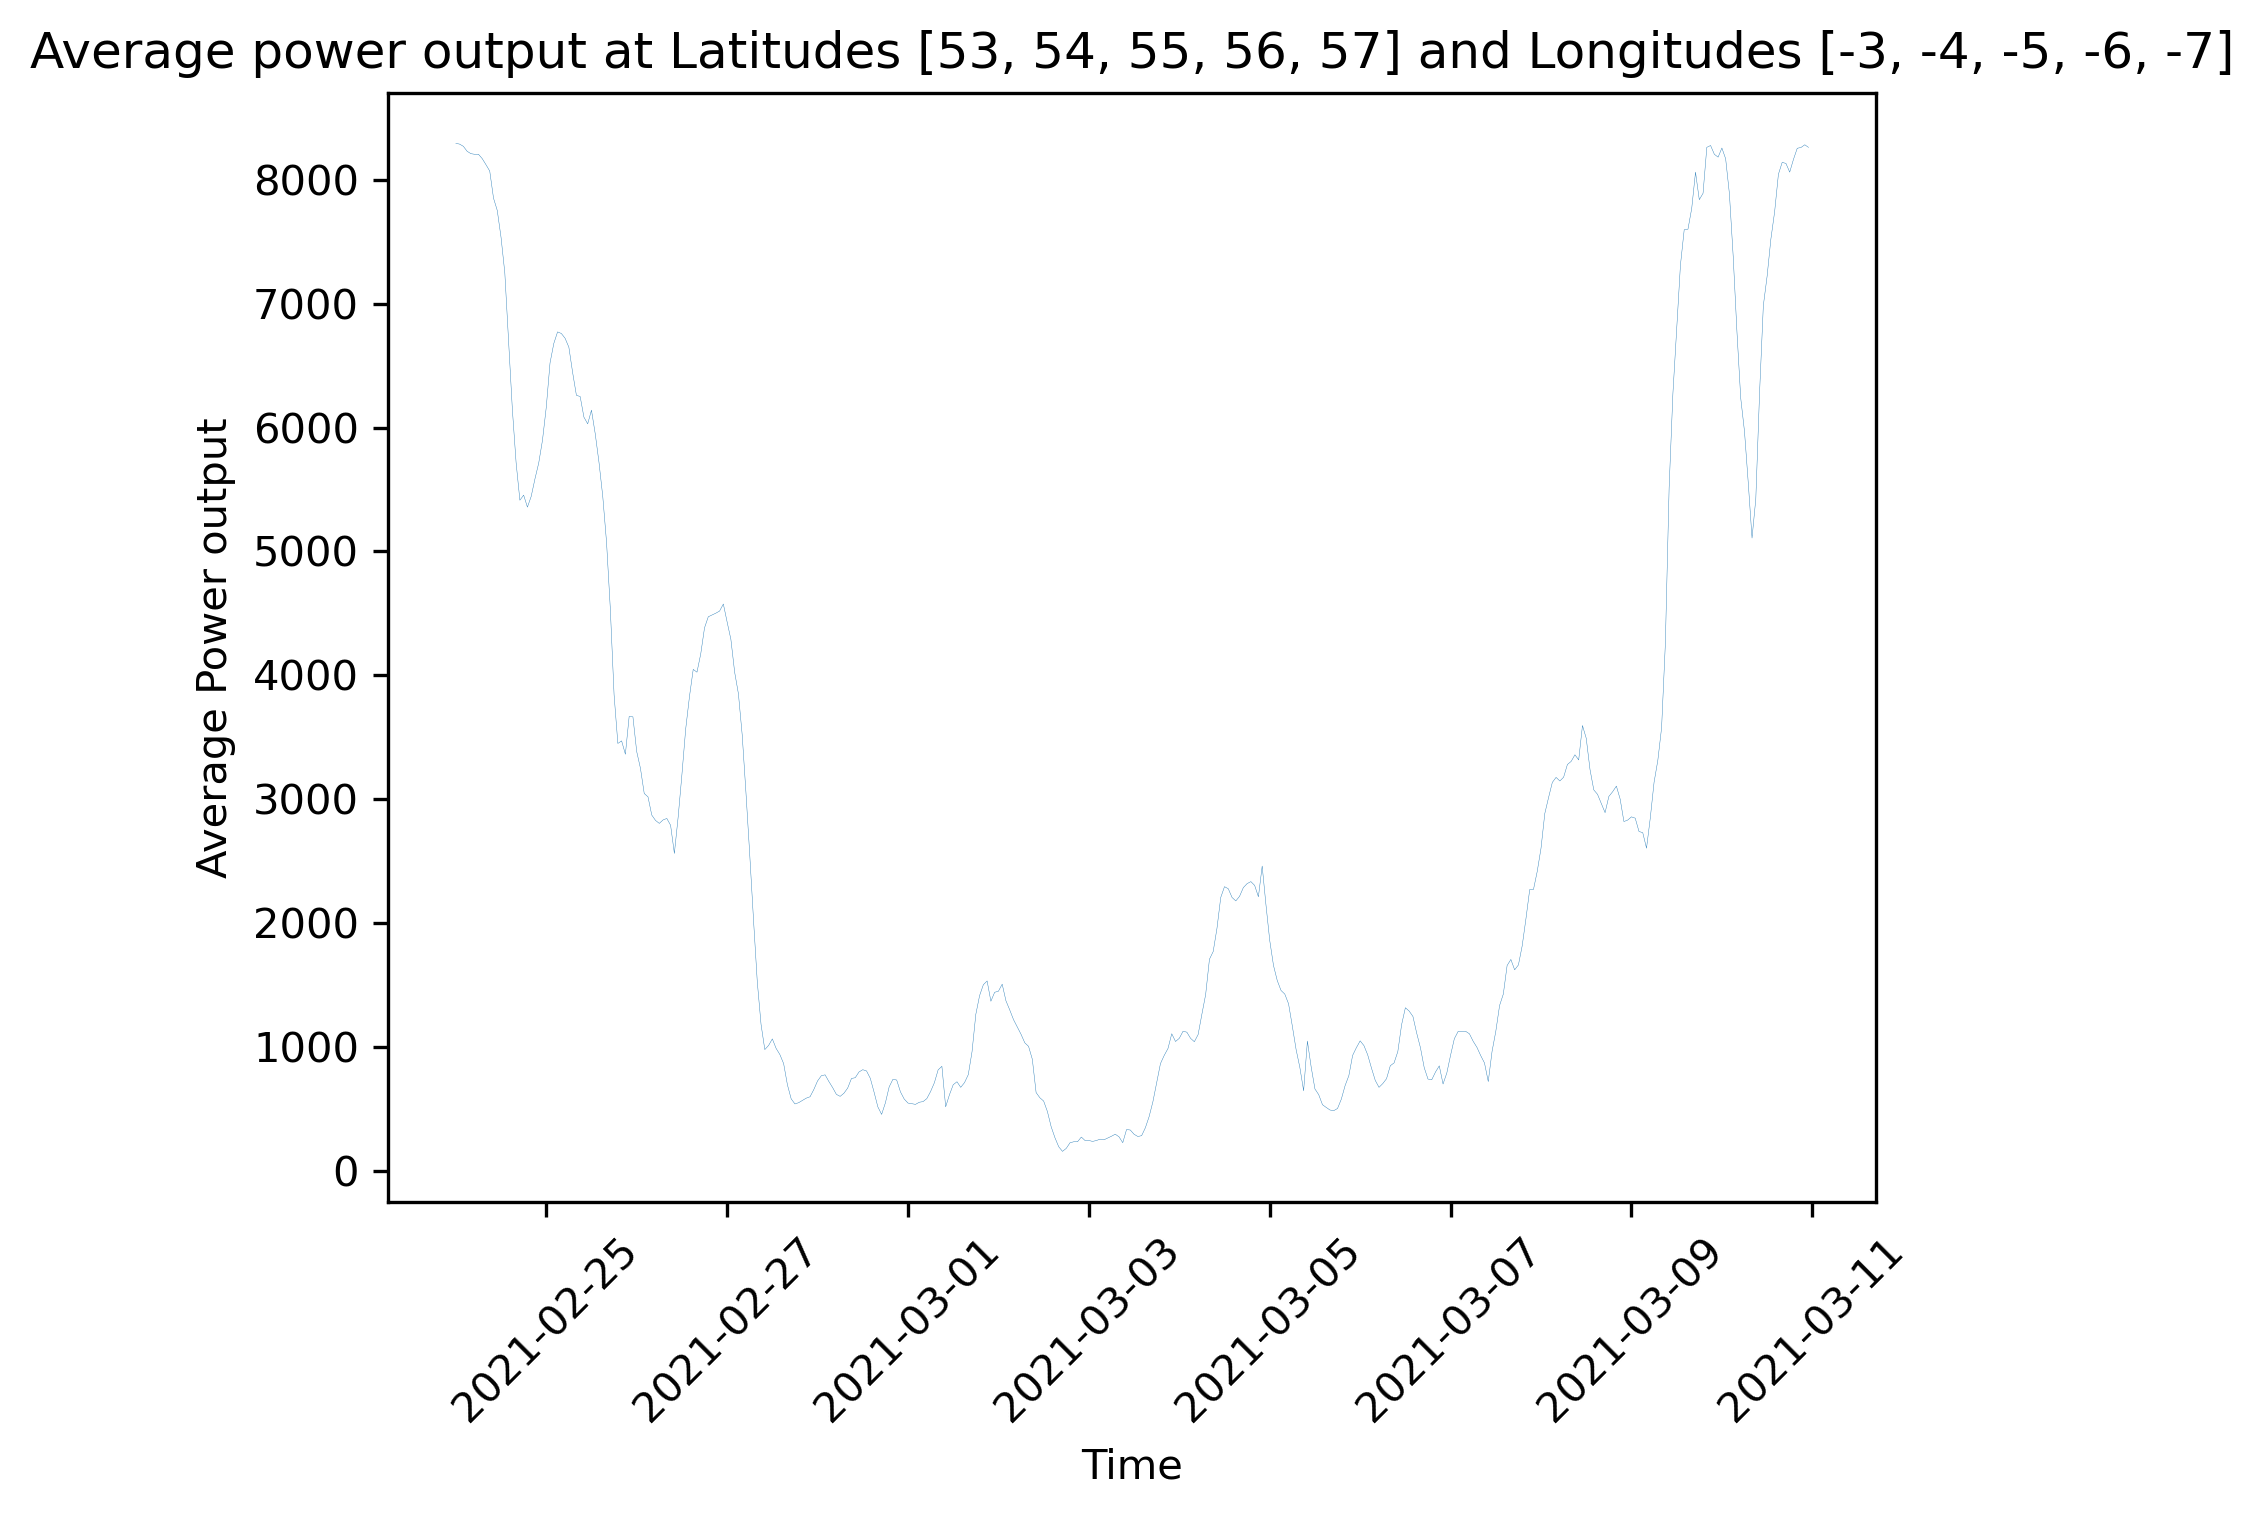

In [9]:
# Specify the latitude and longitude values
latitudes2 = [53,54, 55, 56,57]
longitudes2 = [-3,-4, -5, -6,-7]

# Initialize an empty list to store wind magnitude values
power_values2 = []

# Loop through the specified latitude and longitude values
for lat2 in latitudes2:
    for lon2 in longitudes2:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        power_values2.append(ds.sel(latitude=lat2, longitude=lon2, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values2 = np.array(power_values2)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
power_mag2 = np.mean(power_values2, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag2, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes2, longitudes2))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

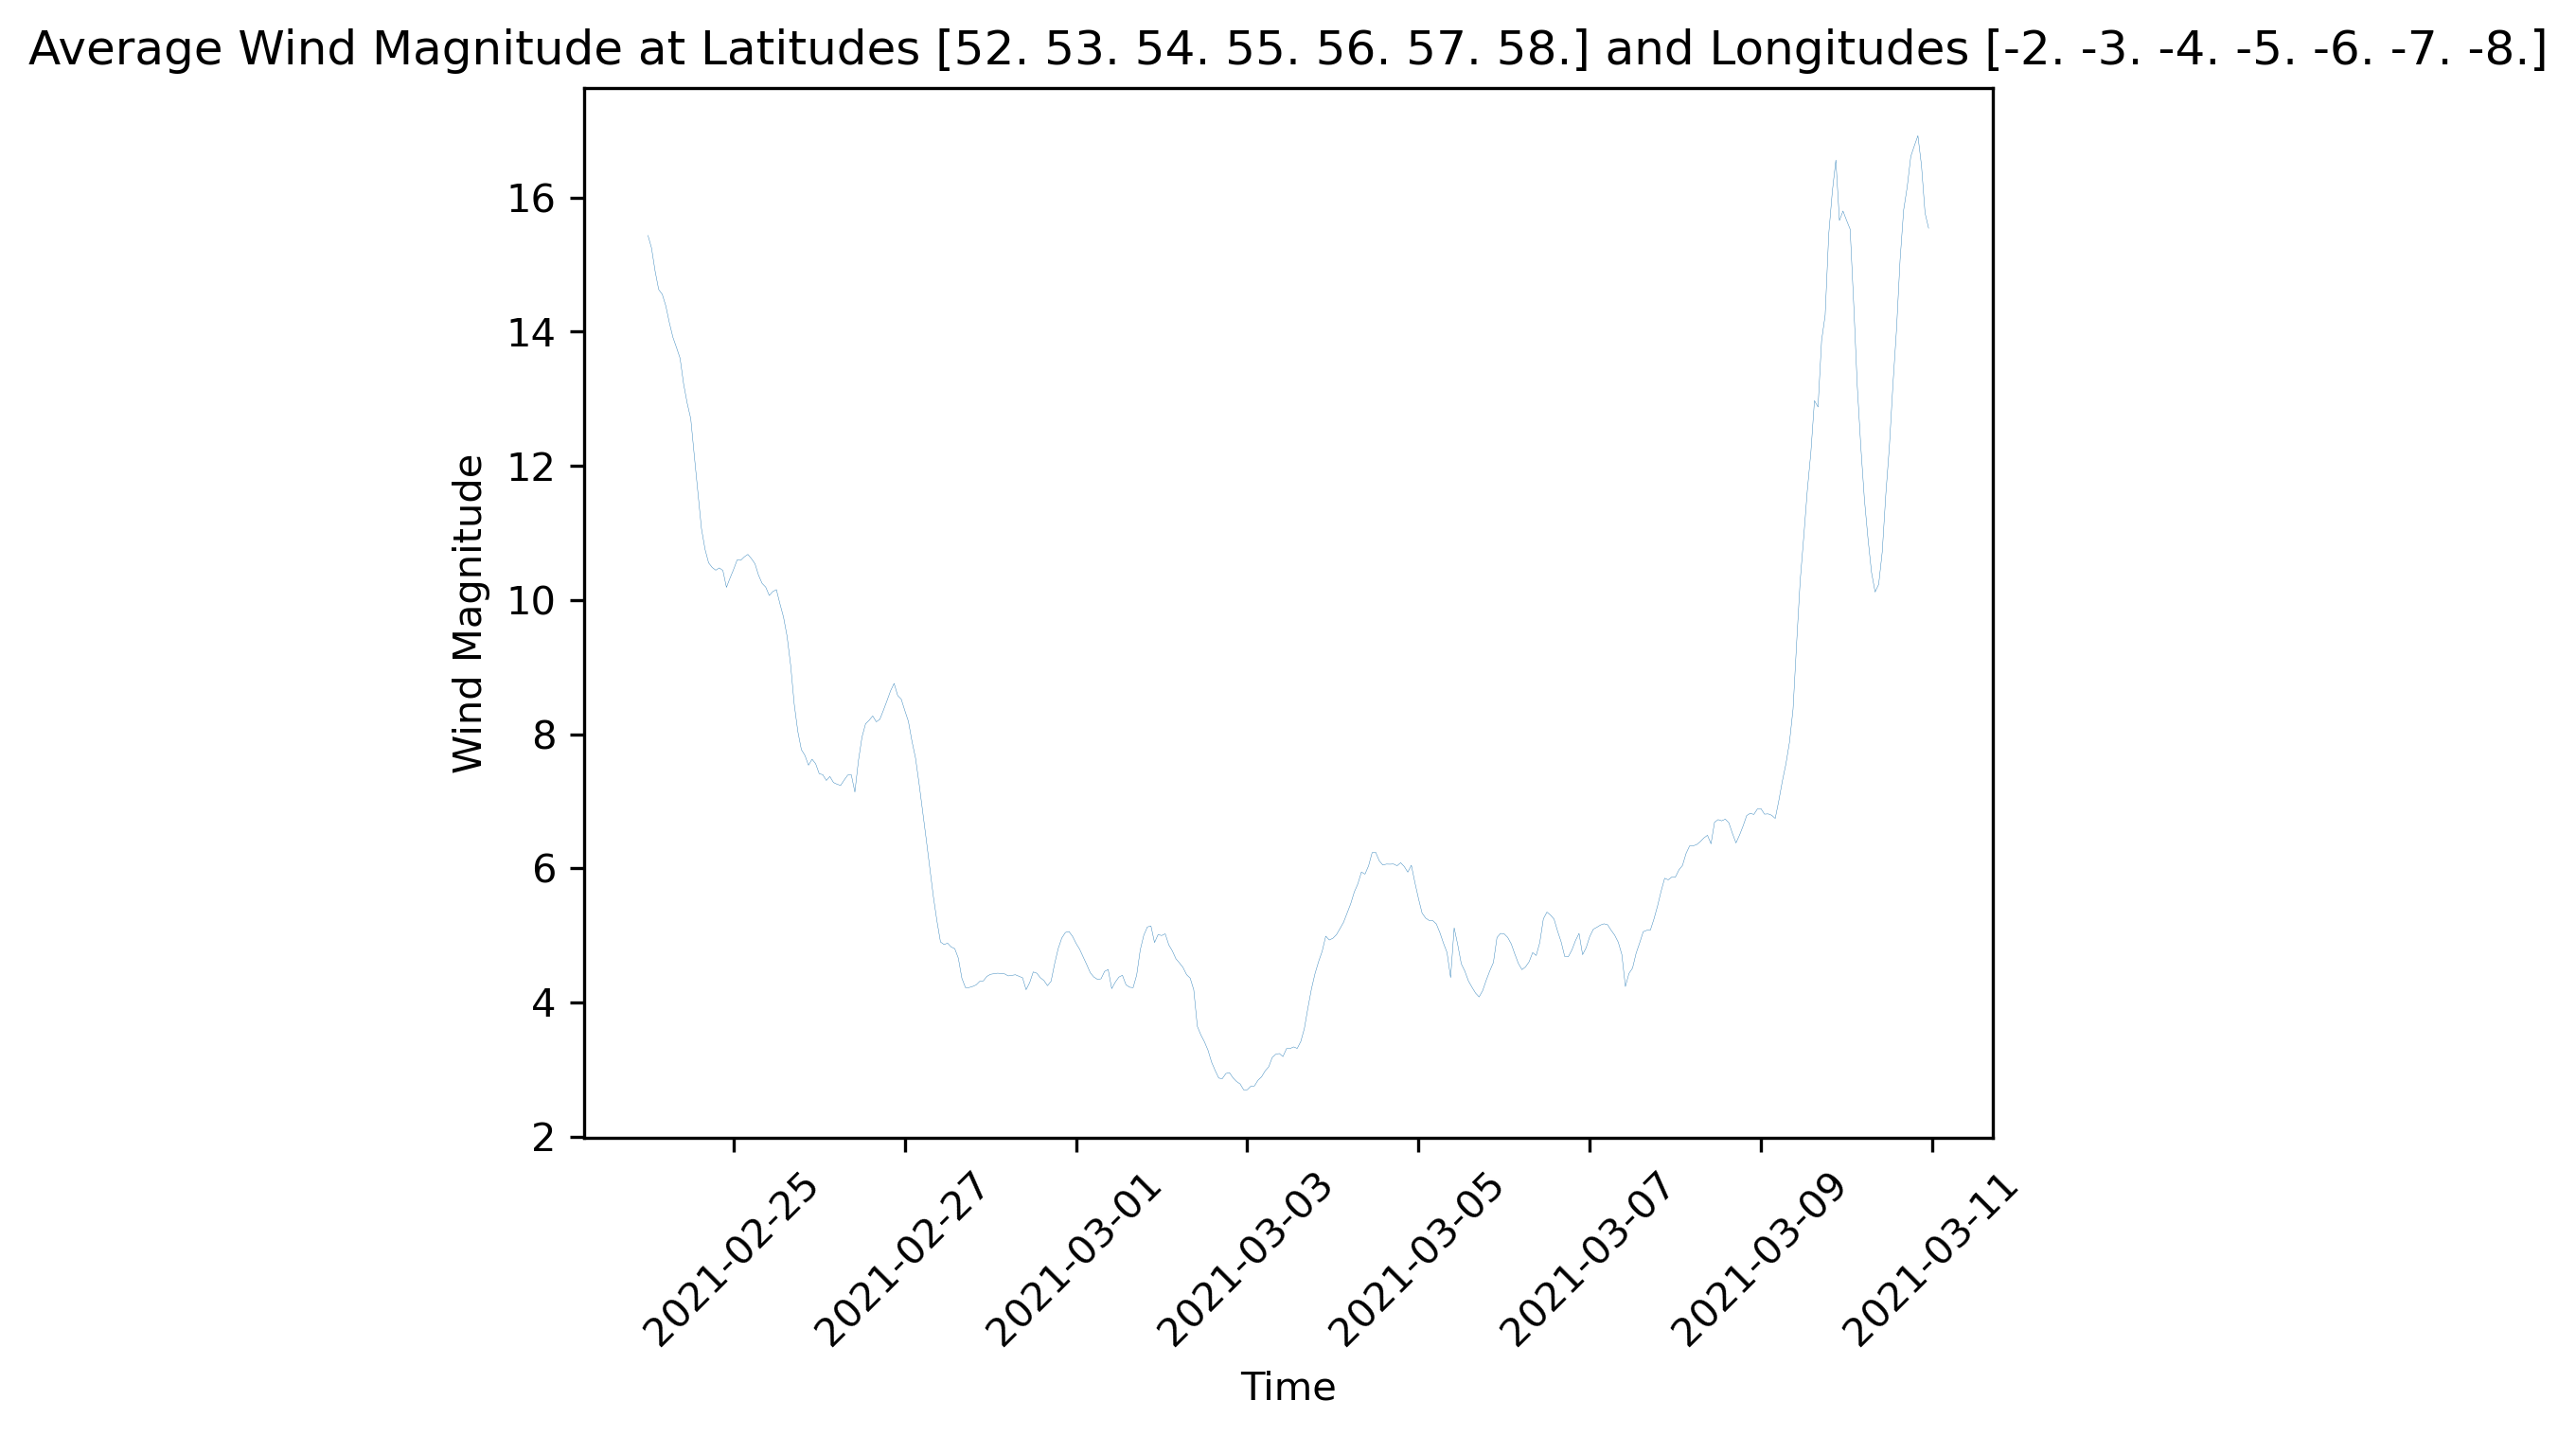

In [10]:
# Specify the latitude and longitude values

latitudes3 = np.linspace(52,58,7)
longitudes3 =np.linspace(-2,-8,7)

# Initialize an empty list to store wind magnitude values
wind_mag_values3 = []

# Loop through the specified latitude and longitude values
for lat3 in latitudes3:
    for lon3 in longitudes3:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values3.append(ds.sel(latitude=lat3, longitude=lon3, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values3 = np.array(wind_mag_values3)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag3 = np.mean(wind_mag_values3, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag3, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes3, longitudes3))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()




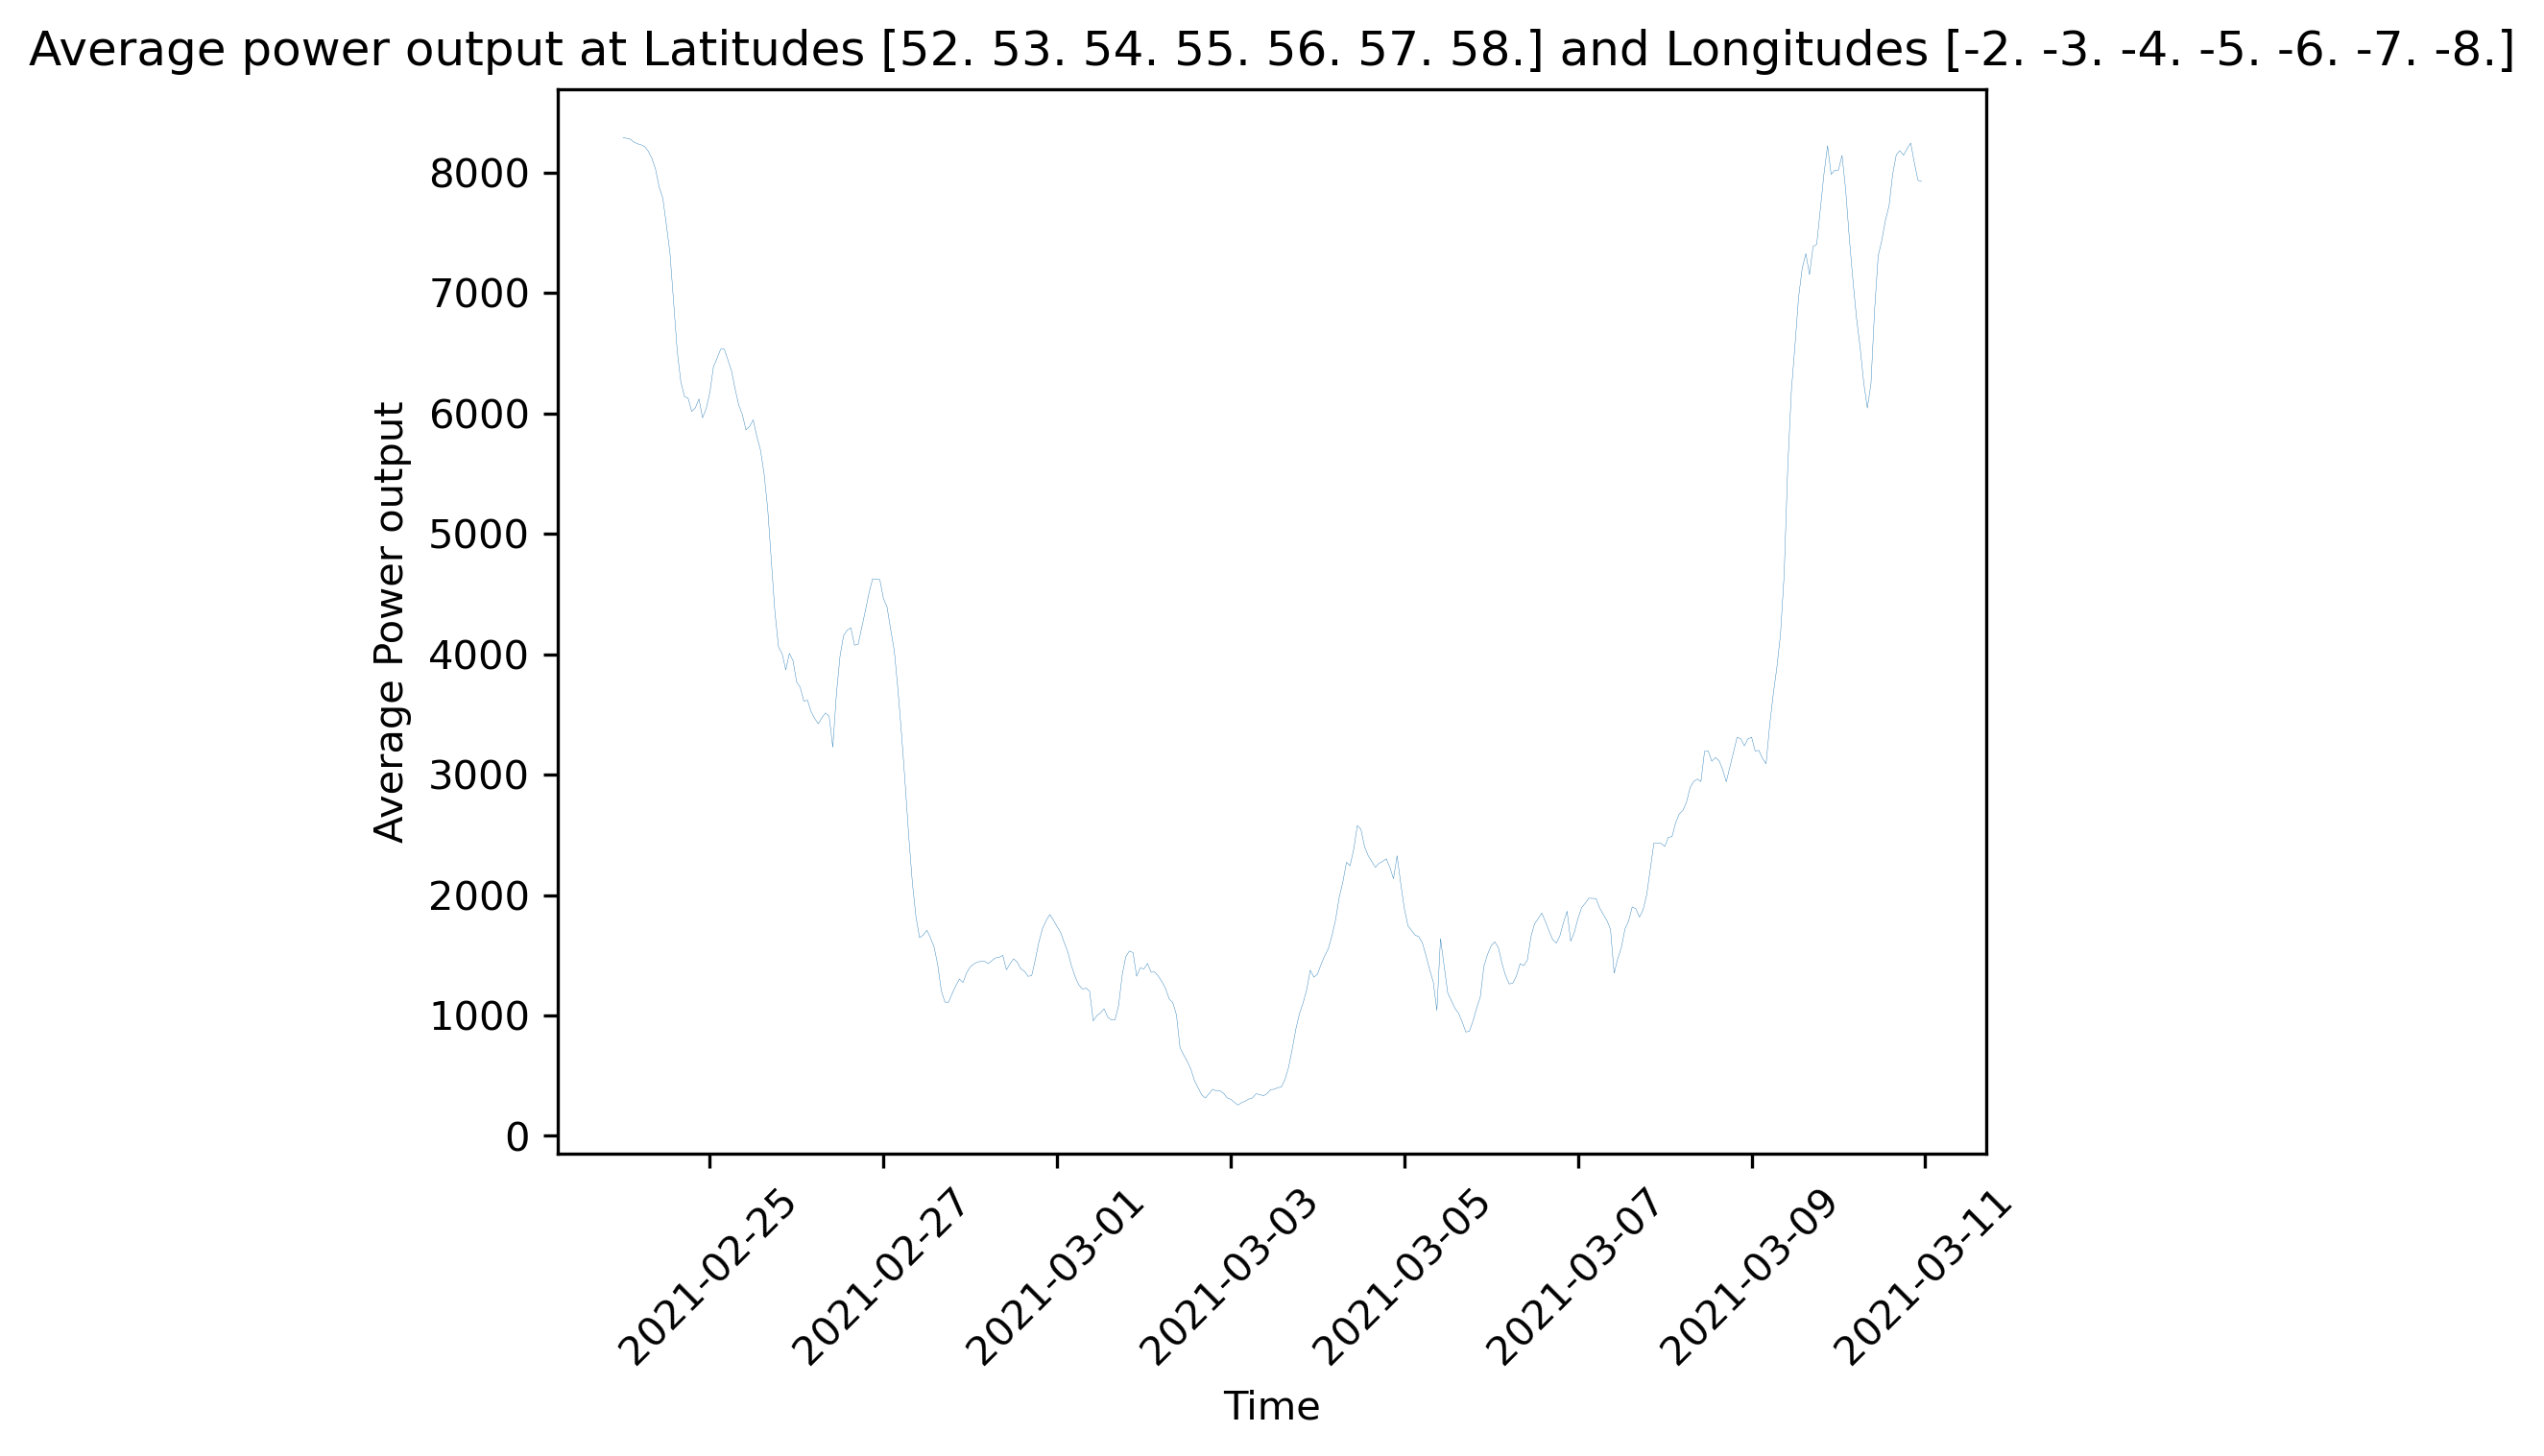

In [11]:
# Specify the latitude and longitude values
latitudes3 = np.linspace(52,58,7)
longitudes3 =np.linspace(-2,-8,7)

# Initialize an empty list to store wind magnitude values
power_values3 = []

# Loop through the specified latitude and longitude values
for lat3 in latitudes3:
    for lon3 in longitudes3:
        # Extract power values for the given latitude, longitude, and time range
        power_values3.append(ds.sel(latitude=lat3, longitude=lon3, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values3 = np.array(power_values3)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag3 = np.mean(power_values3, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag3, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes3, longitudes3))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

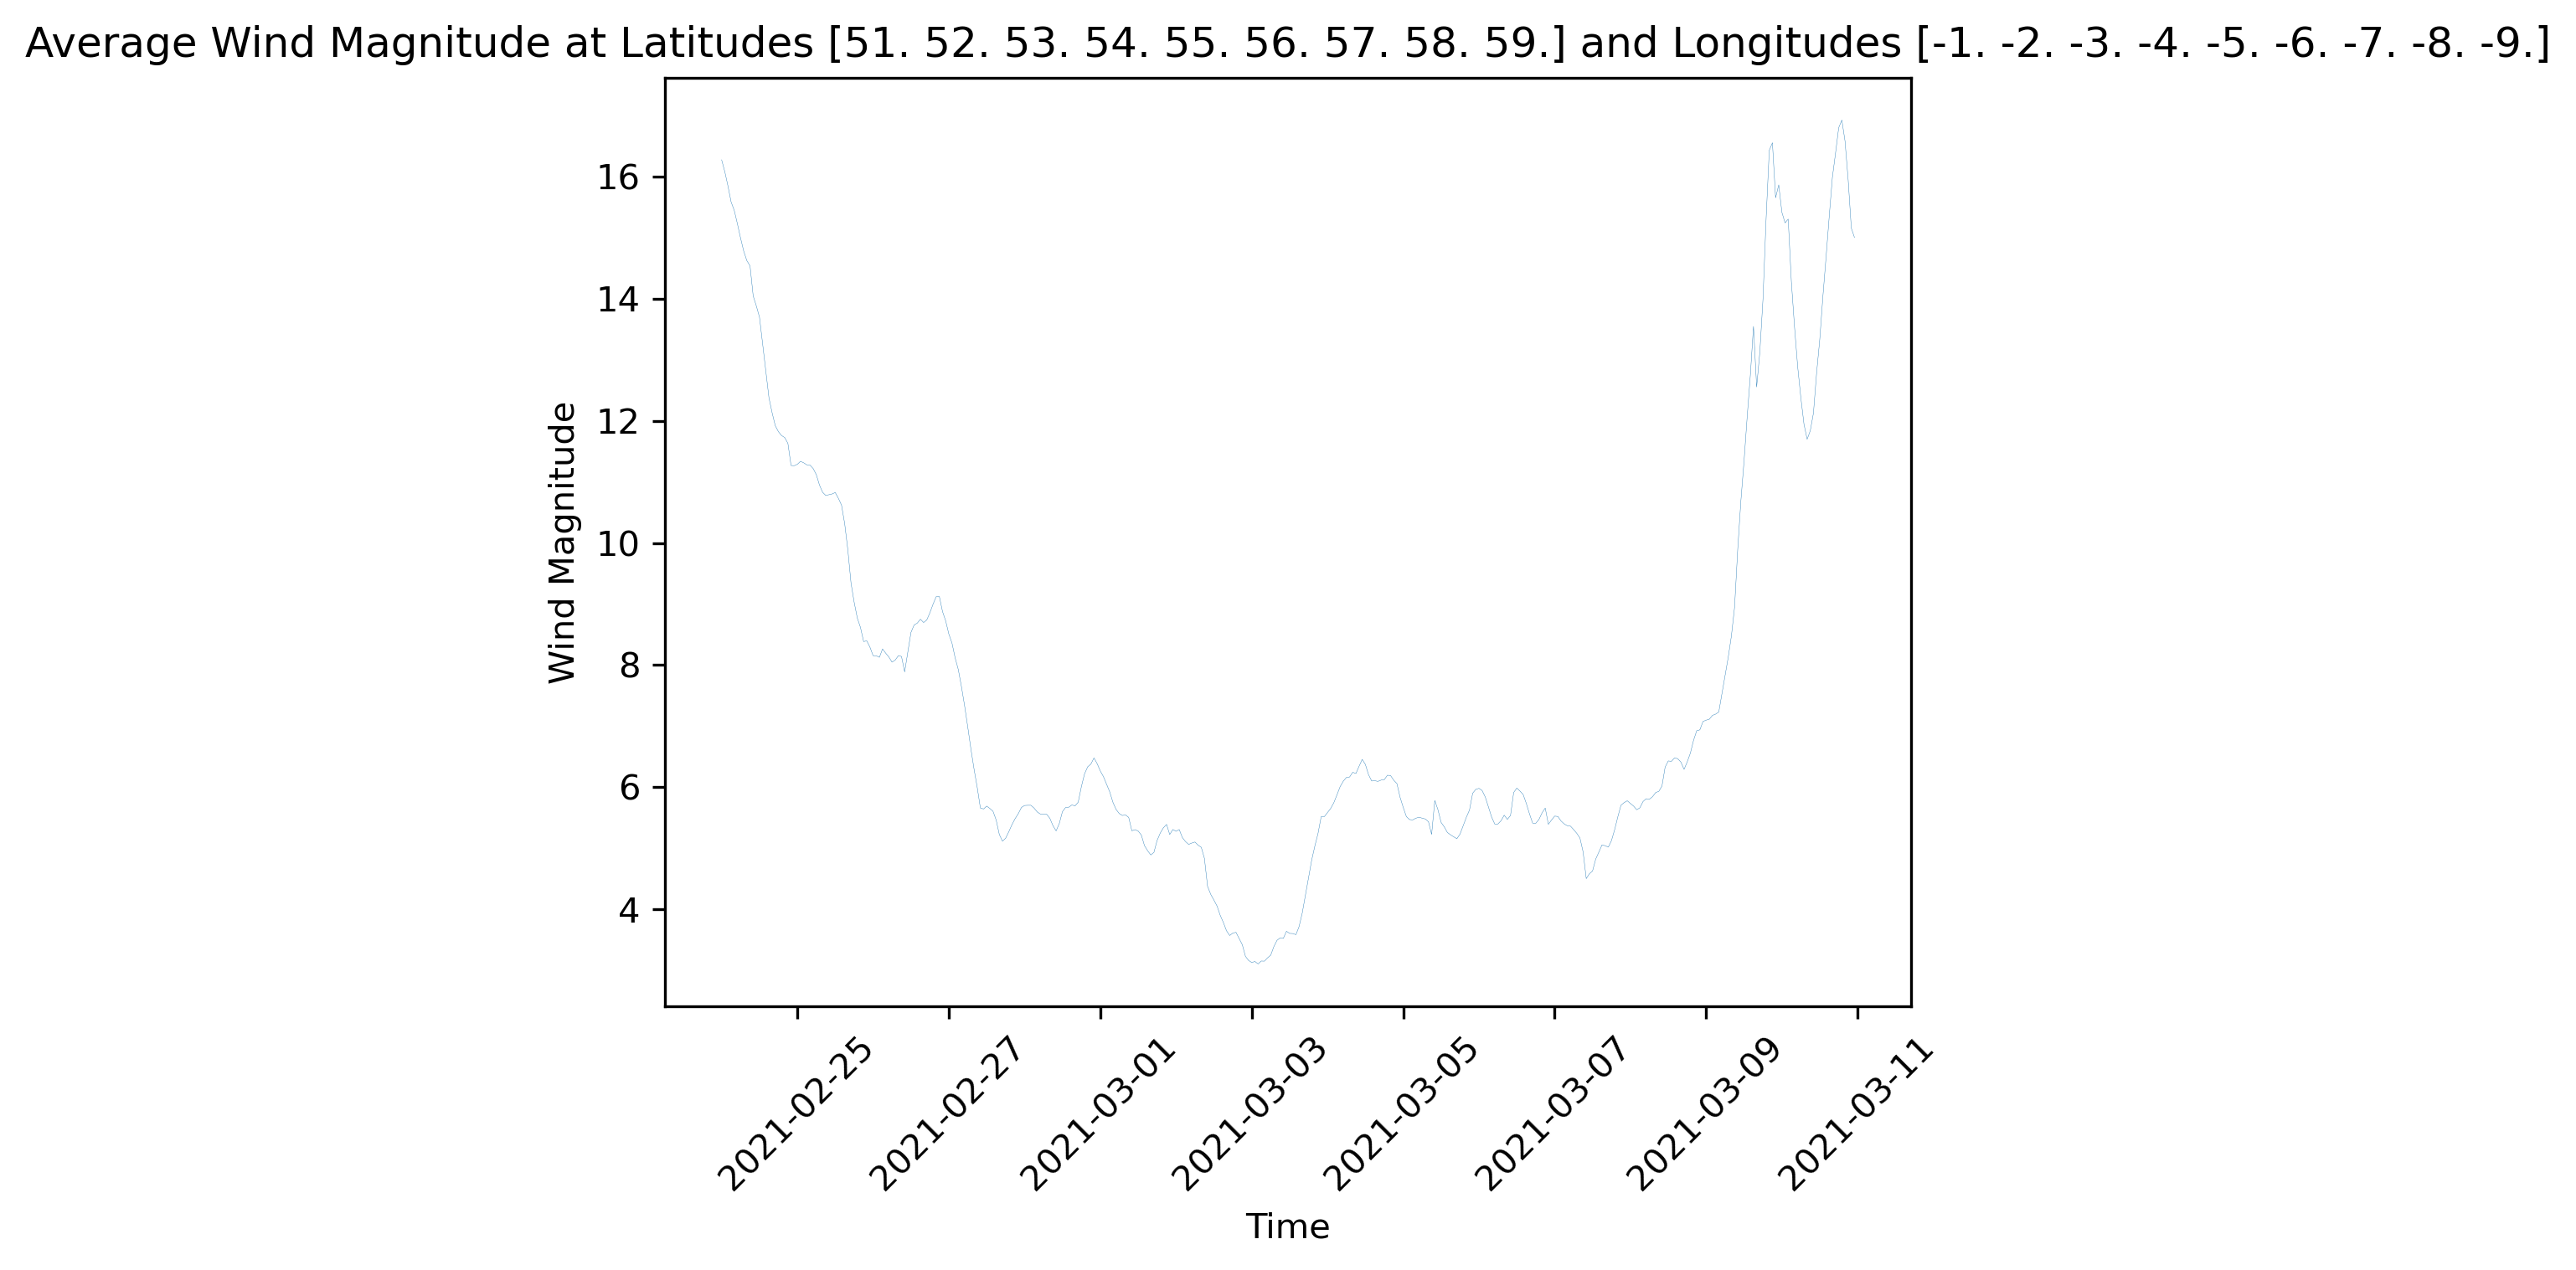

In [12]:
# Specify the latitude and longitude values

latitudes4 = np.linspace(51,59,9)
longitudes4 =np.linspace(-1,-9,9)

# Initialize an empty list to store wind magnitude values
wind_mag_values4 = []

# Loop through the specified latitude and longitude values
for lat4 in latitudes4:
    for lon4 in longitudes4:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values4.append(ds.sel(latitude=lat4, longitude=lon4, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values4 = np.array(wind_mag_values4)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag4 = np.mean(wind_mag_values4, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag4, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes4, longitudes4))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()





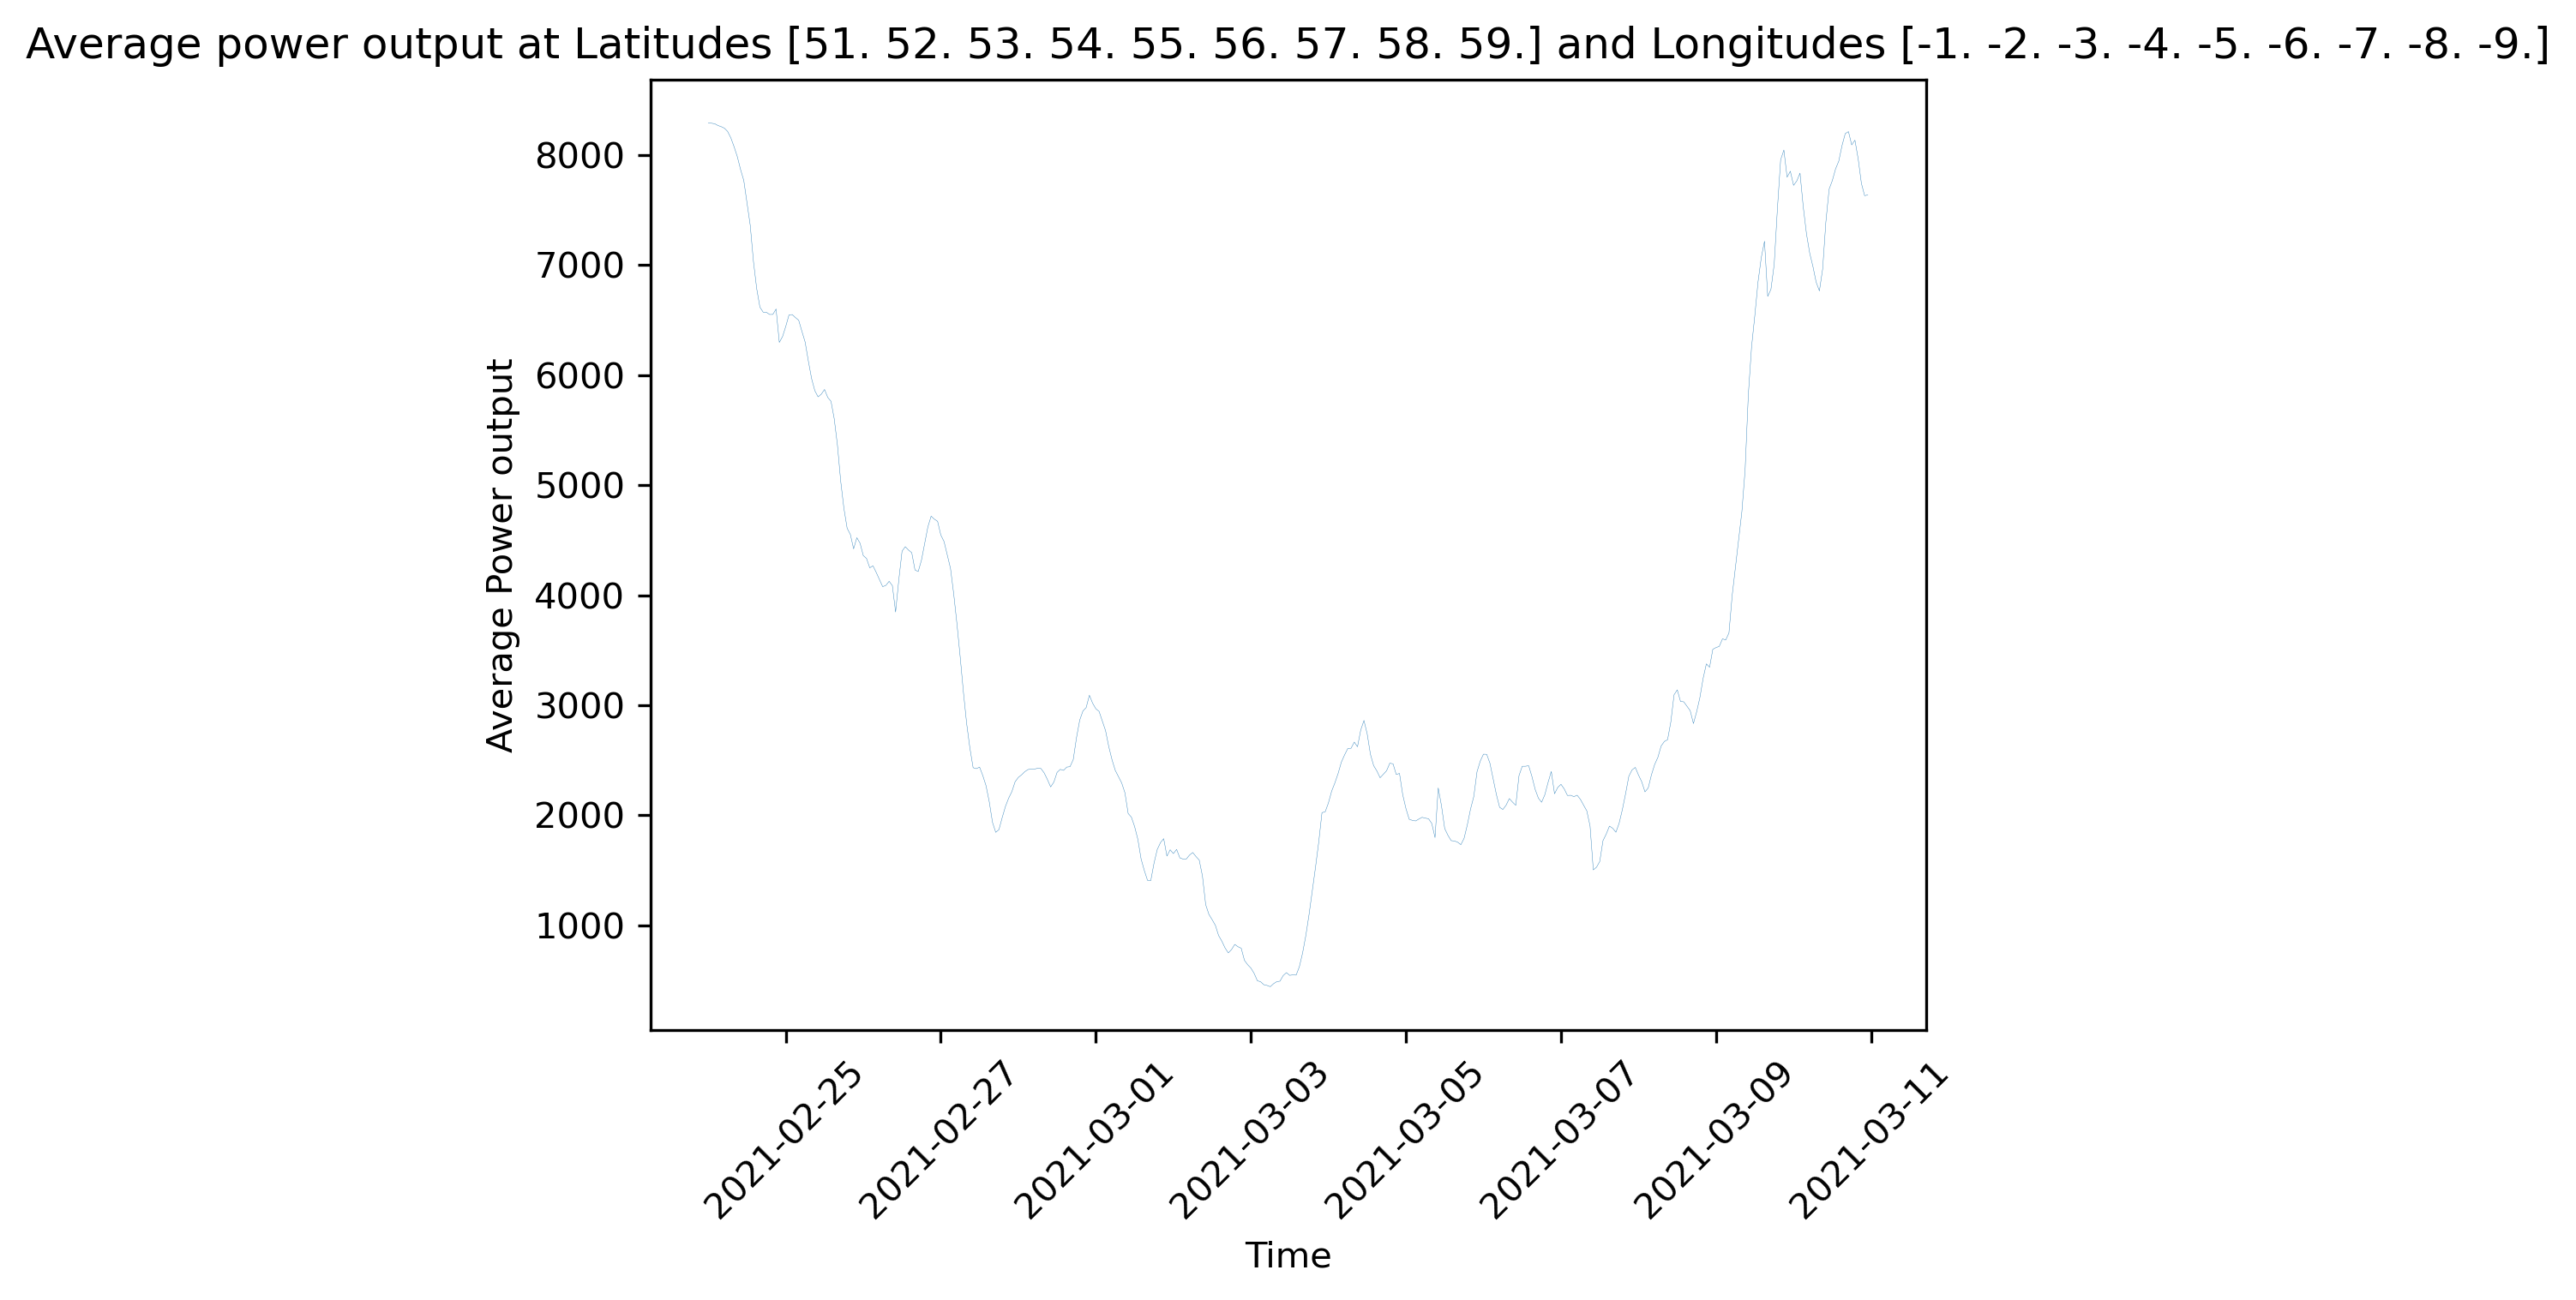

In [13]:
# Specify the latitude and longitude values
latitudes4 = np.linspace(51,59,9)
longitudes4 =np.linspace(-1,-9,9)

# Initialize an empty list to store wind magnitude values
power_values4 = []

# Loop through the specified latitude and longitude values
for lat4 in latitudes4:
    for lon4 in longitudes4:
        # Extract power values for the given latitude, longitude, and time range
        power_values4.append(ds.sel(latitude=lat4, longitude=lon4, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values4 = np.array(power_values4)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag4 = np.mean(power_values4, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag4, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes4, longitudes4))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

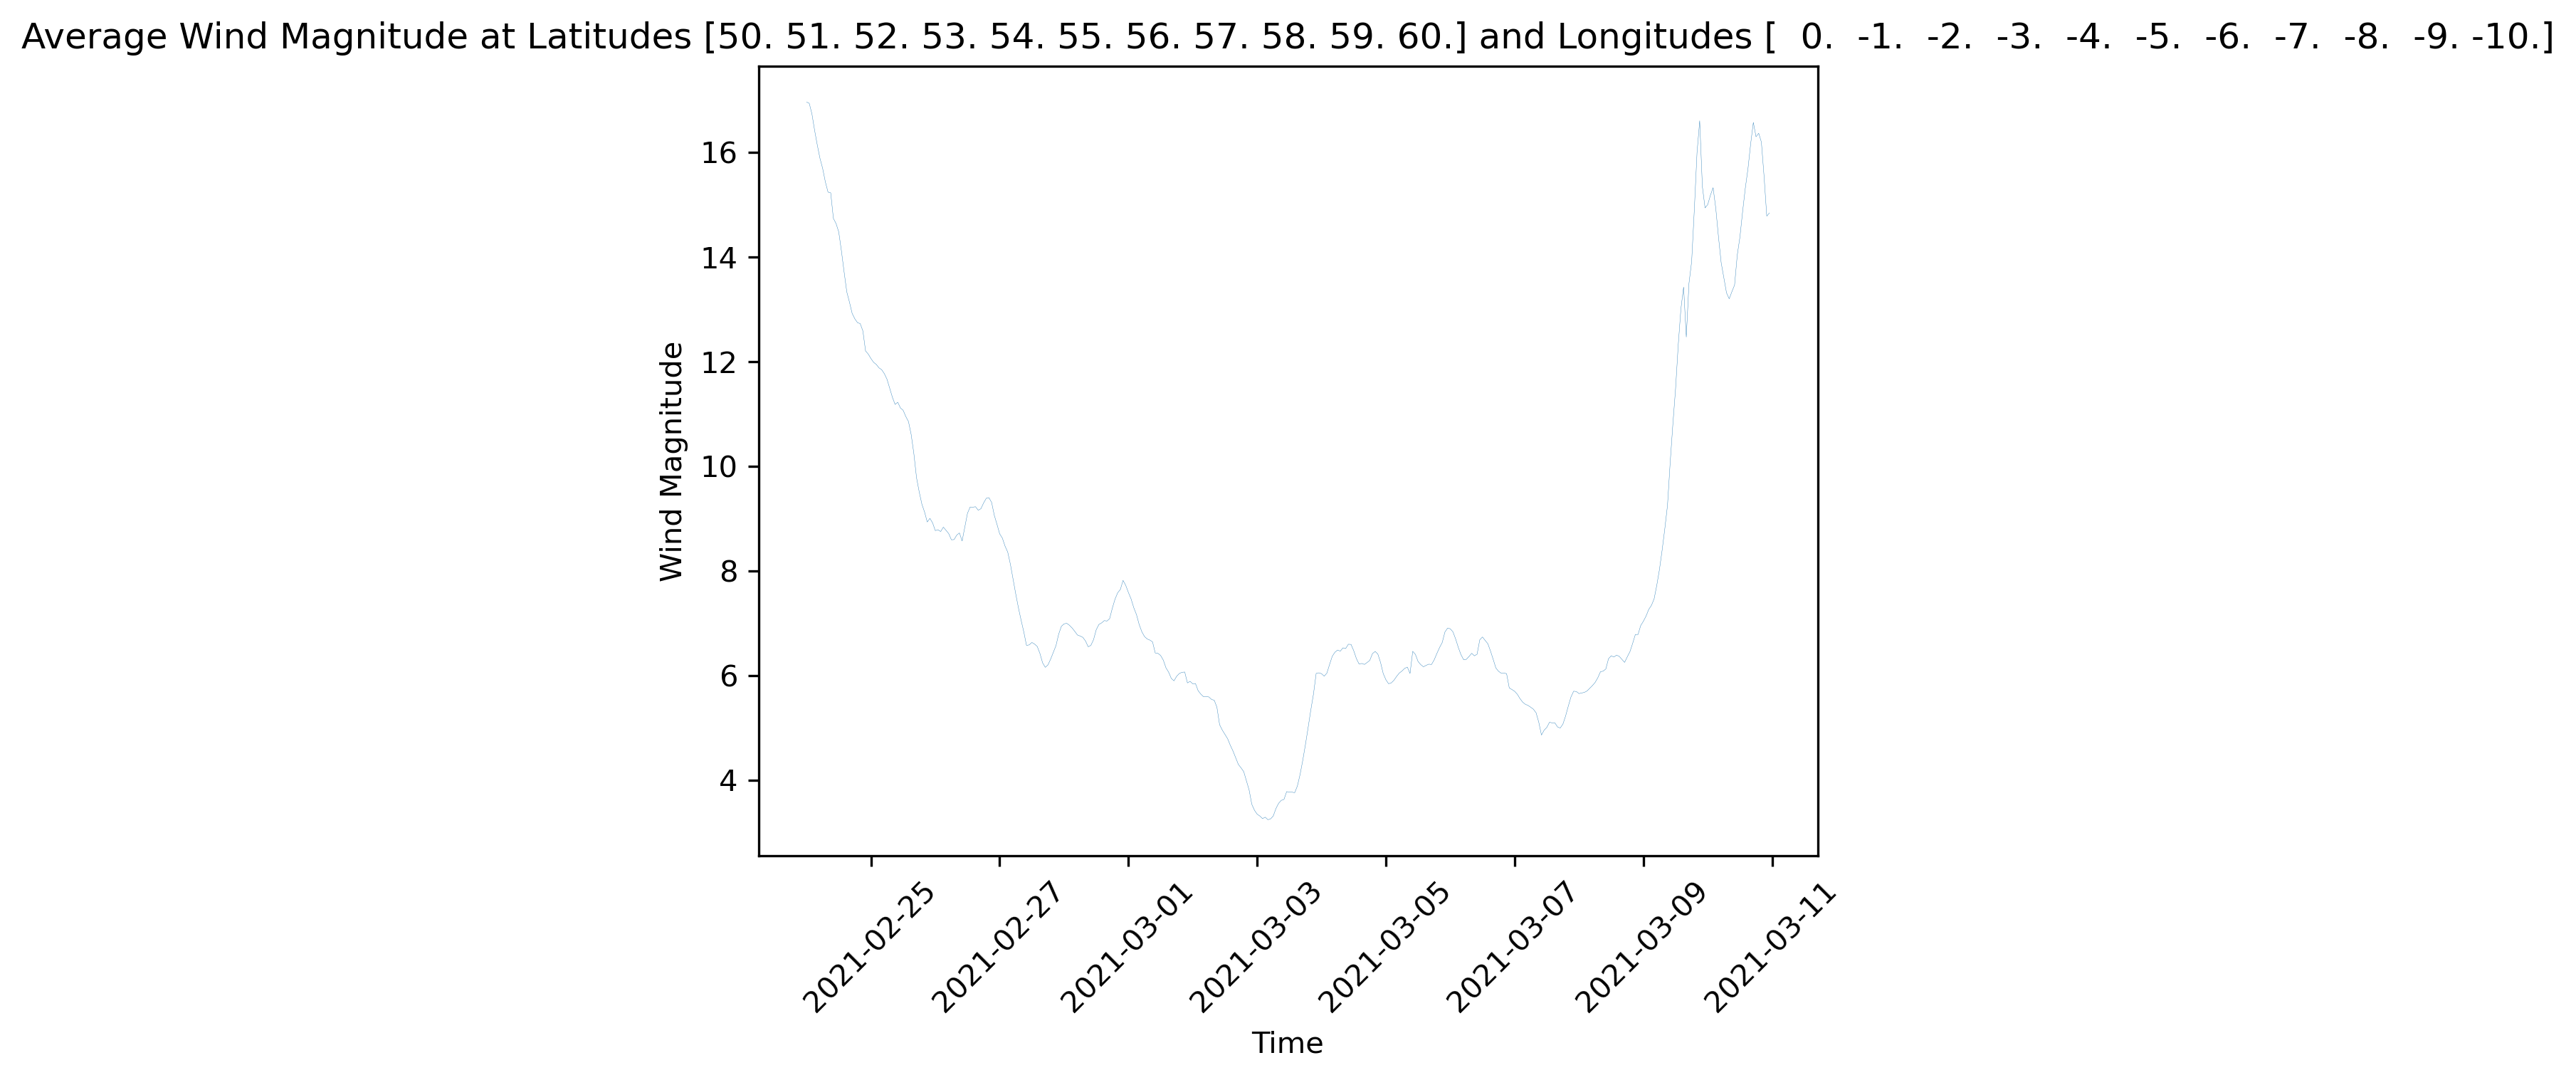

In [14]:
# Specify the latitude and longitude values

latitudes5 = np.linspace(50,60,11)
longitudes5 =np.linspace(0,-10,11)

# Initialize an empty list to store wind magnitude values
wind_mag_values5 = []

# Loop through the specified latitude and longitude values
for lat5 in latitudes5:
    for lon5 in longitudes5:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values5.append(ds.sel(latitude=lat5, longitude=lon5, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values5 = np.array(wind_mag_values5)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag5 = np.mean(wind_mag_values5, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag5, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes5, longitudes5))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()




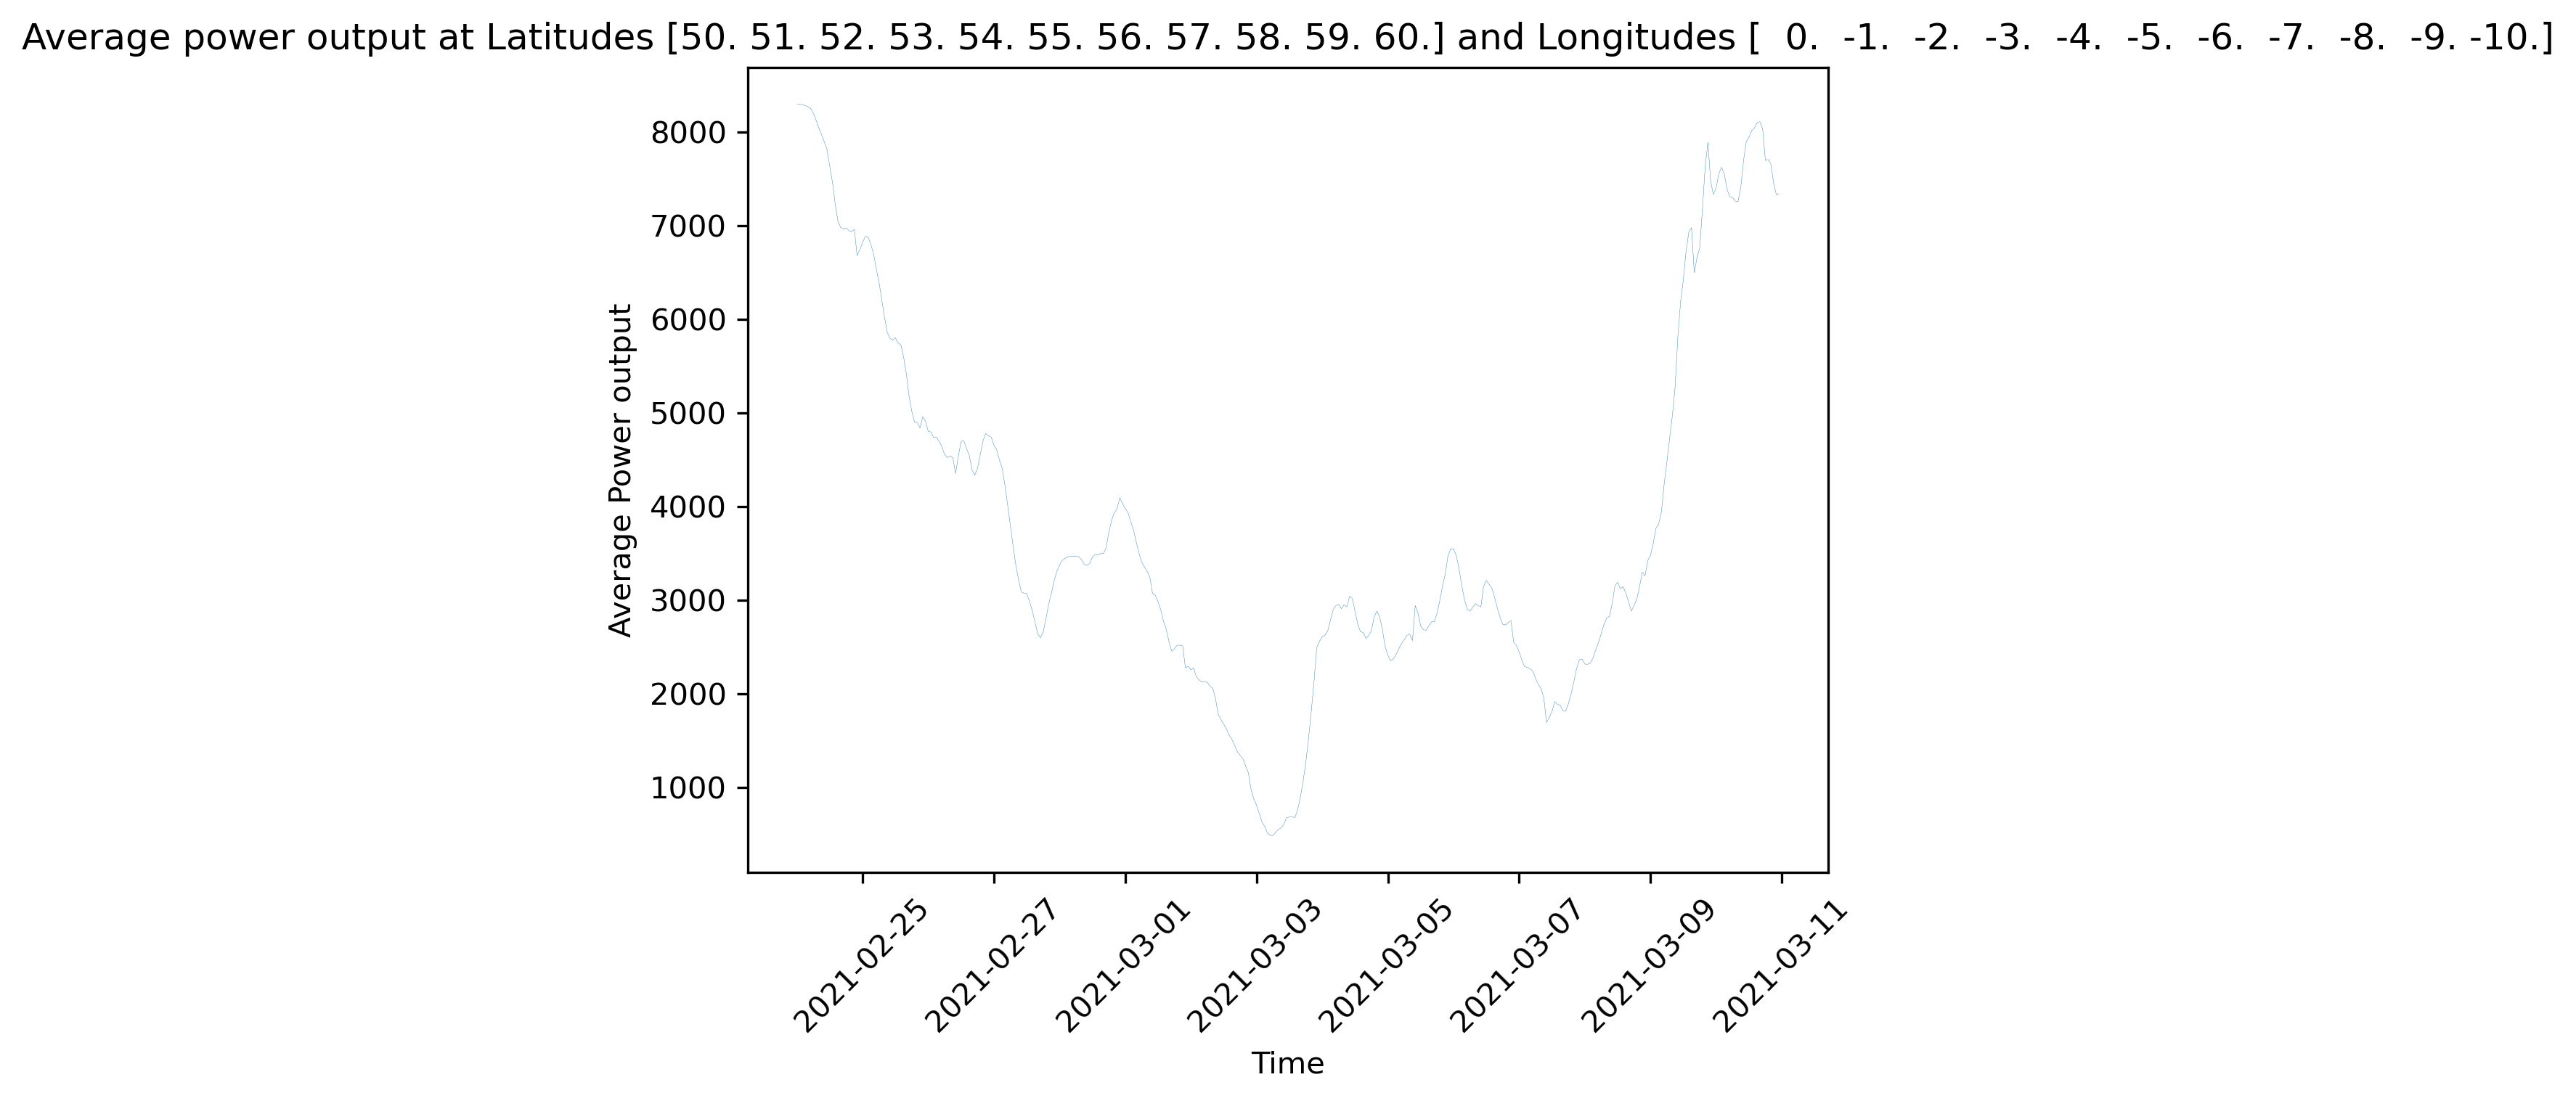

In [15]:
# Specify the latitude and longitude values

latitudes5 = np.linspace(50,60,11)
longitudes5 =np.linspace(0,-10,11)

# Initialize an empty list to store wind magnitude values
power_values5 = []

# Loop through the specified latitude and longitude values
for lat5 in latitudes5:
    for lon5 in longitudes5:
        # Extract power values for the given latitude, longitude, and time range
        power_values5.append(ds.sel(latitude=lat5, longitude=lon5, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values5 = np.array(power_values5)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag5 = np.mean(power_values5, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag5, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes5, longitudes5))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

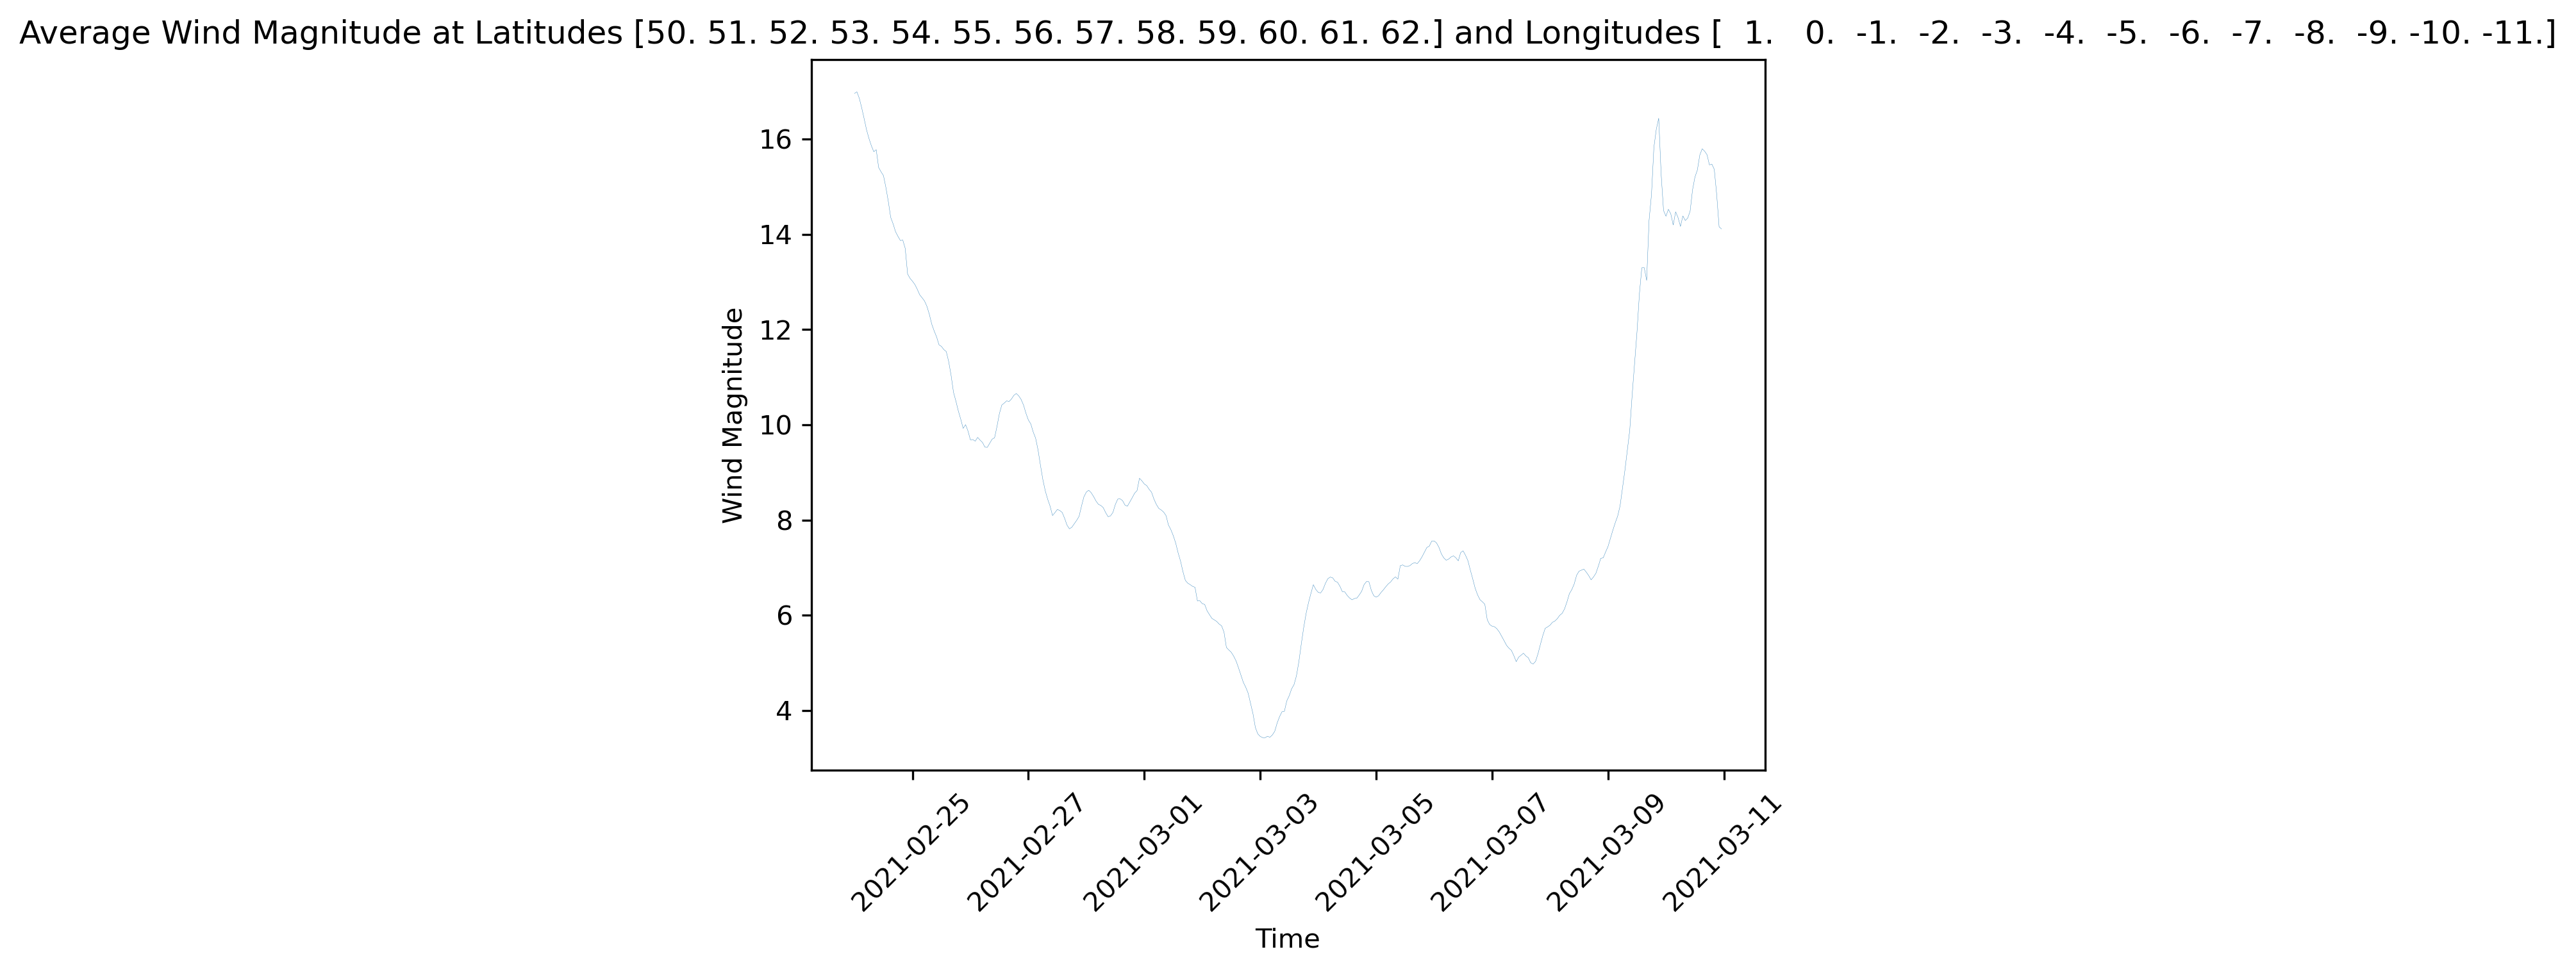

In [16]:
# Specify the latitude and longitude values

latitudes6 = np.linspace(50,62,13)
longitudes6 =np.linspace(1,-11,13)

# Initialize an empty list to store wind magnitude values
wind_mag_values6 = []

# Loop through the specified latitude and longitude values
for lat6 in latitudes6:
    for lon6 in longitudes6:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values6.append(ds.sel(latitude=lat6, longitude=lon6, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values6 = np.array(wind_mag_values6)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag6 = np.mean(wind_mag_values6, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag6, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes6, longitudes6))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()



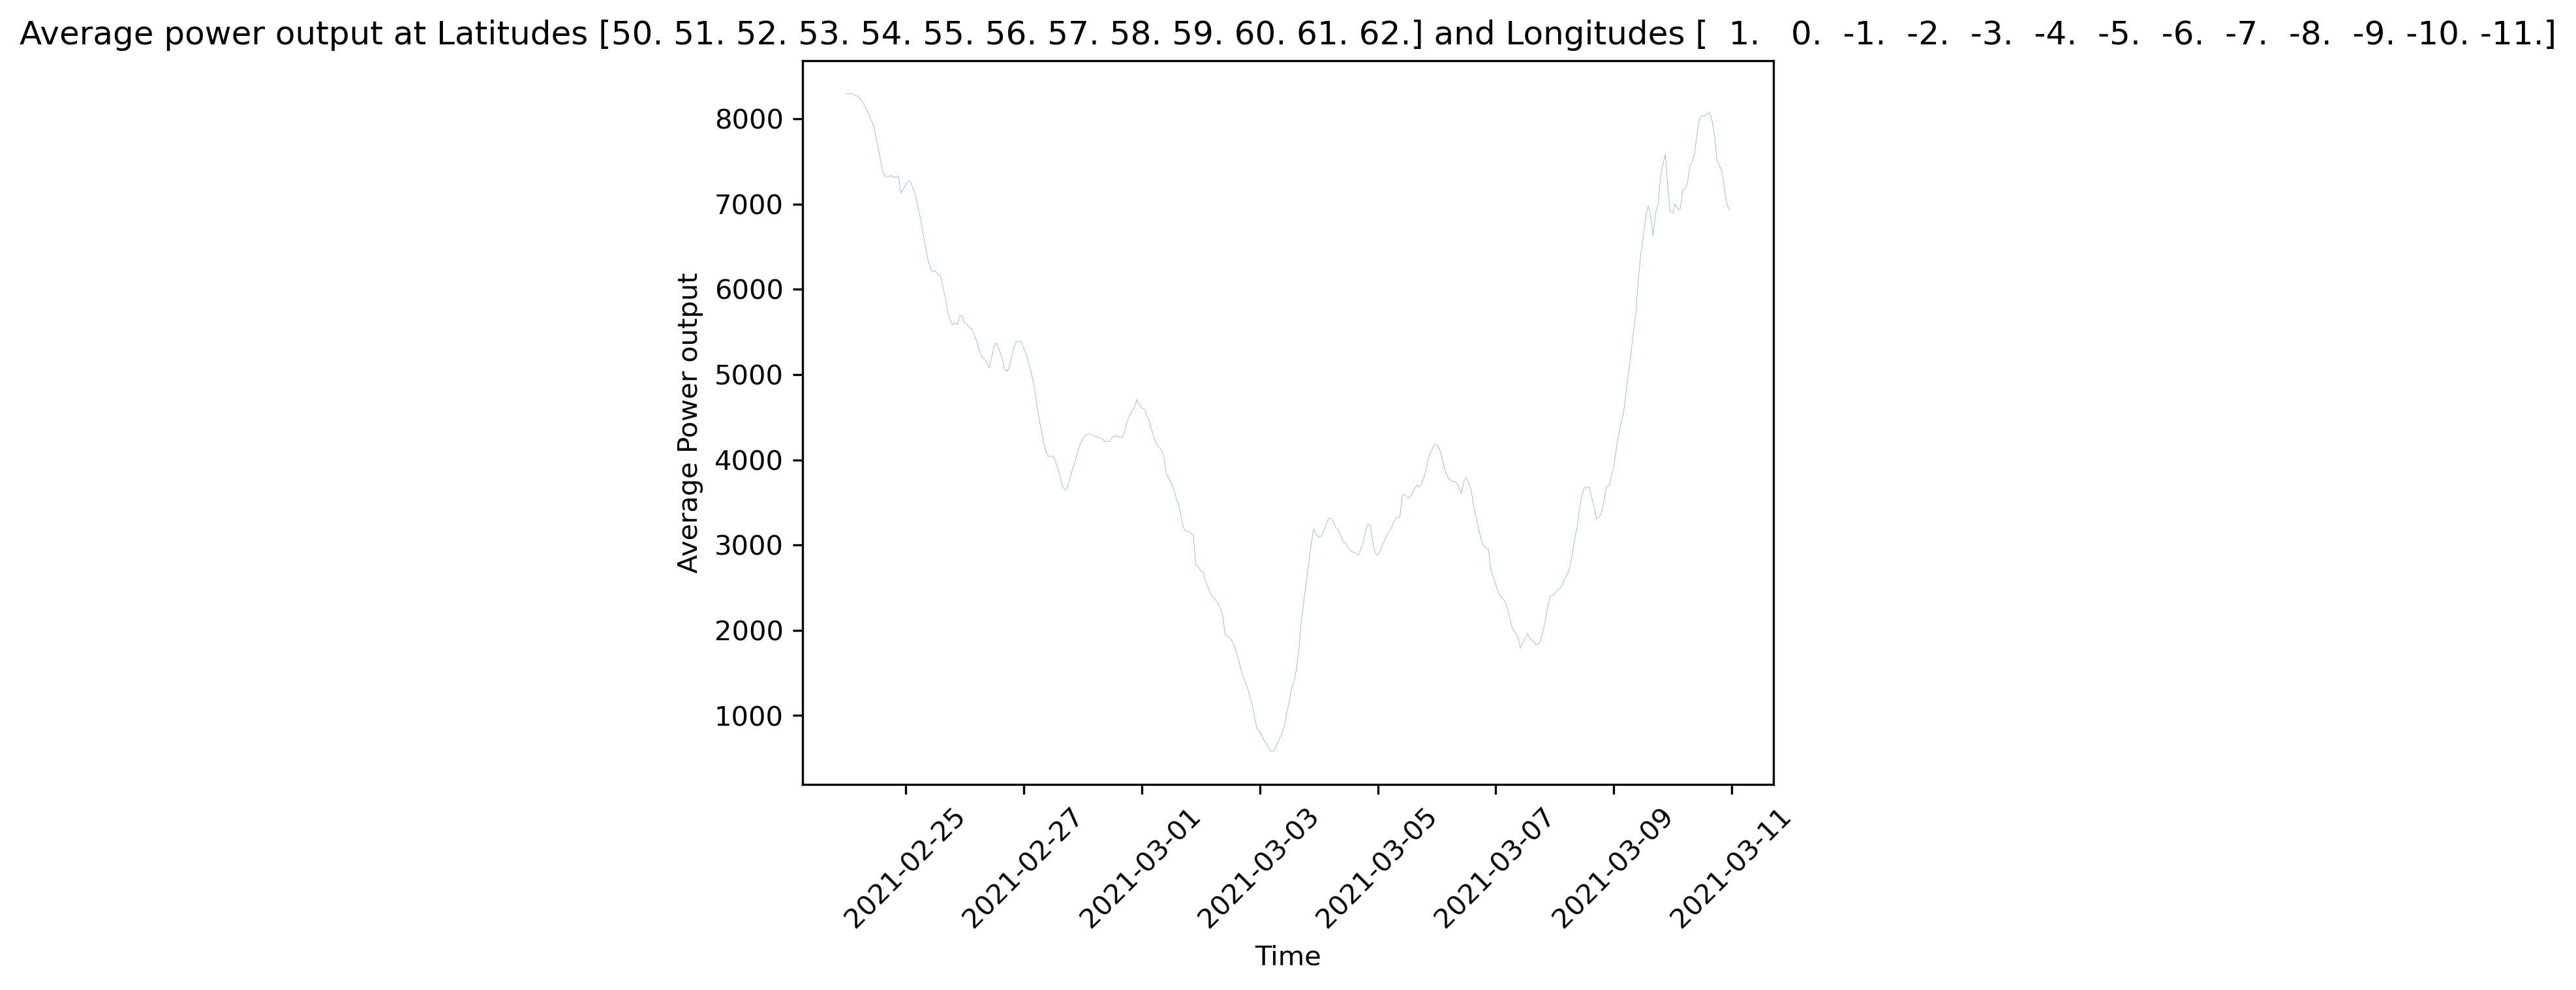

In [17]:
# Specify the latitude and longitude values

latitudes6 = np.linspace(50,62,13)
longitudes6 =np.linspace(1,-11,13)

# Initialize an empty list to store wind magnitude values
power_values6 = []

# Loop through the specified latitude and longitude values
for lat6 in latitudes6:
    for lon6 in longitudes6:
        # Extract power values for the given latitude, longitude, and time range
        power_values6.append(ds.sel(latitude=lat6, longitude=lon6, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values6 = np.array(power_values6)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag6 = np.mean(power_values6, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag6, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes6, longitudes6))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

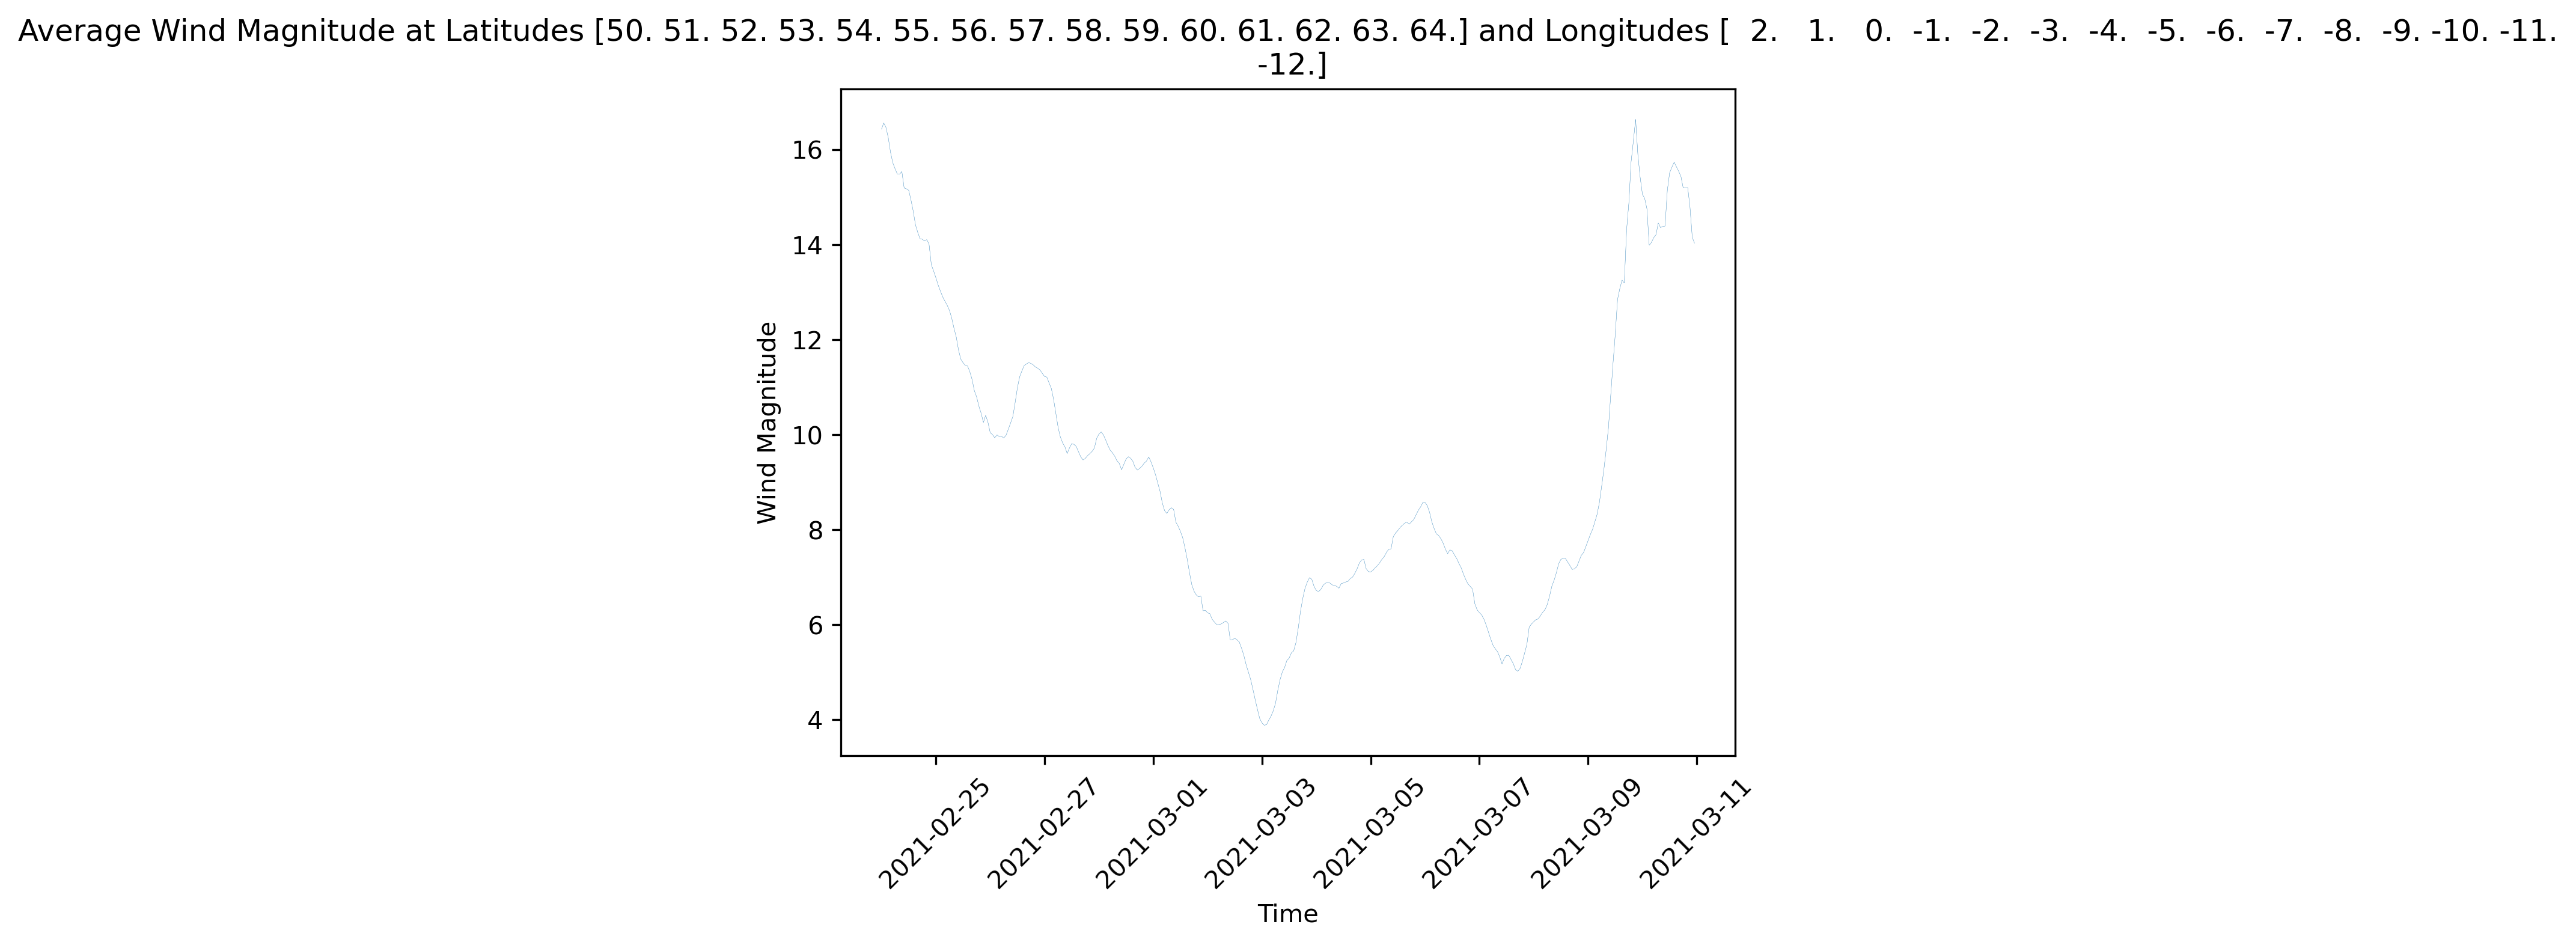

In [18]:
# Specify the latitude and longitude values

latitudes7 = np.linspace(50,64,15)
longitudes7 =np.linspace(2,-12,15)

# Initialize an empty list to store wind magnitude values
wind_mag_values7 = []

# Loop through the specified latitude and longitude values
for lat7 in latitudes7:
    for lon7 in longitudes7:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values7.append(ds.sel(latitude=lat7, longitude=lon7, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values7 = np.array(wind_mag_values7)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag7 = np.mean(wind_mag_values7, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag7, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes7, longitudes7))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()



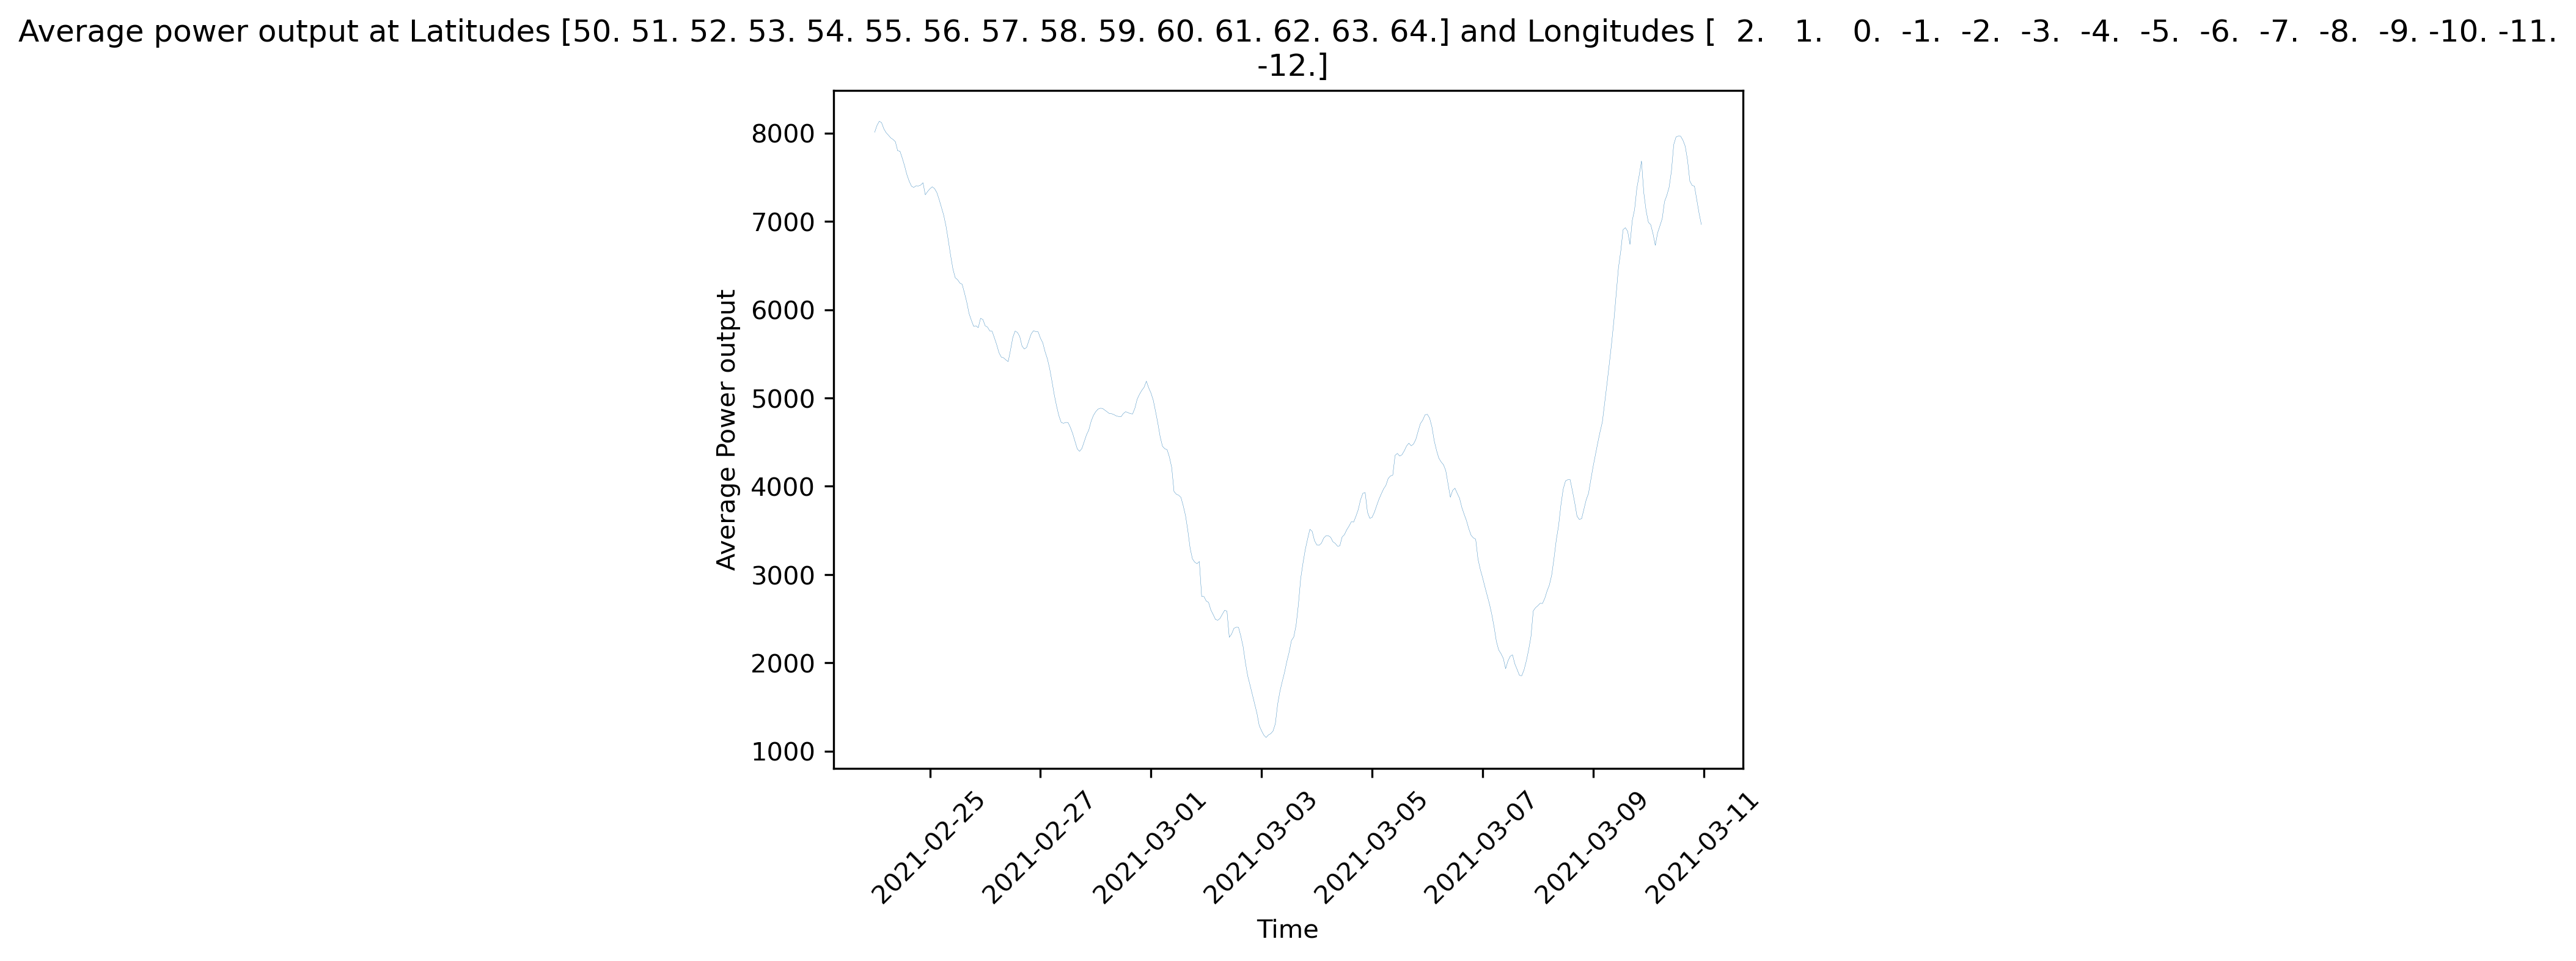

In [19]:
# Specify the latitude and longitude values

latitudes7 = np.linspace(50,64,15)
longitudes7 =np.linspace(2,-12,15)


# Initialize an empty list to store wind magnitude values
power_values7 = []

# Loop through the specified latitude and longitude values
for lat7 in latitudes7:
    for lon7 in longitudes7:
        # Extract power values for the given latitude, longitude, and time range
        power_values7.append(ds.sel(latitude=lat7, longitude=lon7, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values7 = np.array(power_values7)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag7 = np.mean(power_values7, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag7, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes7, longitudes7))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

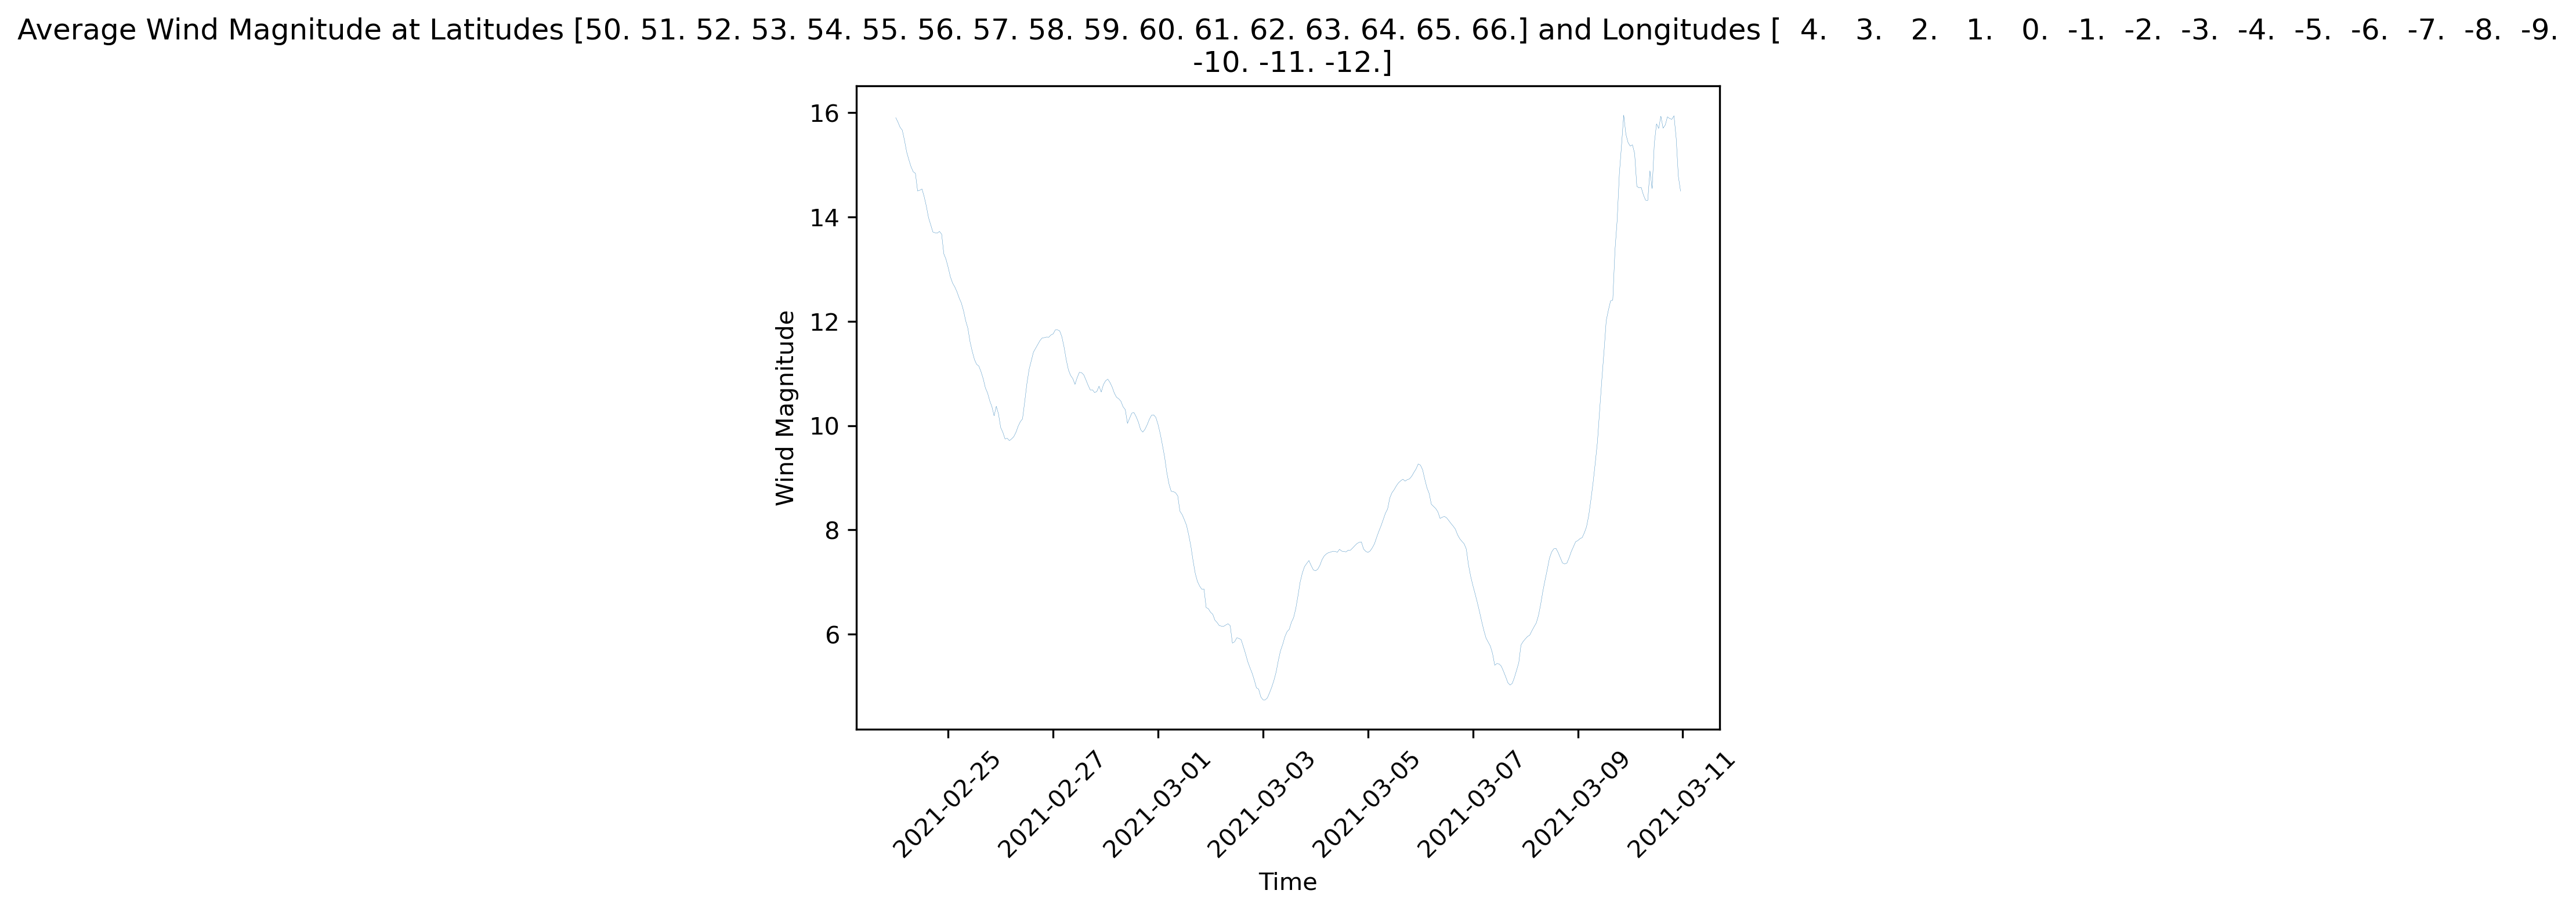

In [20]:
latitudes8 = np.linspace(50,66,17)
longitudes8 =np.linspace(4,-12,17)

# Initialize an empty list to store wind magnitude values
wind_mag_values8 = []

# Loop through the specified latitude and longitude values
for lat8 in latitudes8:
    for lon8 in longitudes8:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values8.append(ds.sel(latitude=lat8, longitude=lon8, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values8 = np.array(wind_mag_values8)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag8 = np.mean(wind_mag_values8, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag8, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes8, longitudes8))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()




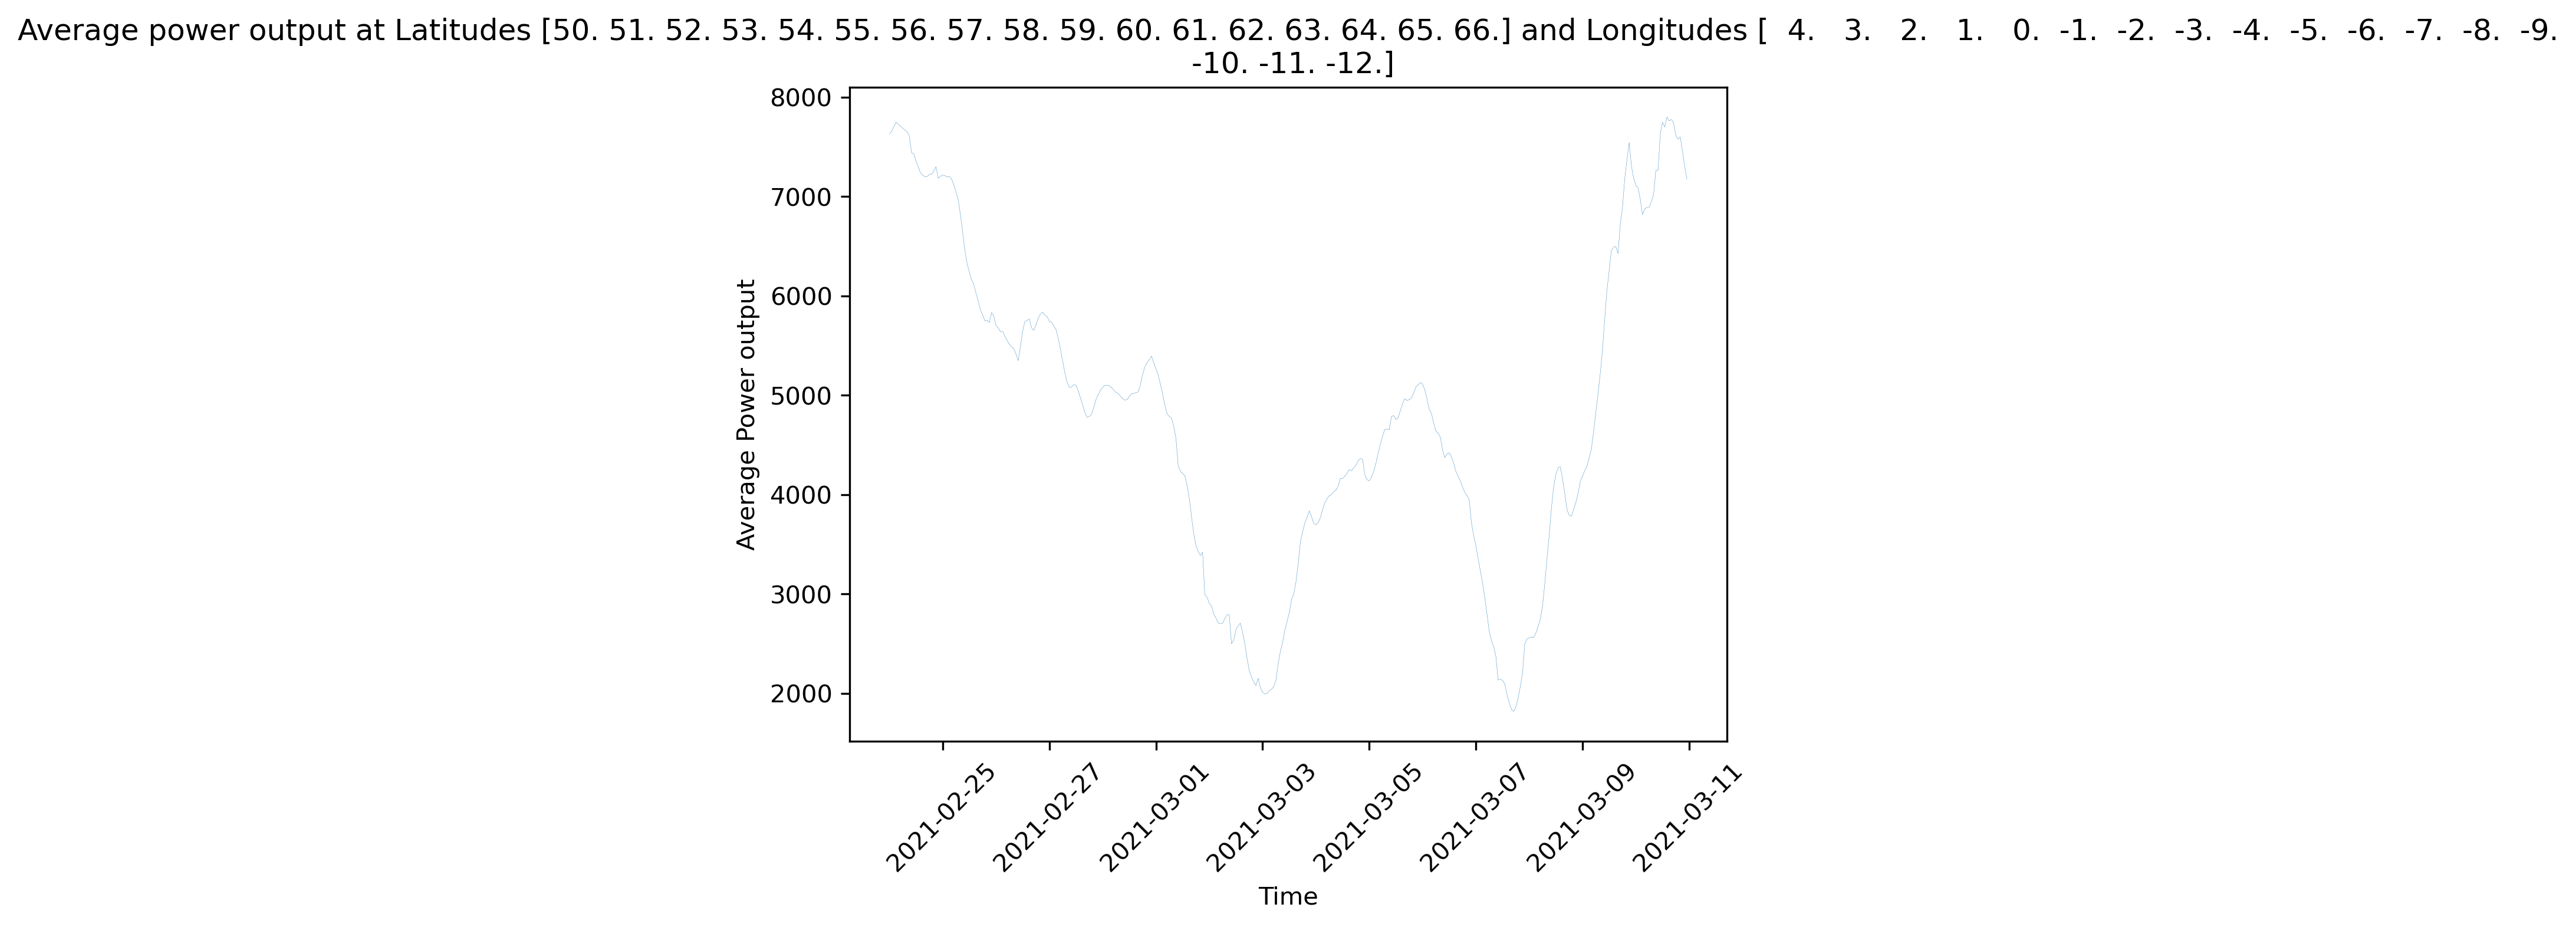

In [21]:
latitudes8 = np.linspace(50,66,17)
longitudes8 =np.linspace(4,-12,17)

# Initialize an empty list to store wind magnitude values
power_values8 = []

# Loop through the specified latitude and longitude values
for lat8 in latitudes8:
    for lon8 in longitudes8:
        # Extract power values for the given latitude, longitude, and time range
        power_values8.append(ds.sel(latitude=lat8, longitude=lon8, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values8 = np.array(power_values8)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag8 = np.mean(power_values8, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag8, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes8, longitudes8))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

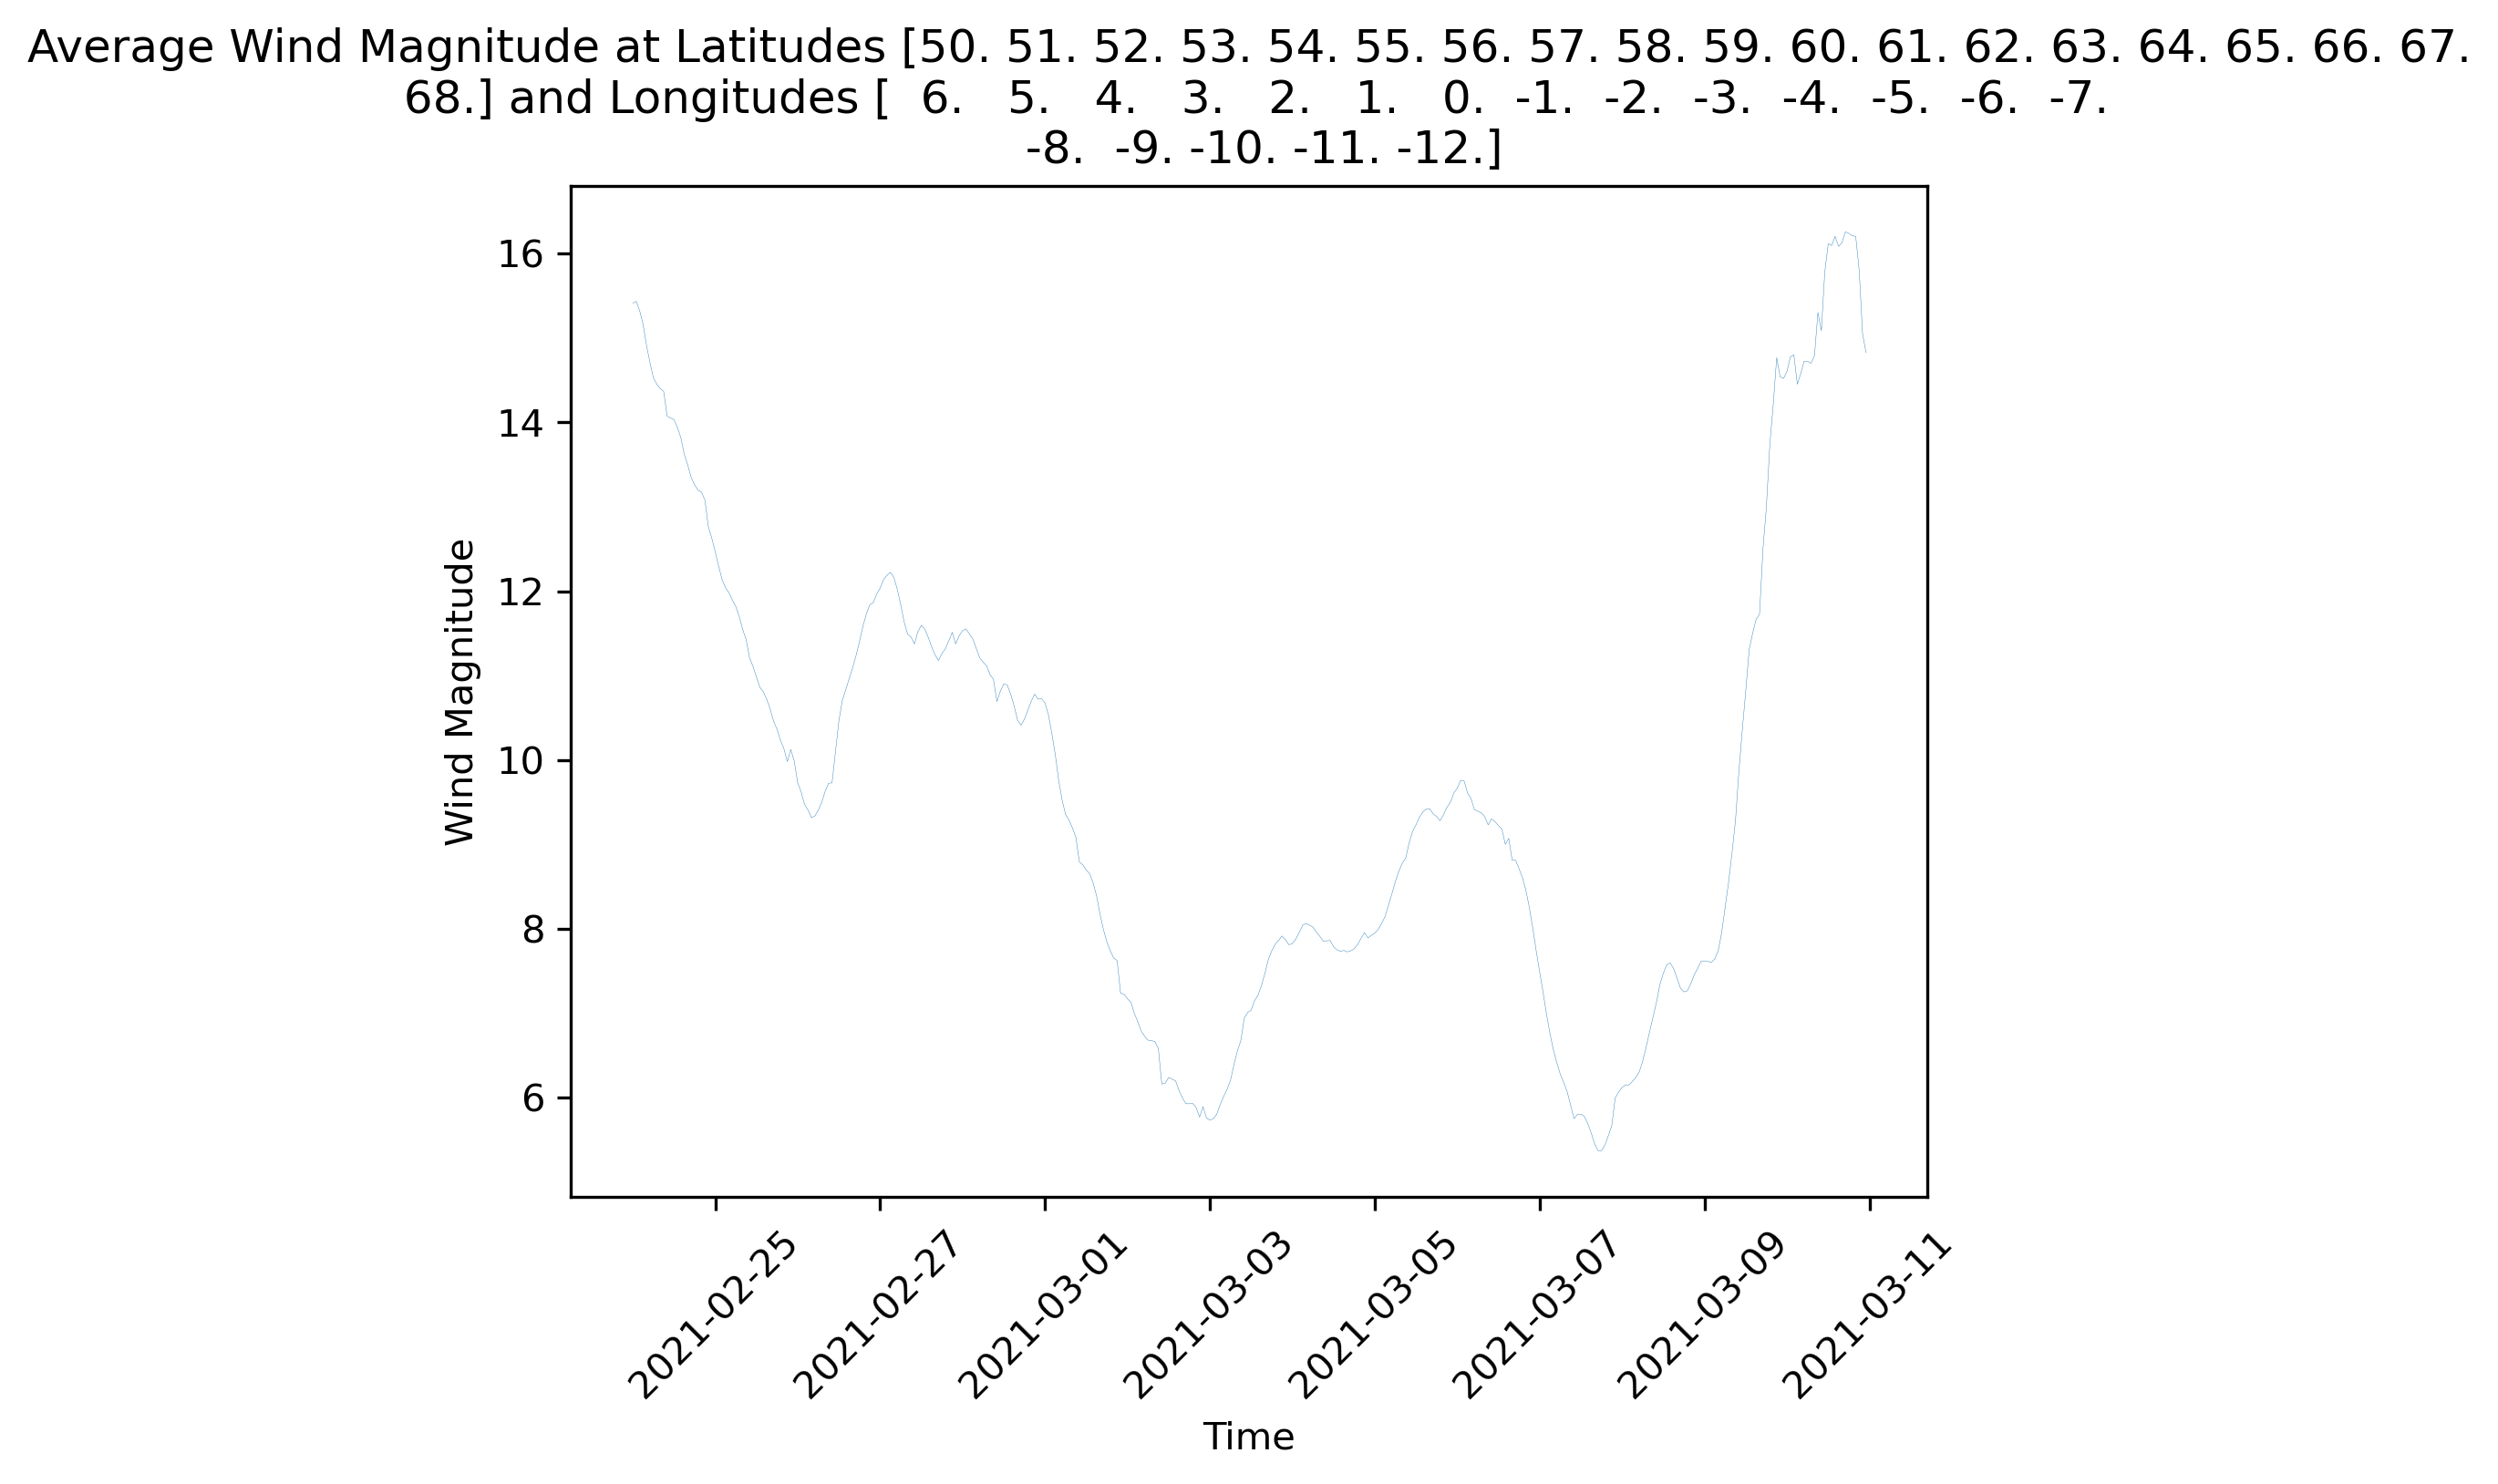

In [22]:
latitudes9 = np.linspace(50,68,19)
longitudes9 =np.linspace(6,-12,19)

# Initialize an empty list to store wind magnitude values
wind_mag_values9 = []

# Loop through the specified latitude and longitude values
for lat9 in latitudes9:
    for lon9 in longitudes9:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values9.append(ds.sel(latitude=lat9, longitude=lon9, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values9 = np.array(wind_mag_values9)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag9 = np.mean(wind_mag_values9, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag9, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes9, longitudes9))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()



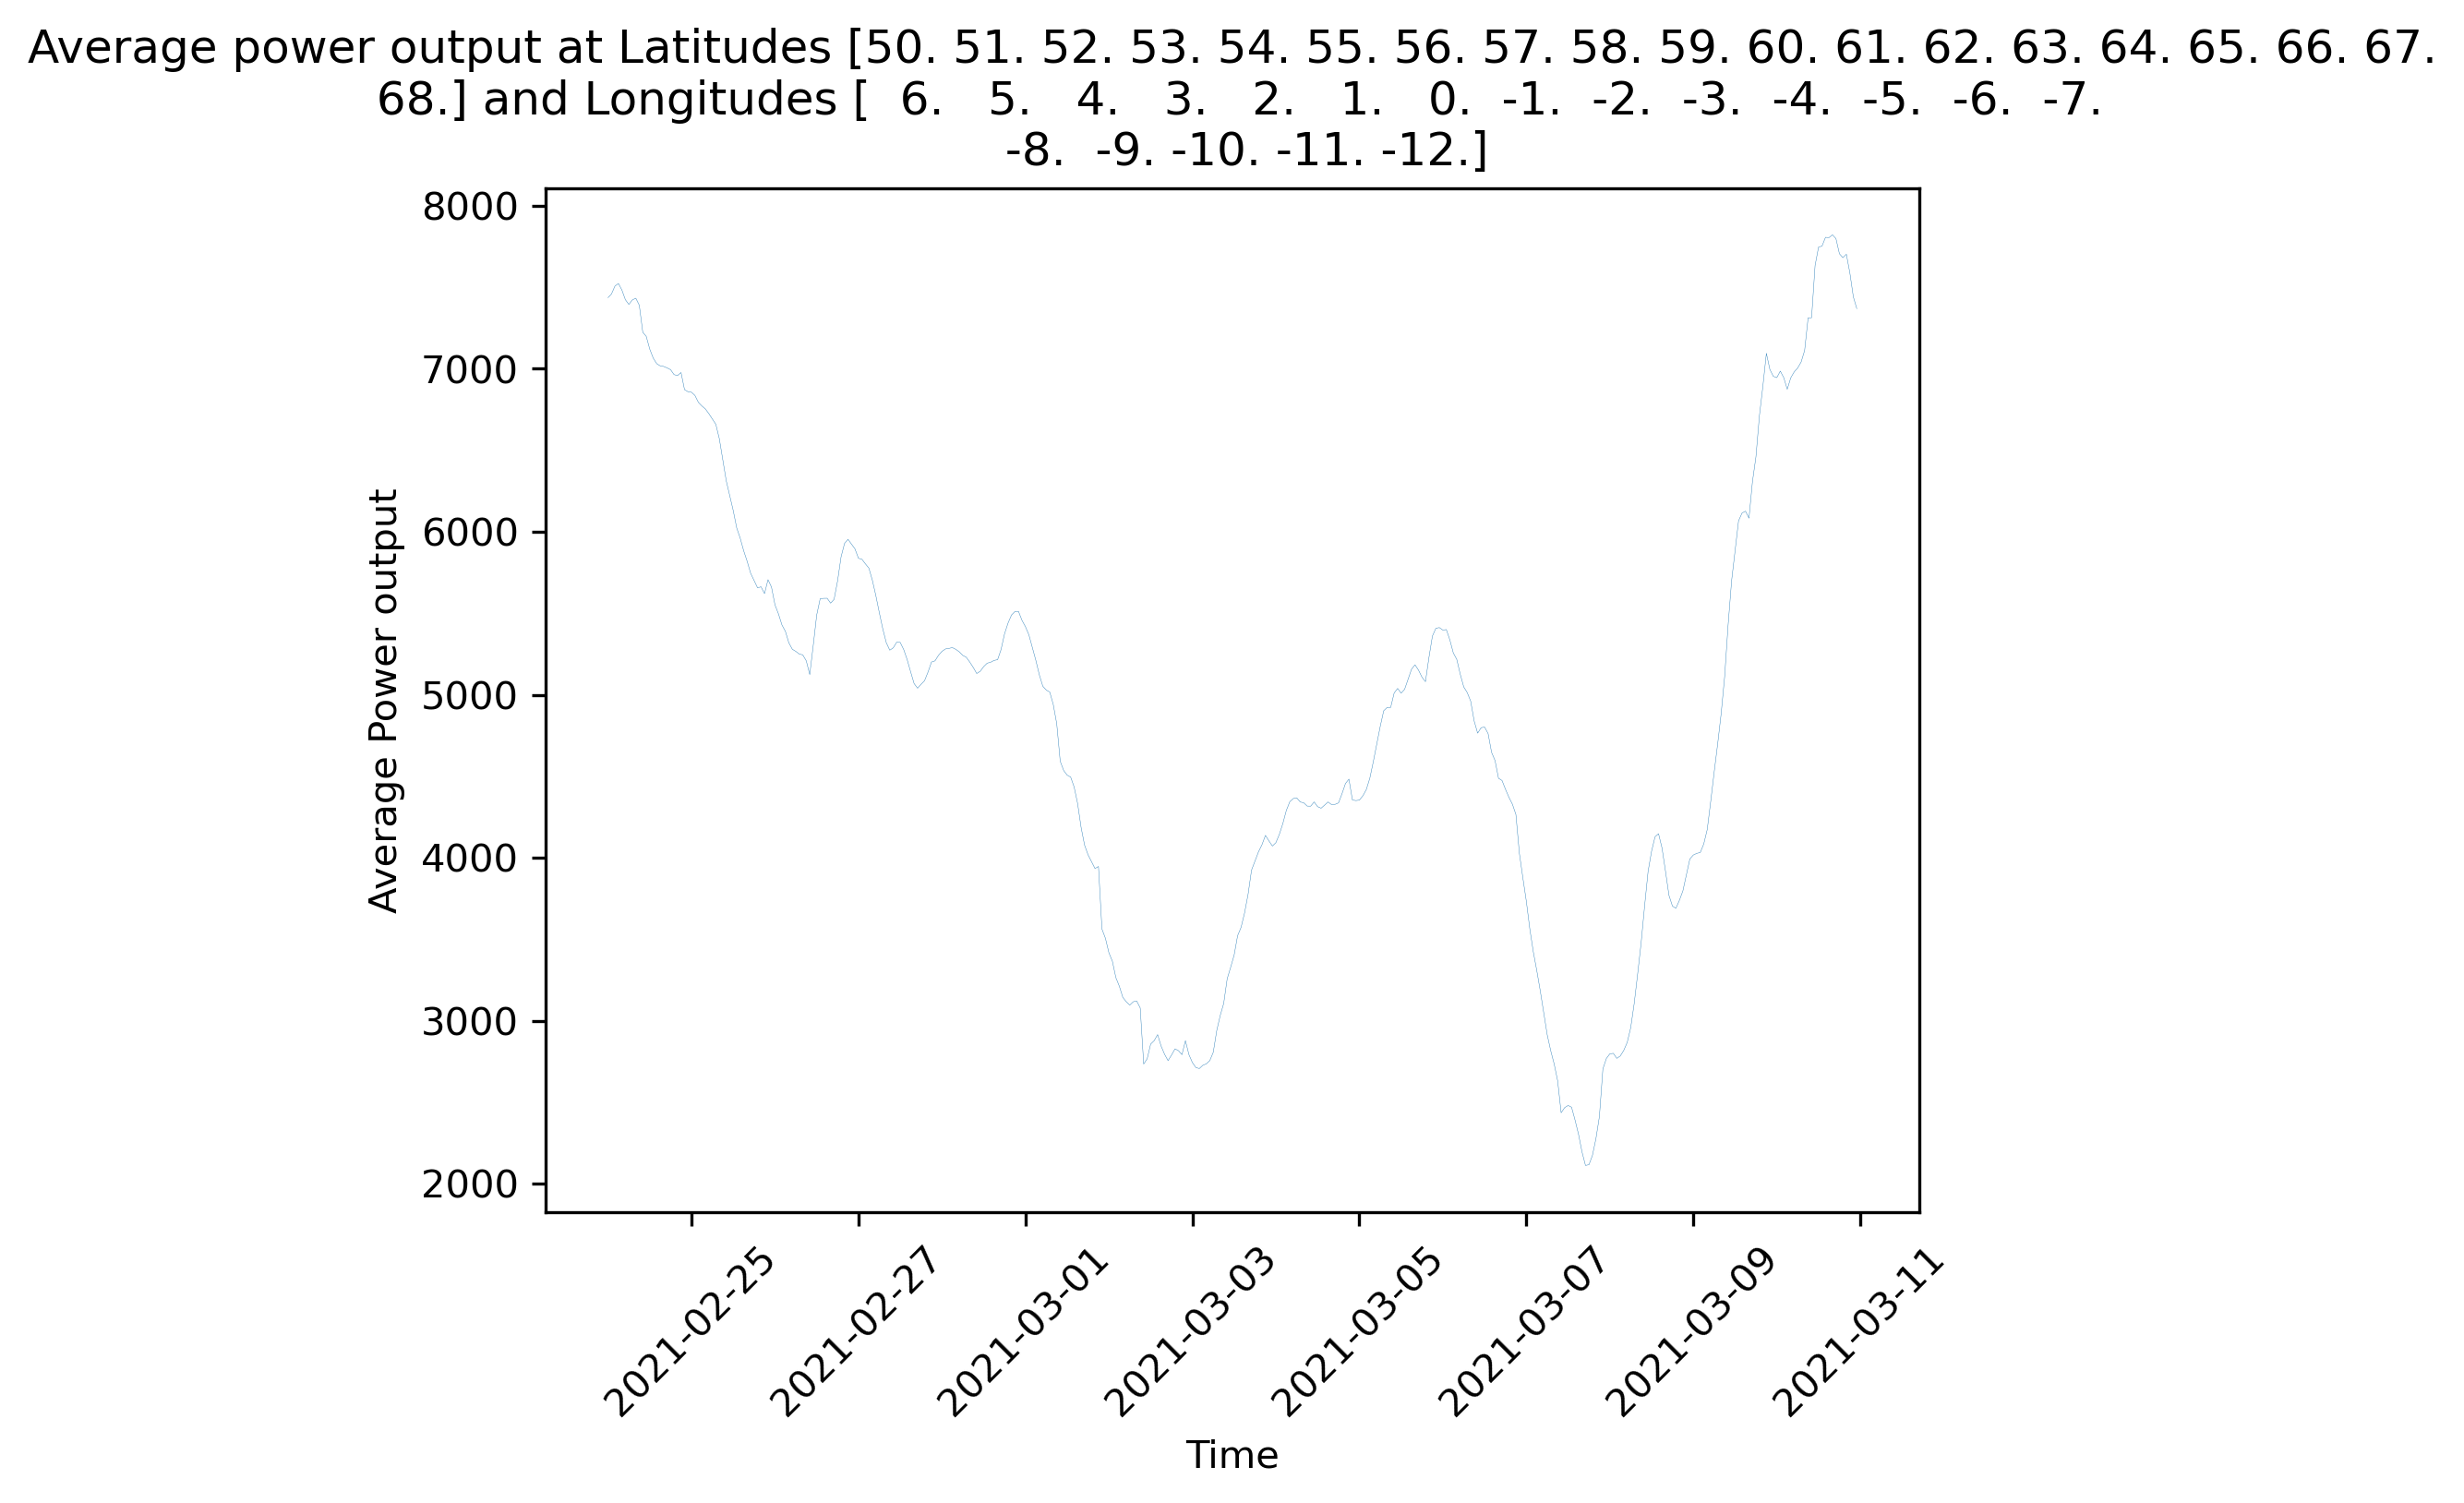

In [23]:
latitudes9 = np.linspace(50,68,19)
longitudes9 =np.linspace(6,-12,19)

# Initialize an empty list to store wind magnitude values
power_values9 = []

# Loop through the specified latitude and longitude values
for lat9 in latitudes9:
    for lon9 in longitudes9:
        # Extract power values for the given latitude, longitude, and time range
        power_values9.append(ds.sel(latitude=lat9, longitude=lon9, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values9 = np.array(power_values9)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag9 = np.mean(power_values9, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag9, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes9, longitudes9))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

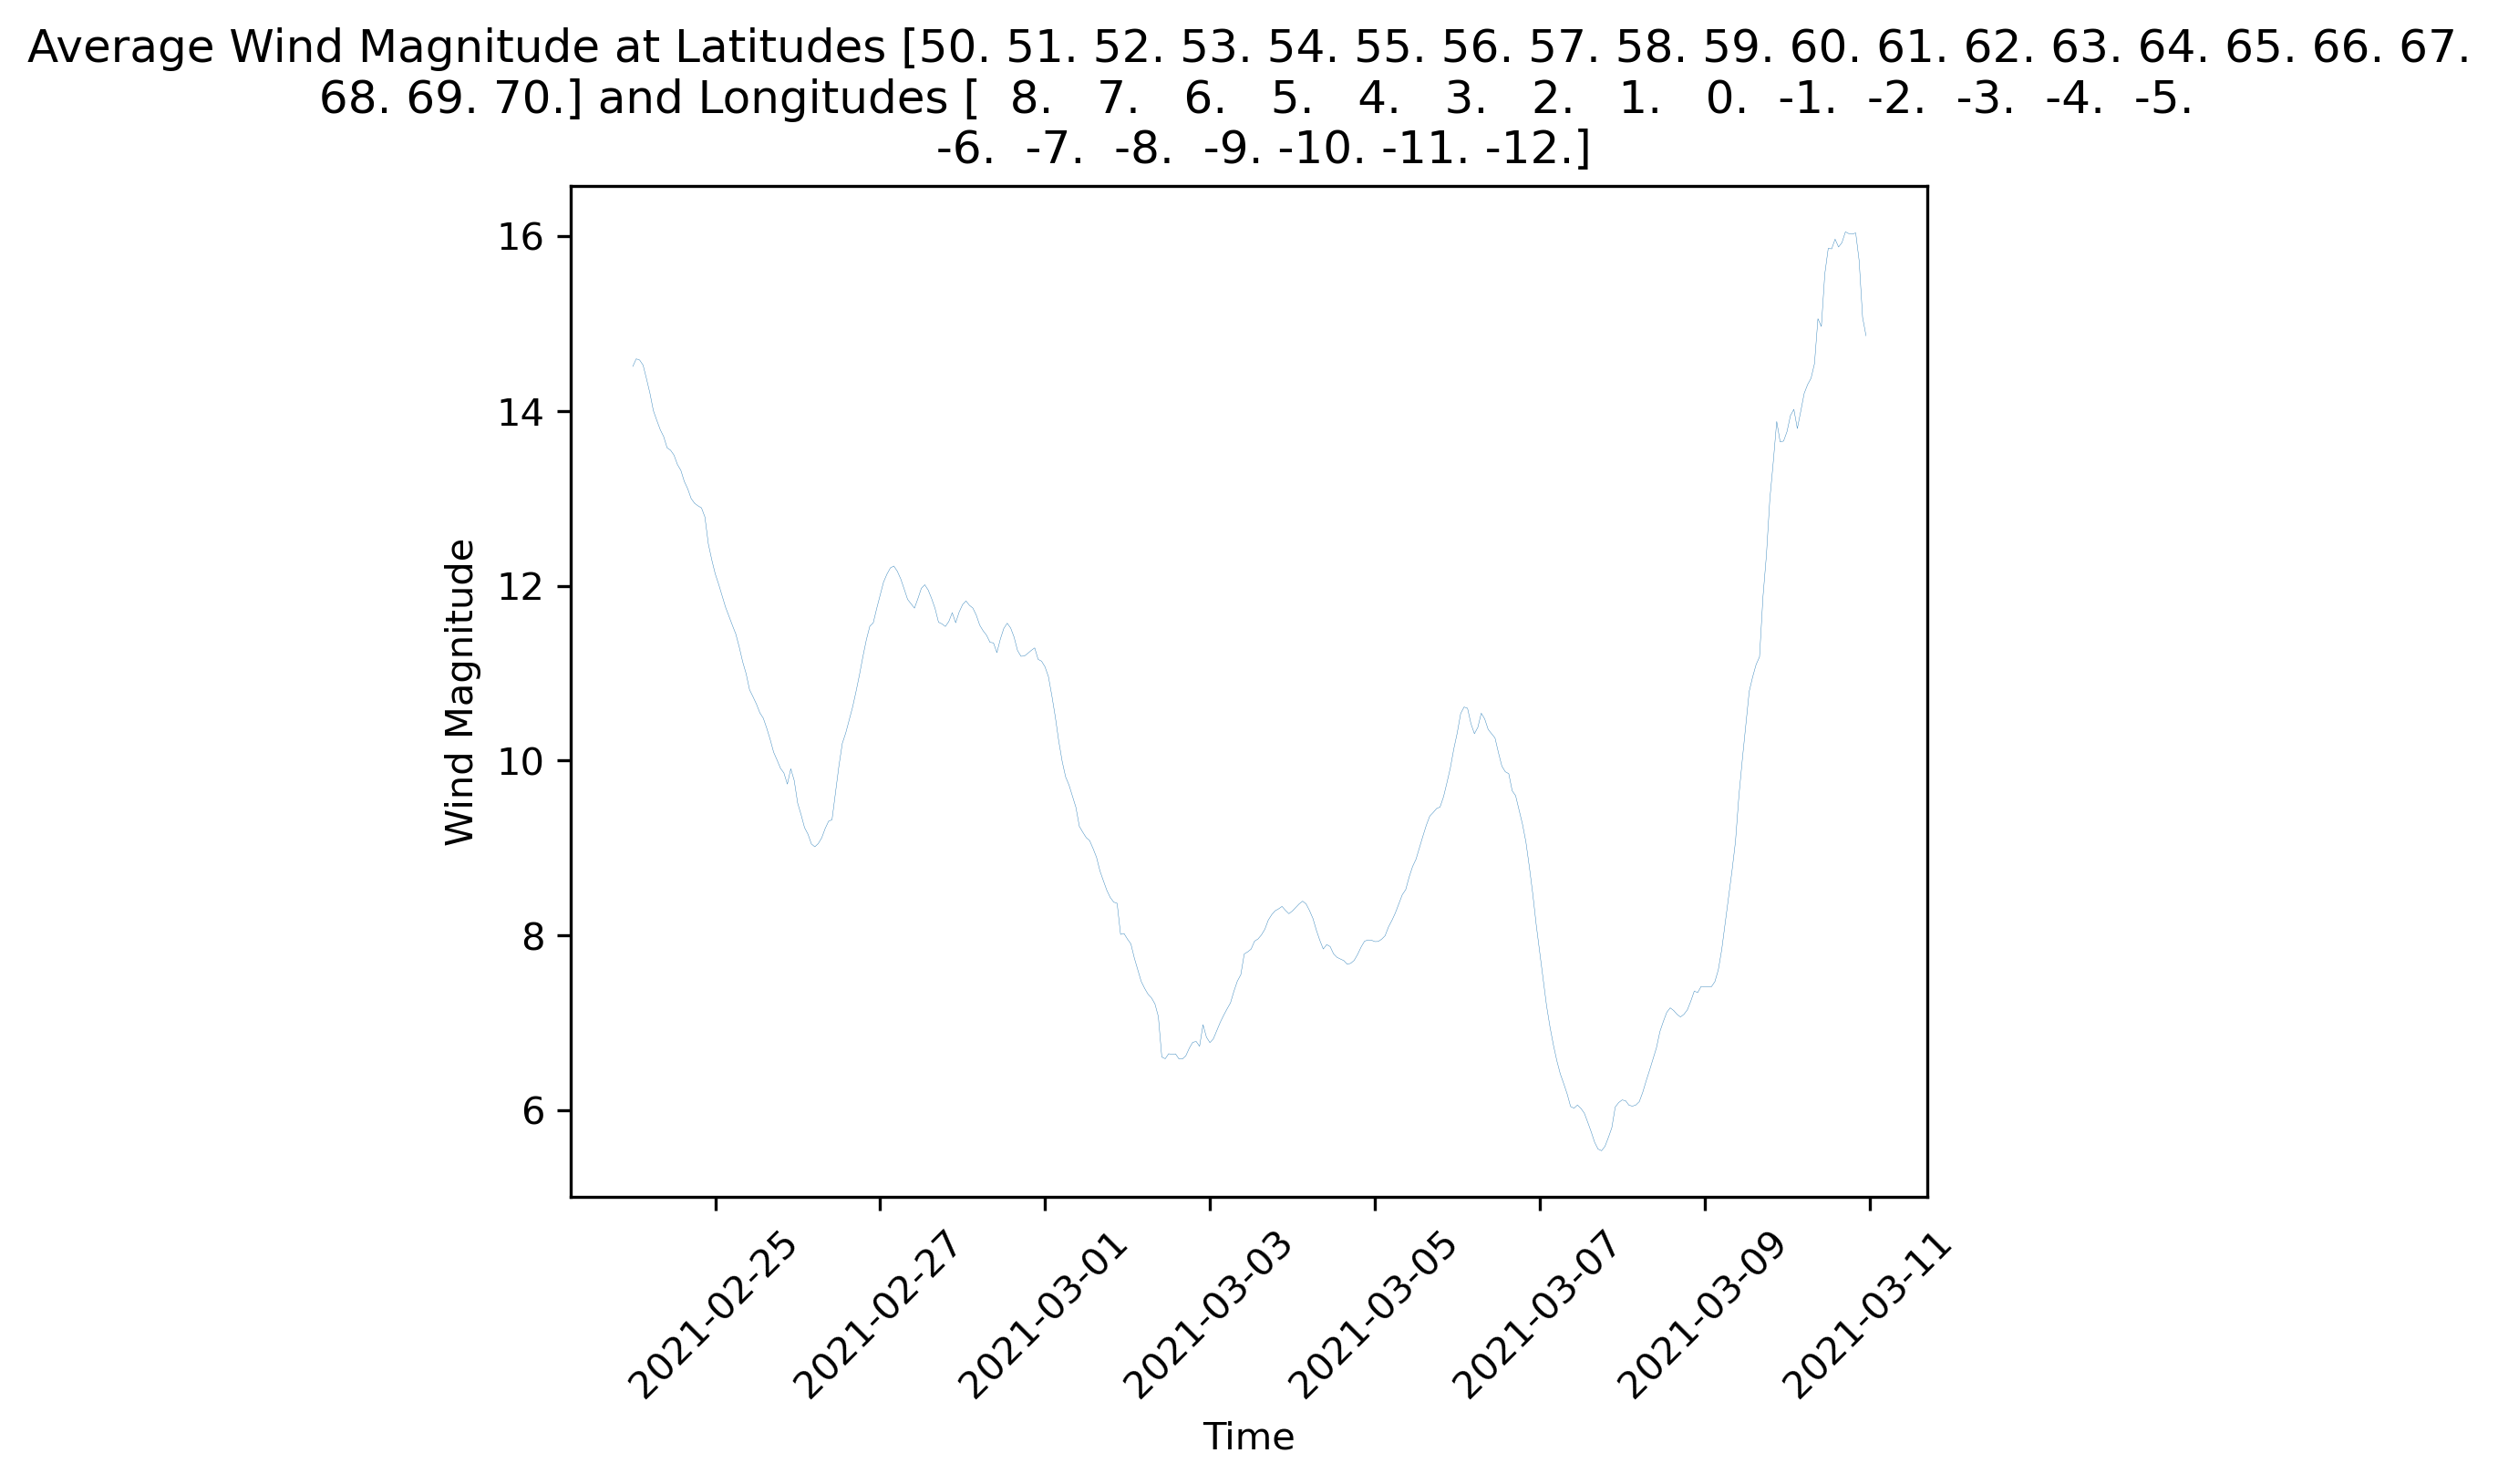

In [24]:
latitudes10 = np.linspace(50,70,21)
longitudes10 =np.linspace(8,-12,21)

# Initialize an empty list to store wind magnitude values
wind_mag_values10 = []

# Loop through the specified latitude and longitude values
for lat10 in latitudes10:
    for lon10 in longitudes10:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values10.append(ds.sel(latitude=lat10, longitude=lon10, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values10 = np.array(wind_mag_values10)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag10 = np.mean(wind_mag_values10, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag10, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes10, longitudes10))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()




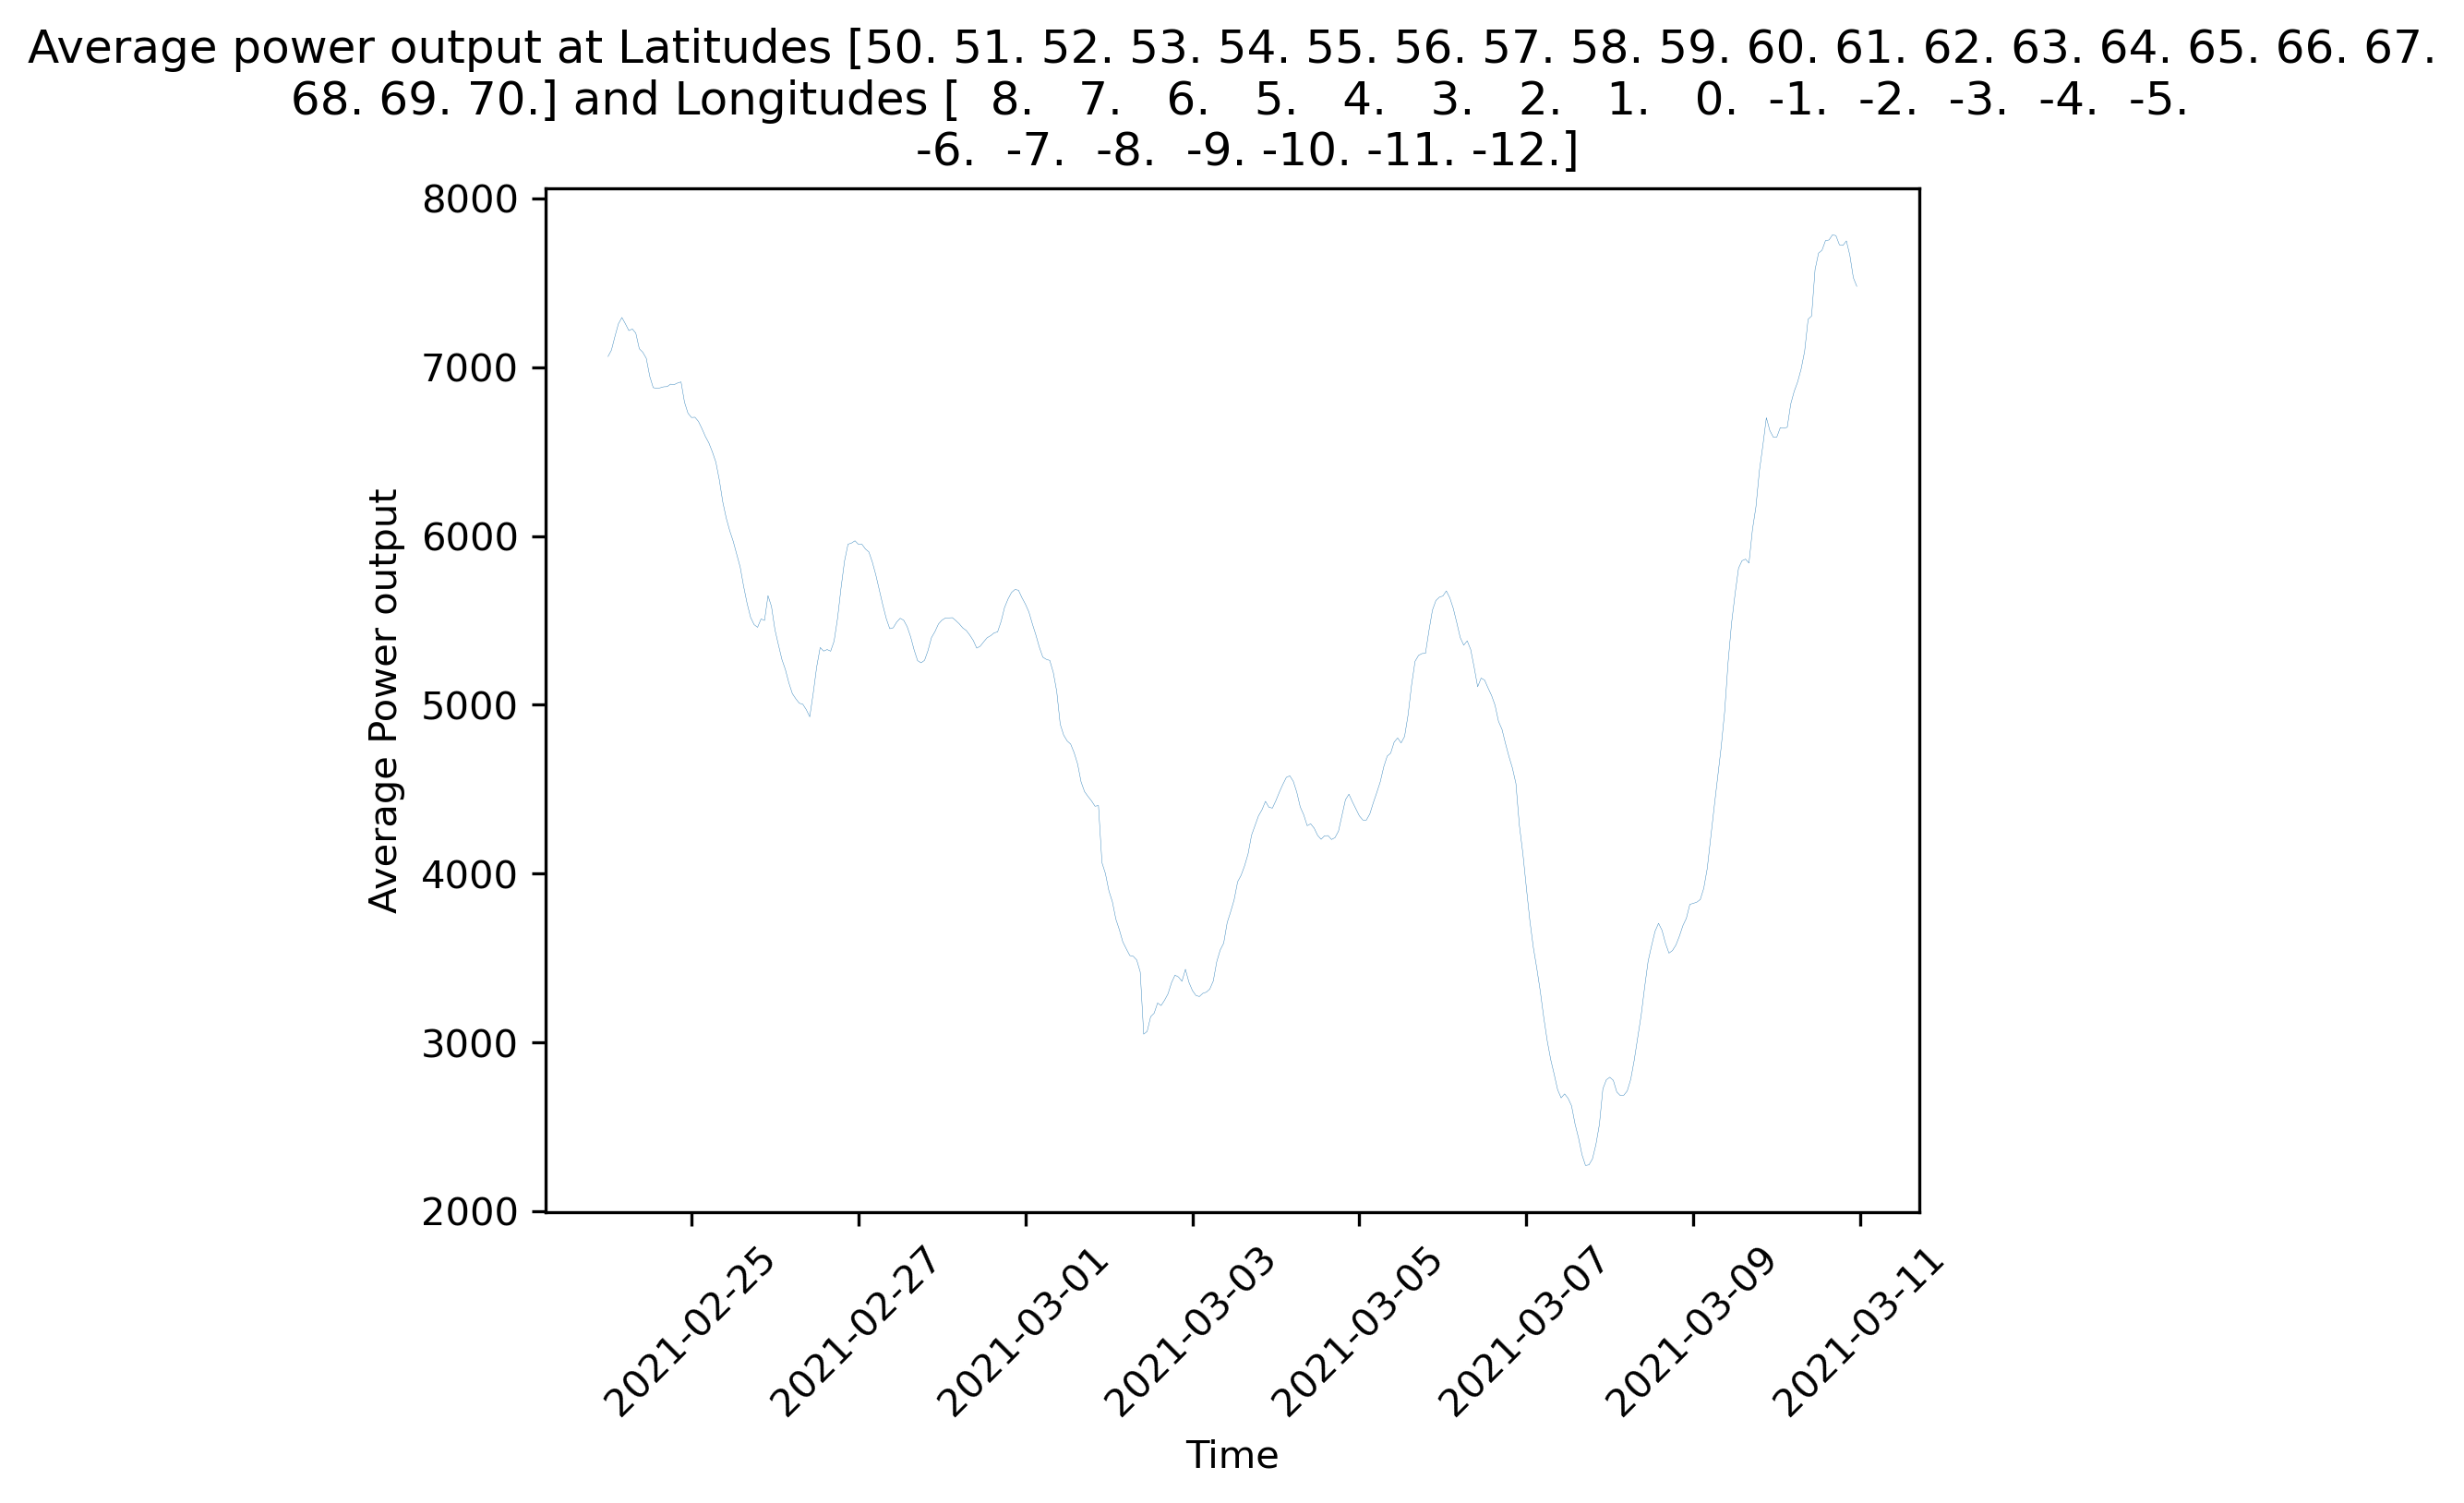

In [25]:
latitudes10 = np.linspace(50,70,21)
longitudes10 =np.linspace(8,-12,21)

# Initialize an empty list to store wind magnitude values
power_values10 = []

# Loop through the specified latitude and longitude values
for lat10 in latitudes10:
    for lon10 in longitudes10:
        # Extract power values for the given latitude, longitude, and time range
        power_values10.append(ds.sel(latitude=lat10, longitude=lon10, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values10 = np.array(power_values10)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag10 = np.mean(power_values10, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag10, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes10, longitudes10))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

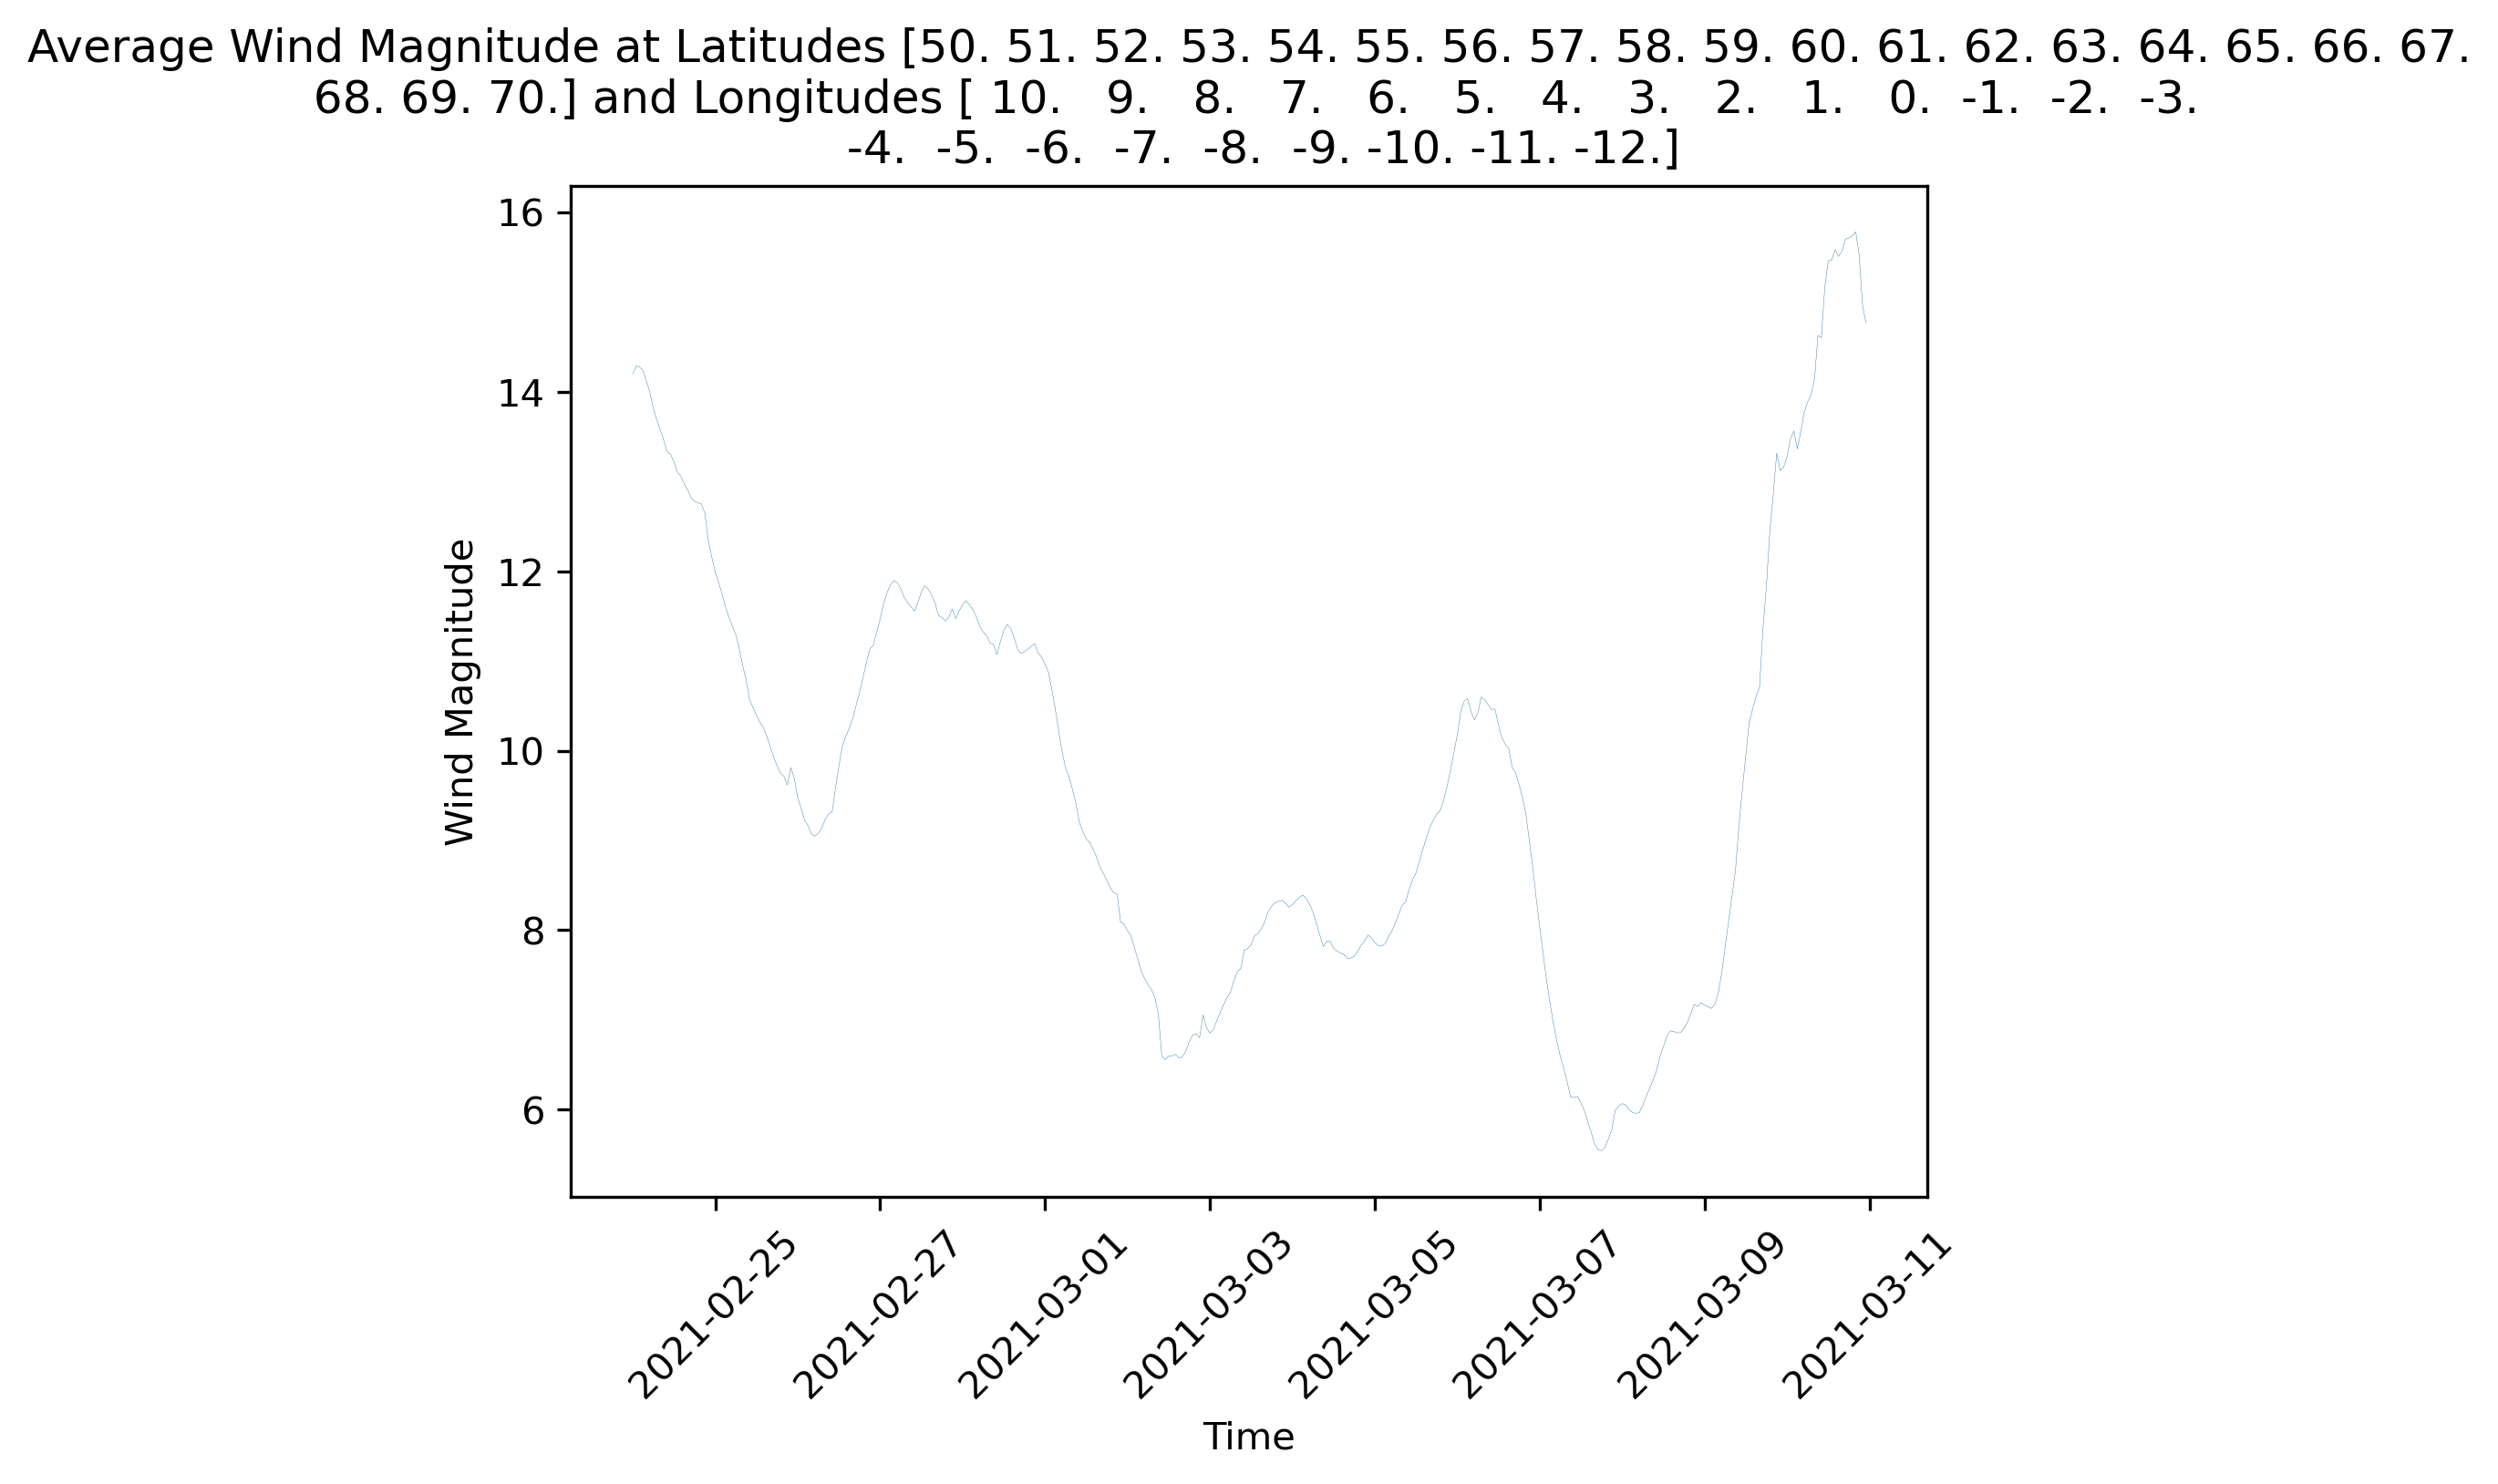

In [26]:
latitudes11 = np.linspace(50,70,21)
longitudes11 =np.linspace(10,-12,23)

# Initialize an empty list to store wind magnitude values
wind_mag_values11 = []

# Loop through the specified latitude and longitude values
for lat11 in latitudes11:
    for lon11 in longitudes11:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values11.append(ds.sel(latitude=lat11, longitude=lon11, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values11 = np.array(wind_mag_values11)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag11 = np.mean(wind_mag_values11, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag11, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes11, longitudes11))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()



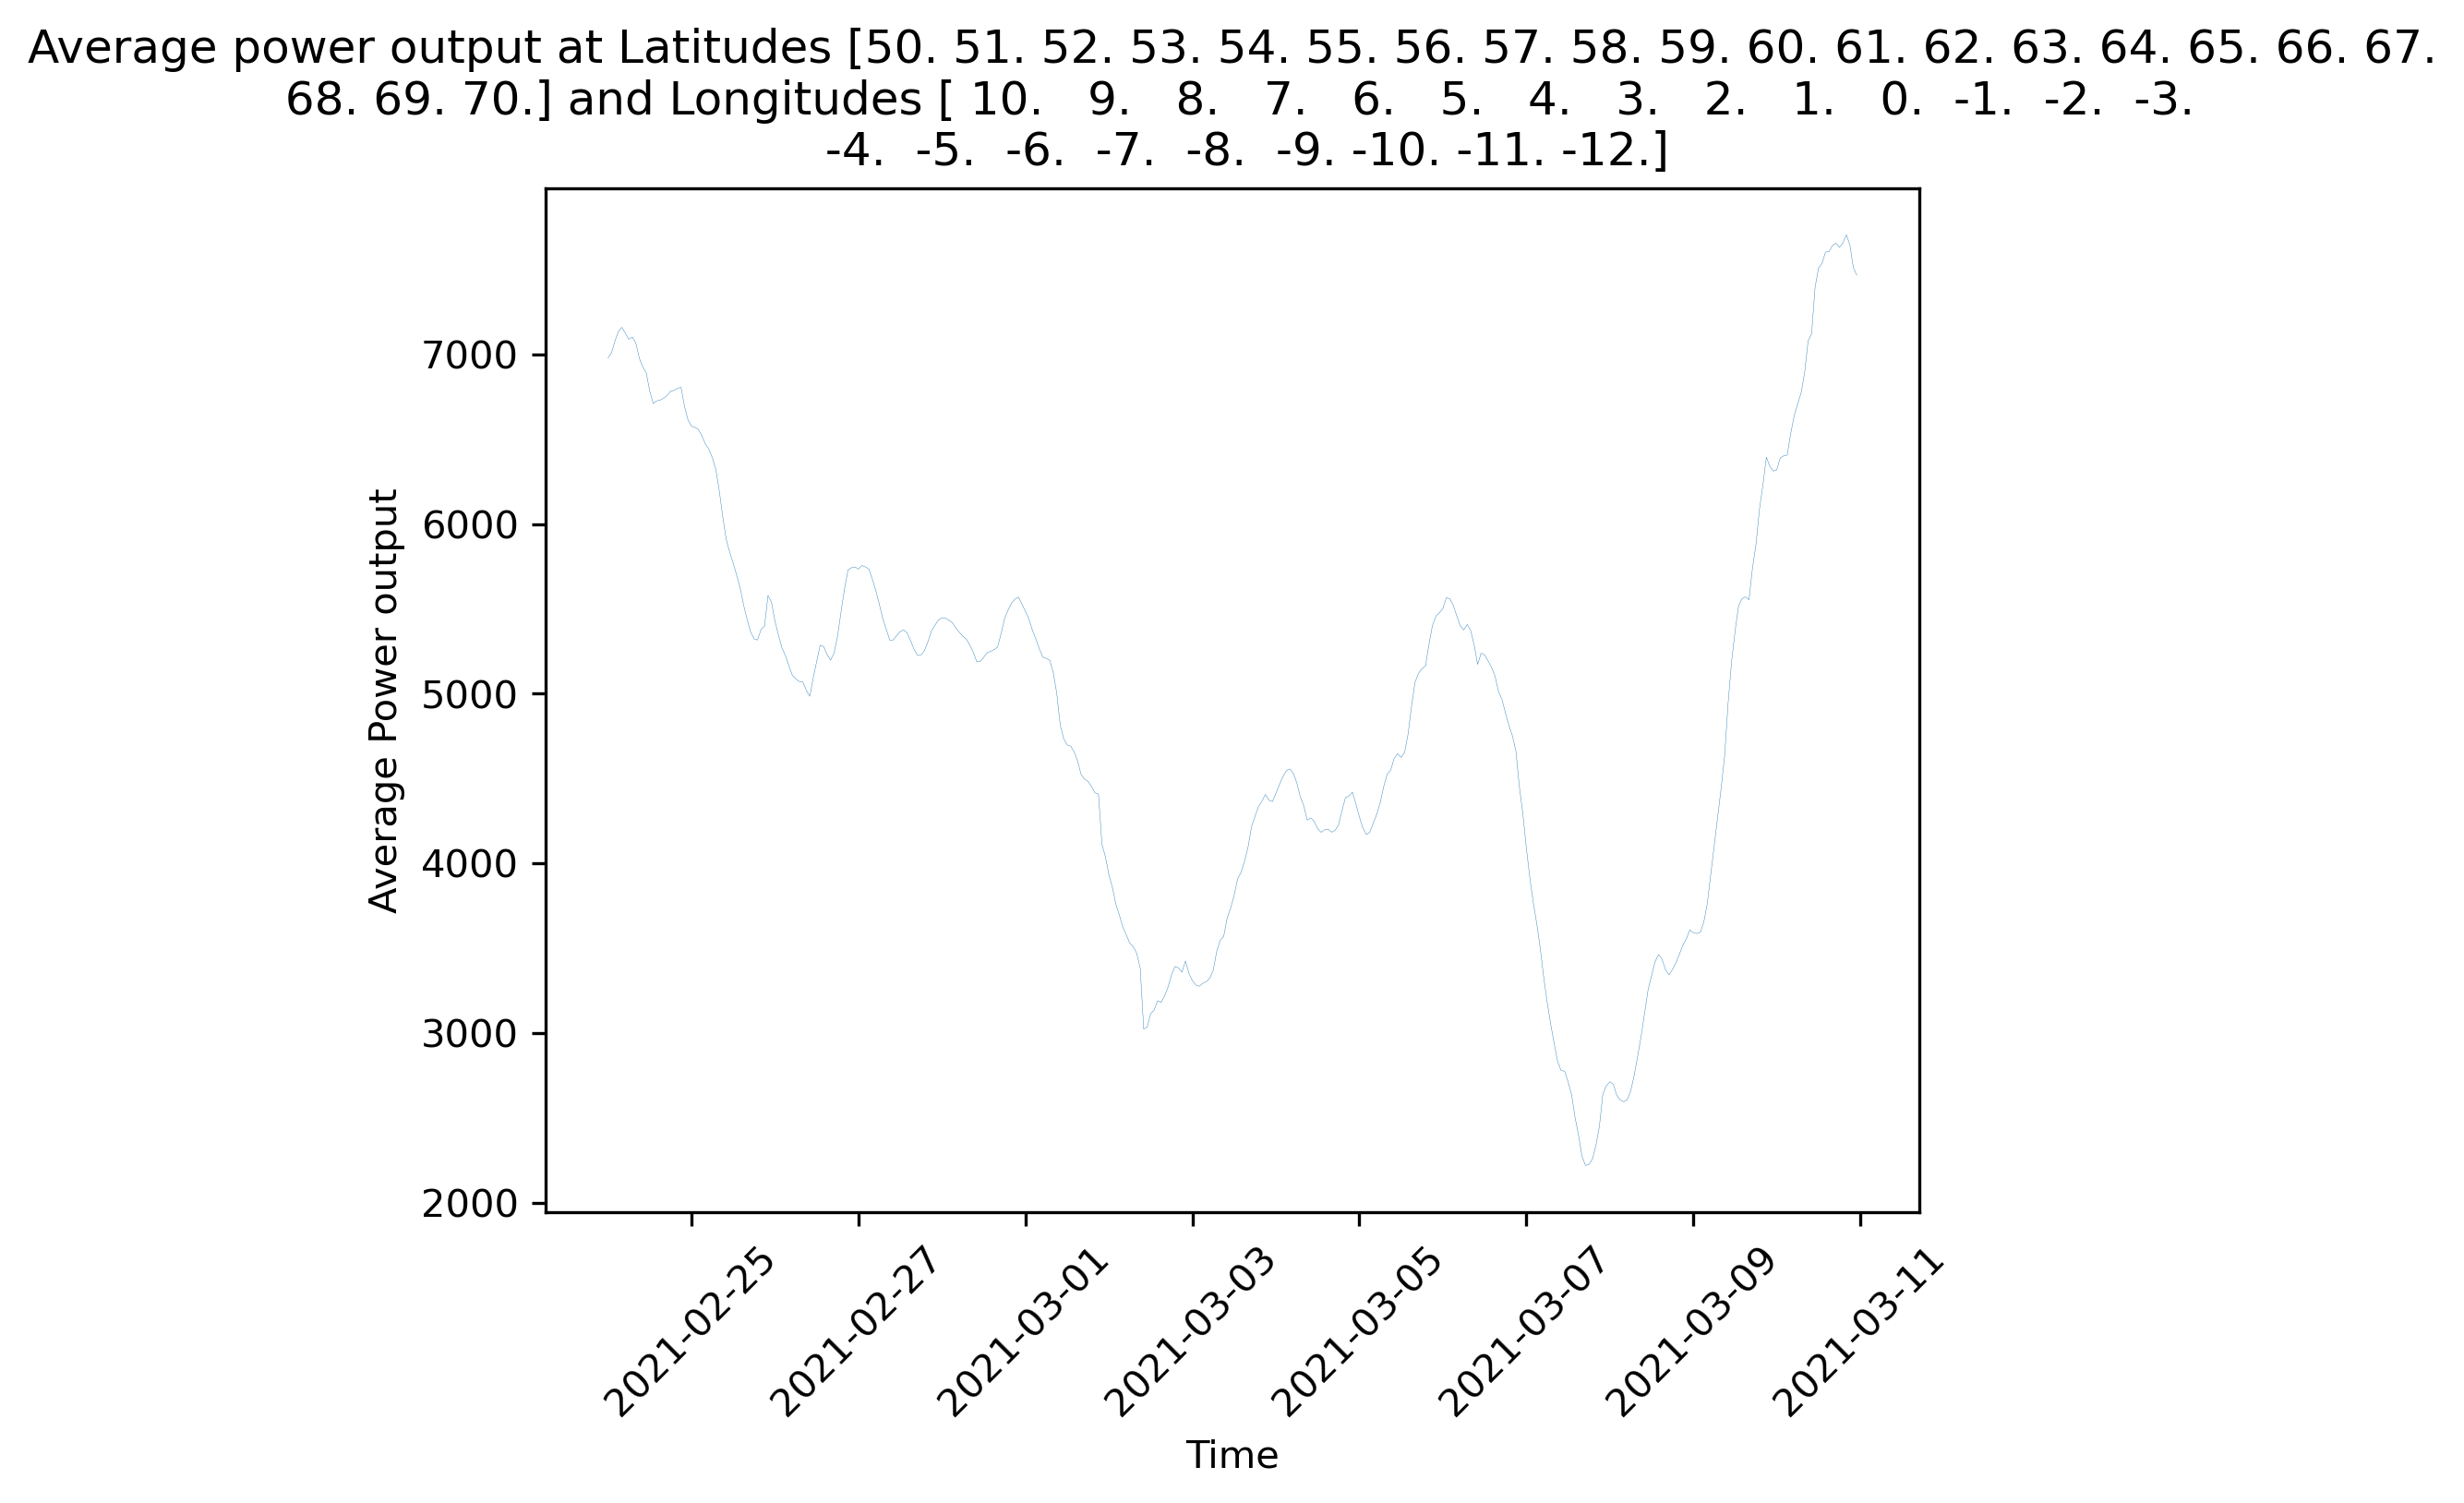

In [27]:
latitudes11 = np.linspace(50,70,21)
longitudes11 =np.linspace(10,-12,23)


# Initialize an empty list to store wind magnitude values
power_values11 = []

# Loop through the specified latitude and longitude values
for lat11 in latitudes11:
    for lon11 in longitudes11:
        # Extract power values for the given latitude, longitude, and time range
        power_values11.append(ds.sel(latitude=lat11, longitude=lon11, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values11 = np.array(power_values11)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag11 = np.mean(power_values11, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag11, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes11, longitudes11))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

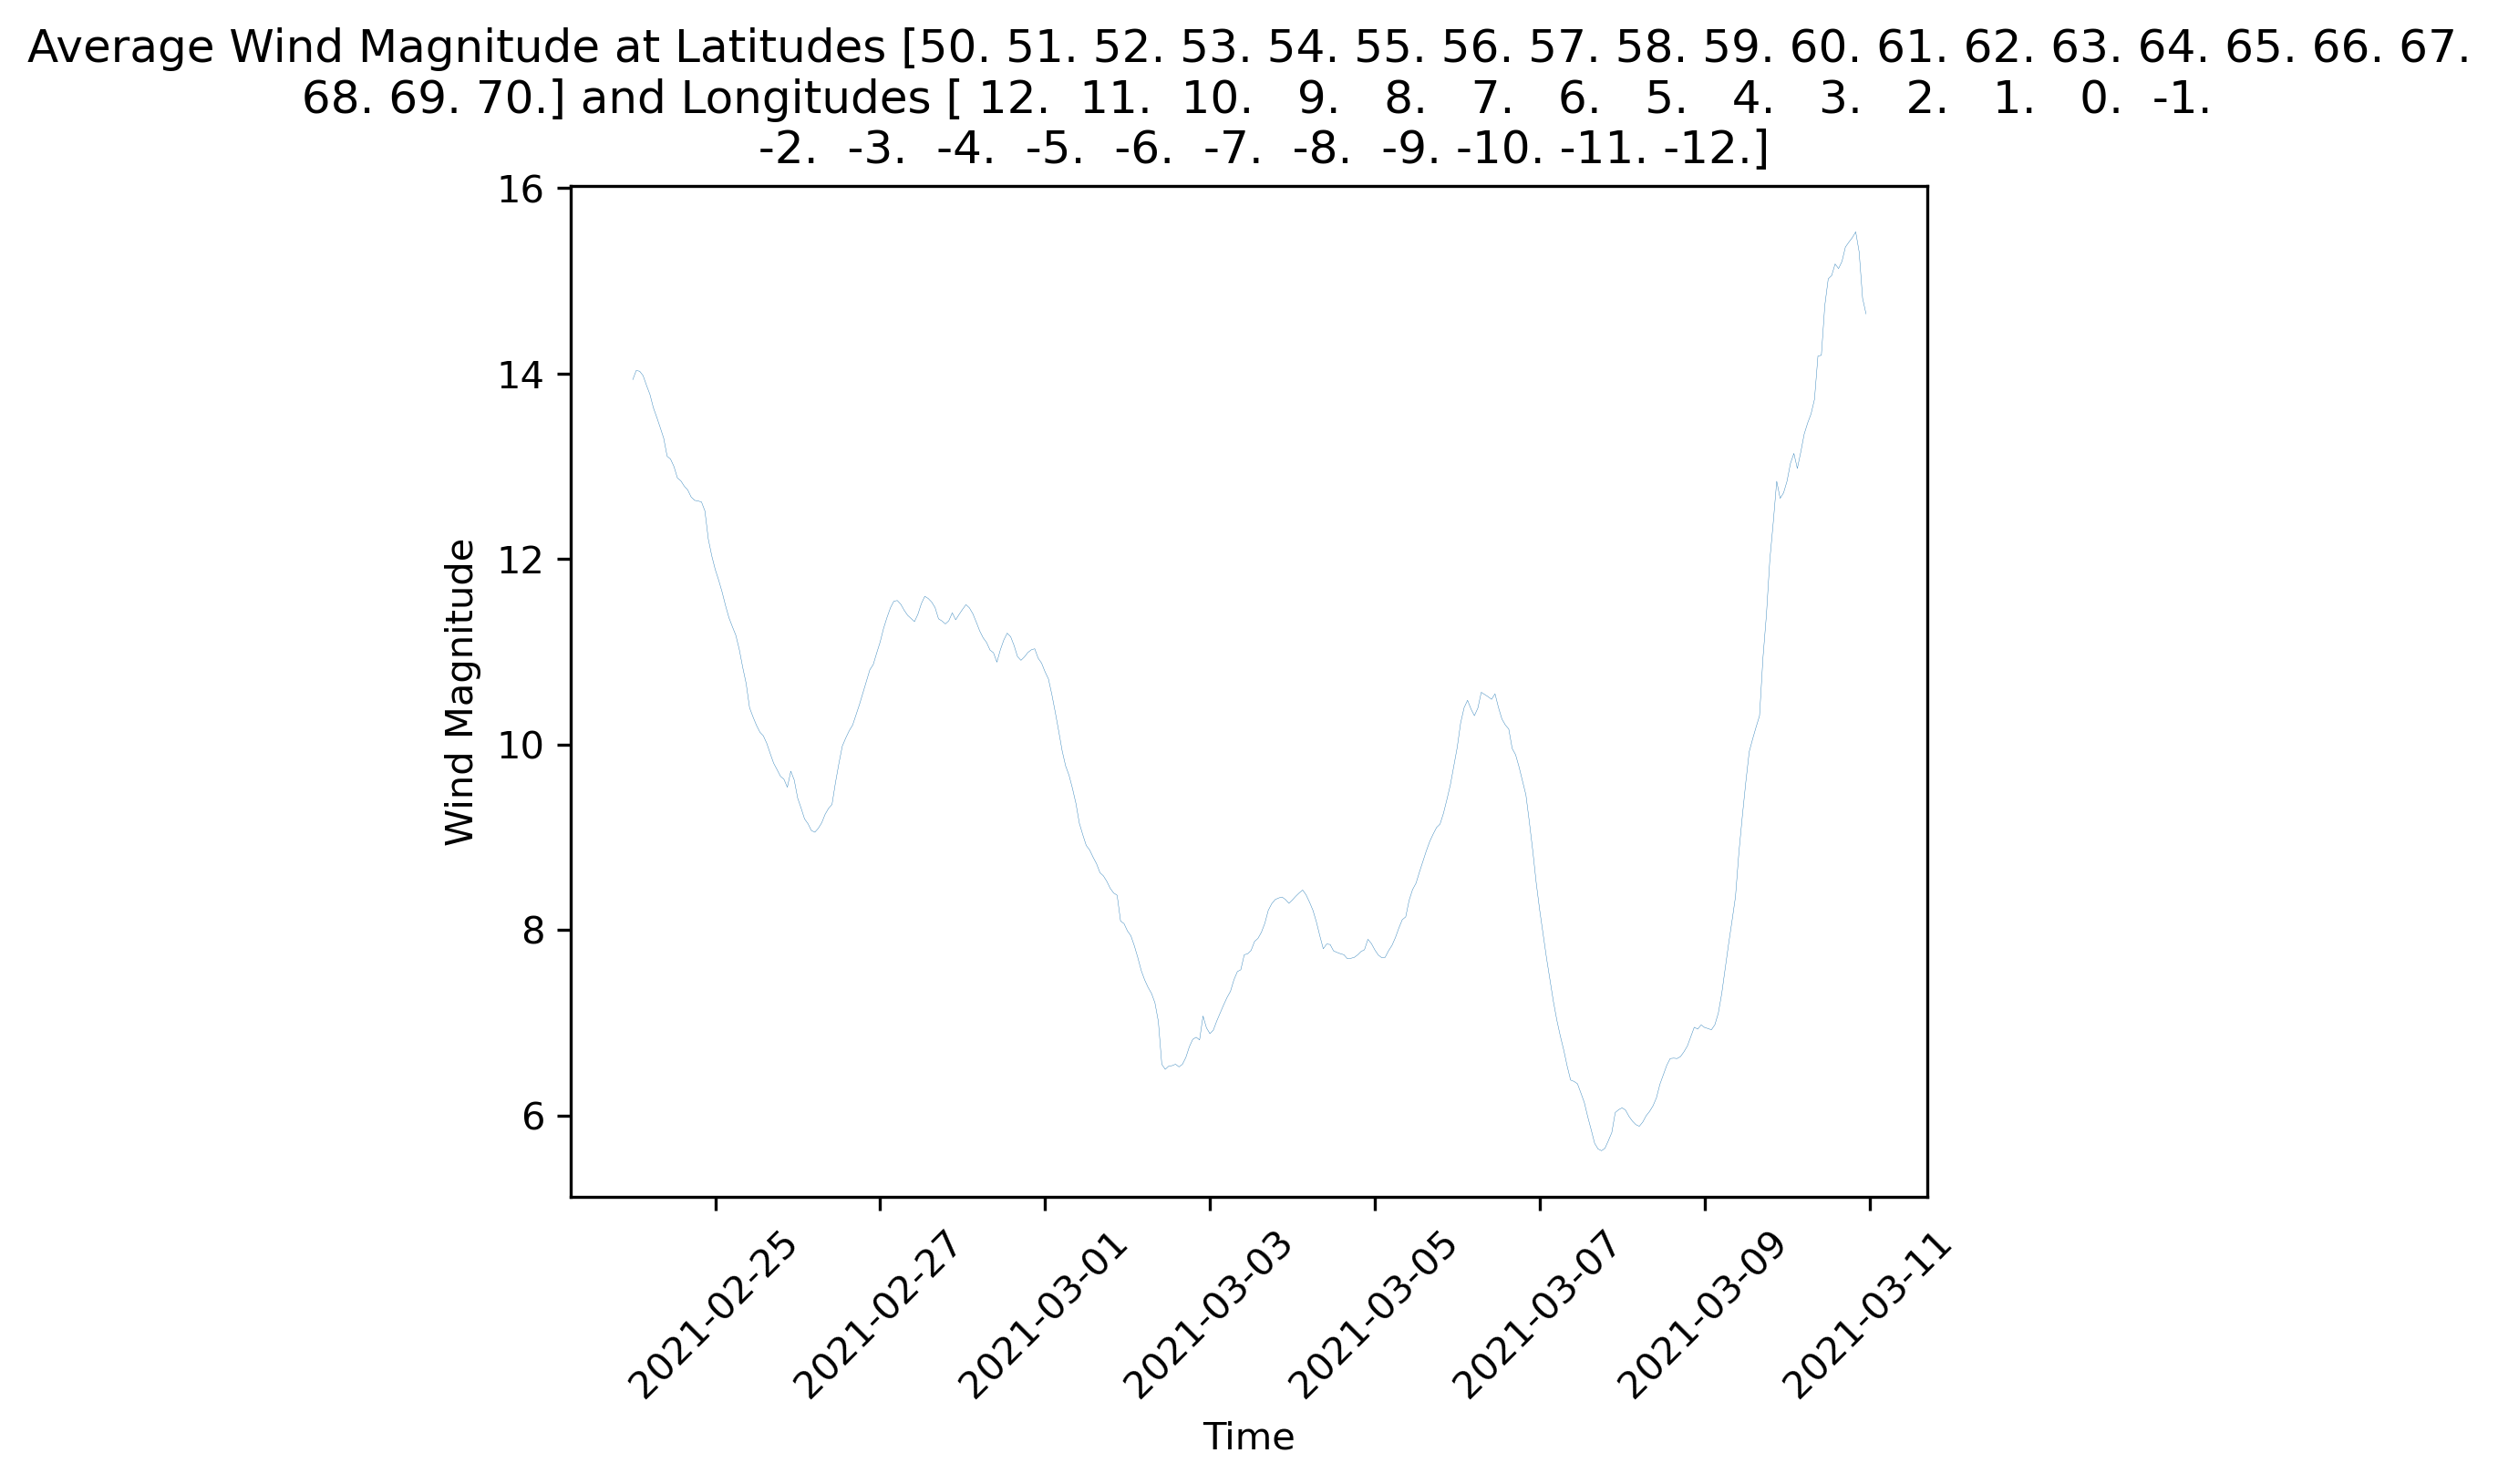

In [28]:
latitudes12= np.linspace(50,70,21)
longitudes12 =np.linspace(12,-12,25)

# Initialize an empty list to store wind magnitude values
wind_mag_values12 = []

# Loop through the specified latitude and longitude values
for lat12 in latitudes12:
    for lon12 in longitudes12:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values12.append(ds.sel(latitude=lat12, longitude=lon12, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values12 = np.array(wind_mag_values12)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag12 = np.mean(wind_mag_values12, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag12, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes12, longitudes12))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()

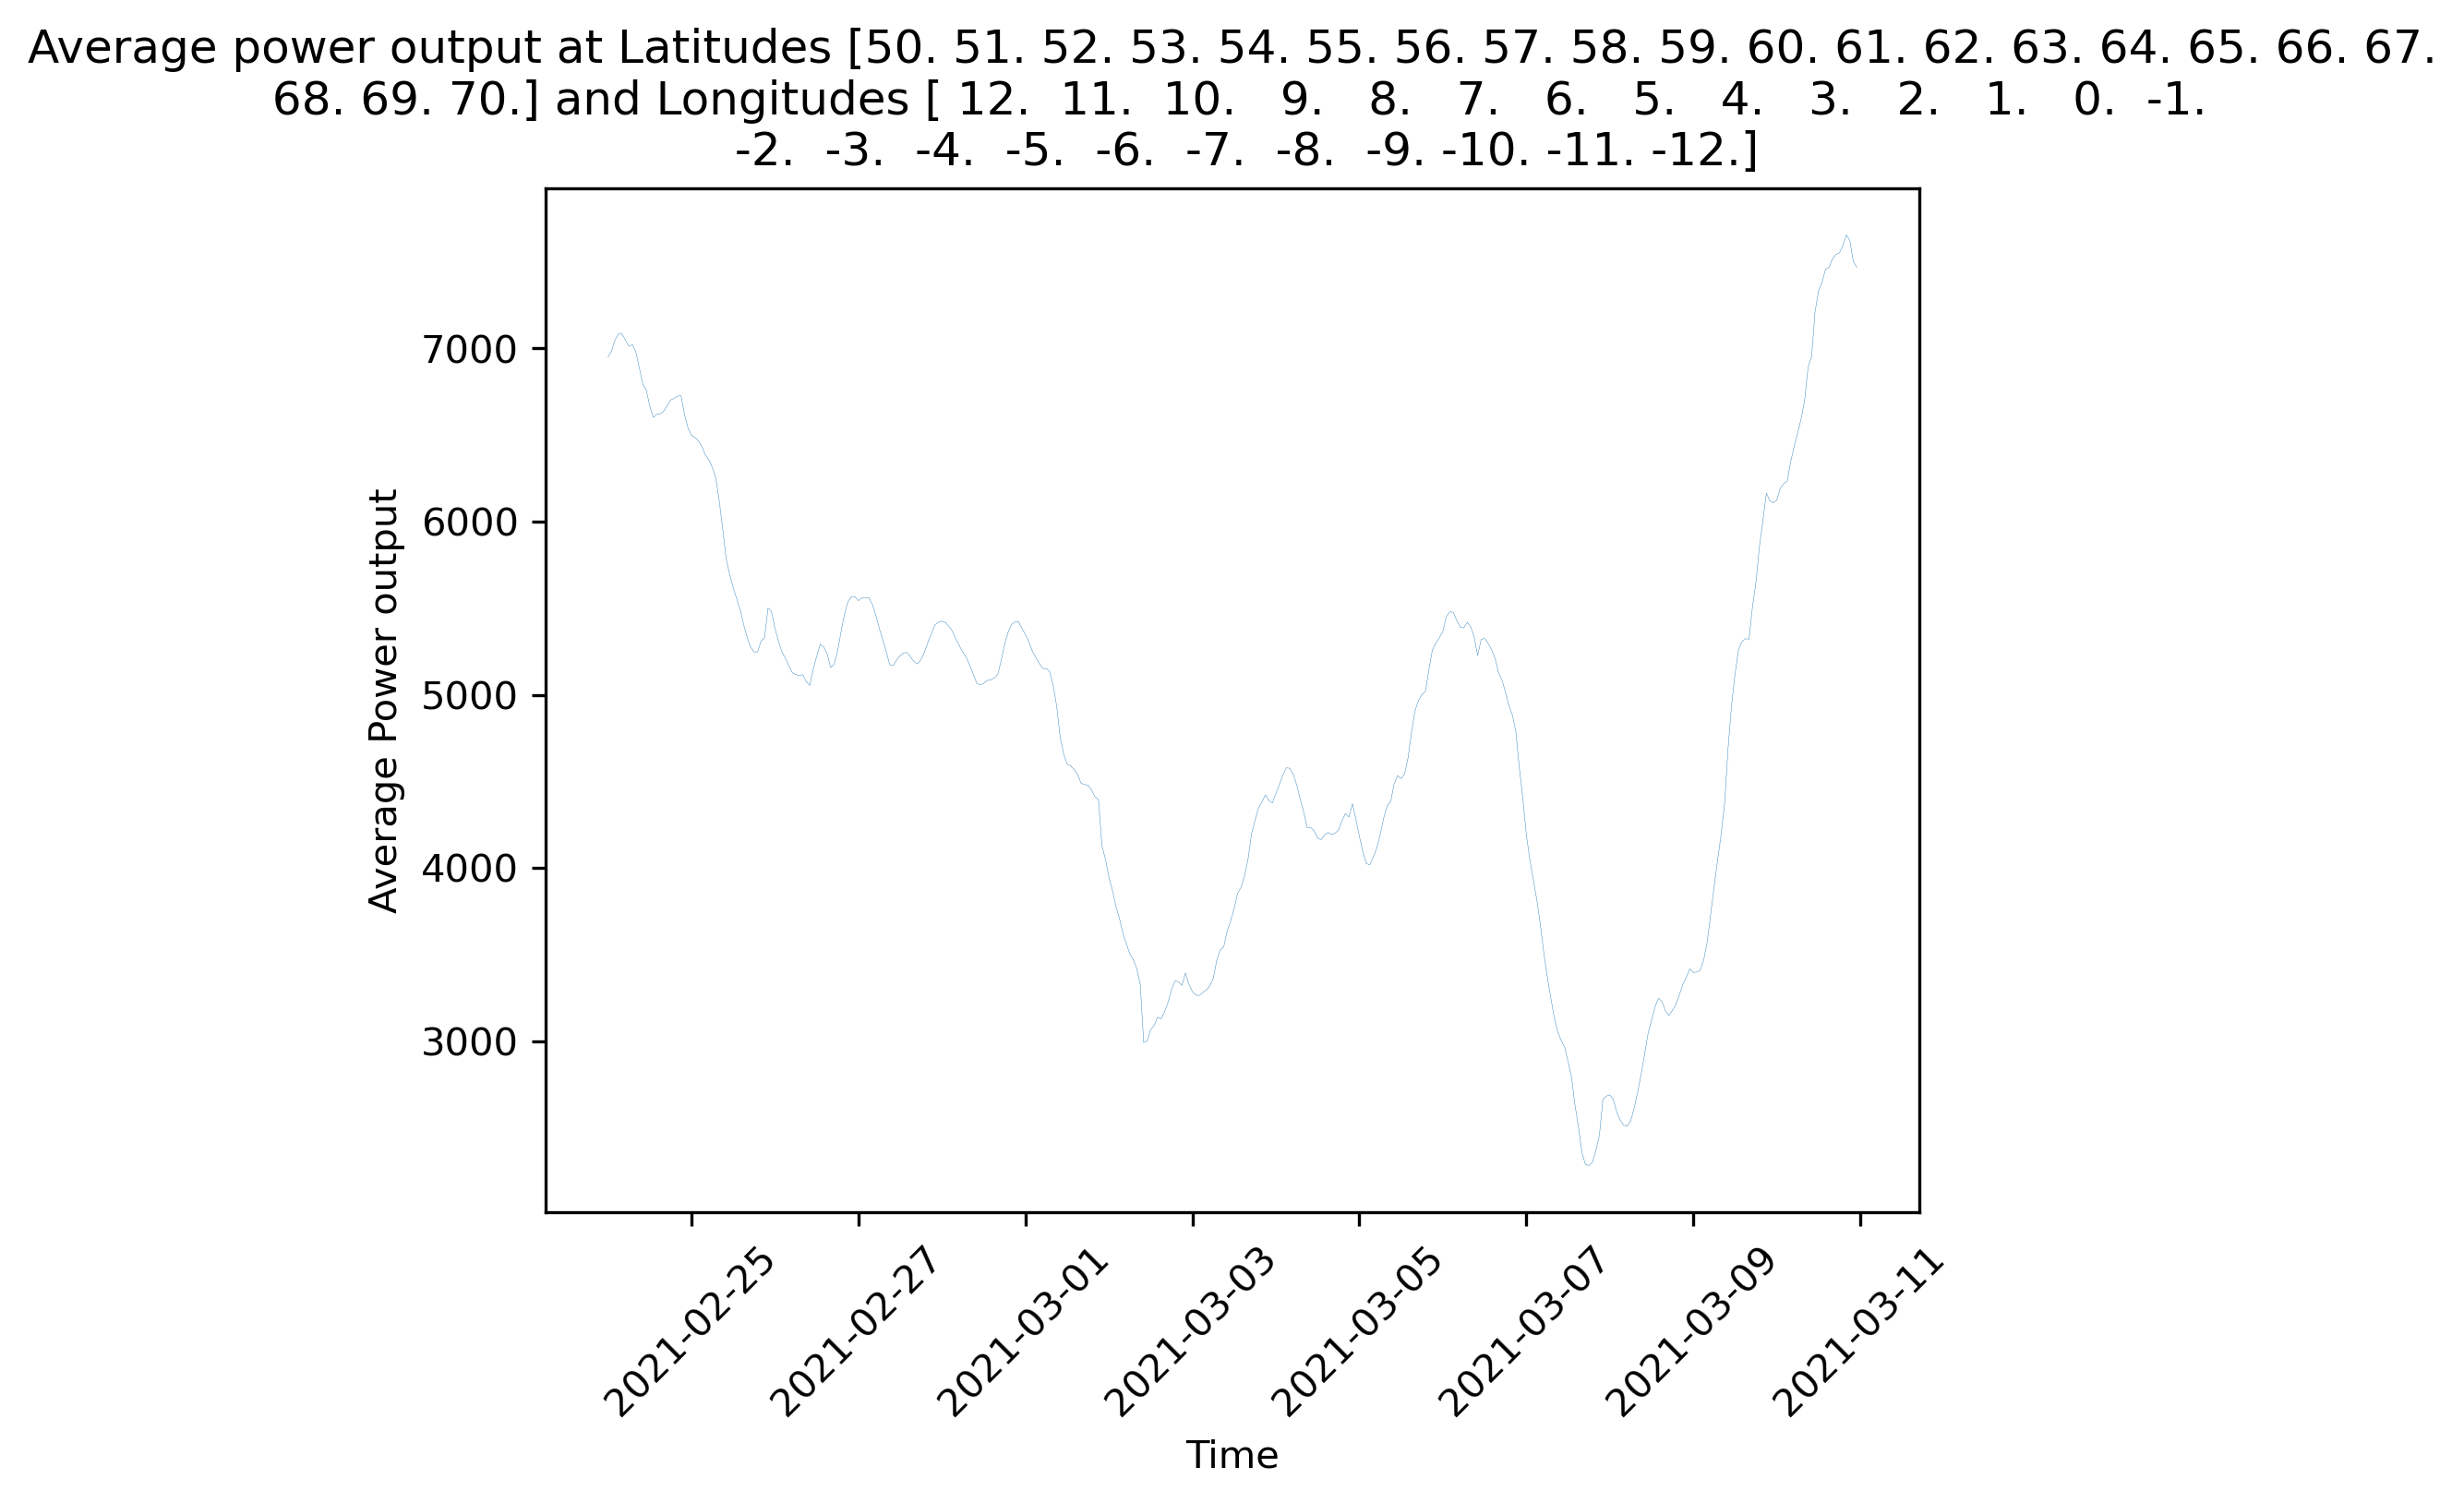

In [29]:
# Initialize an empty list to store wind magnitude values
power_values12 = []

# Loop through the specified latitude and longitude values
for lat12 in latitudes12:
    for lon12 in longitudes12:
        # Extract power values for the given latitude, longitude, and time range
        power_values12.append(ds.sel(latitude=lat12, longitude=lon12, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values12 = np.array(power_values12)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag12 = np.mean(power_values12, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag12, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes12, longitudes12))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

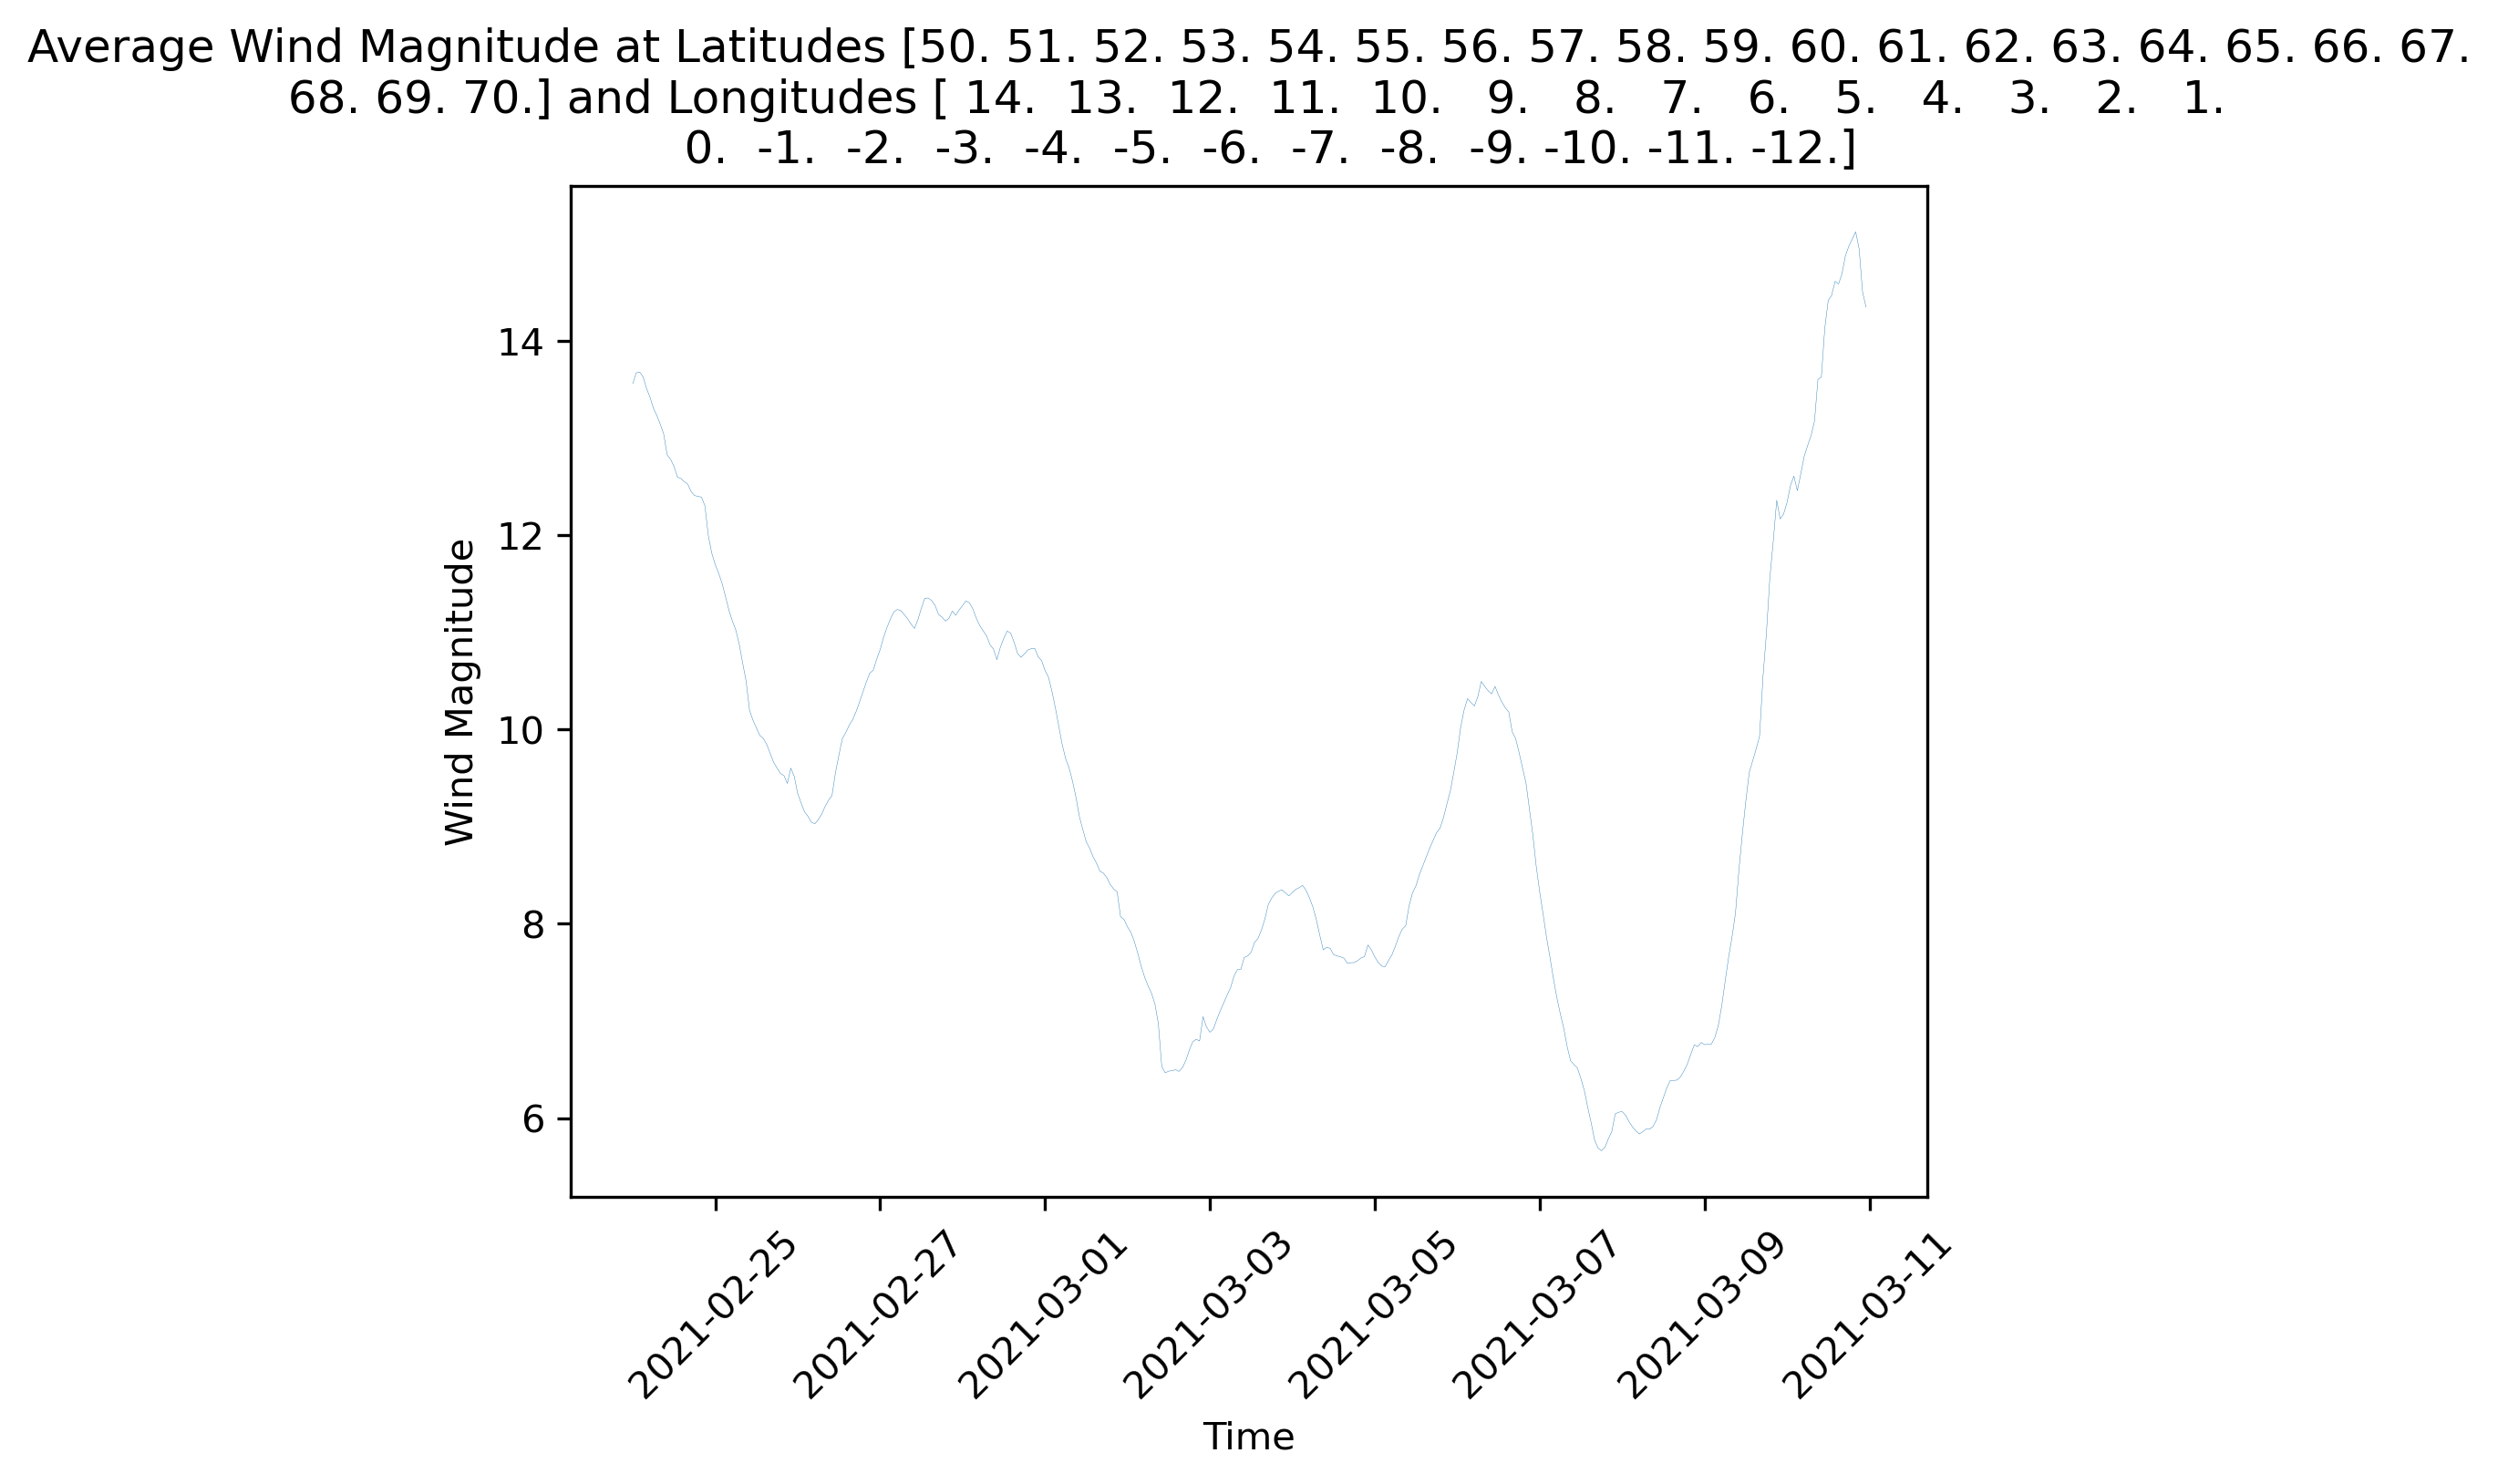

In [30]:
latitudes13= np.linspace(50,70,21)
longitudes13 =np.linspace(14,-12,27)

# Initialize an empty list to store wind magnitude values
wind_mag_values13 = []

# Loop through the specified latitude and longitude values
for lat13 in latitudes13:
    for lon13 in longitudes13:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values13.append(ds.sel(latitude=lat13, longitude=lon13, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values13 = np.array(wind_mag_values13)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag13 = np.mean(wind_mag_values13, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag13, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes13, longitudes13))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()

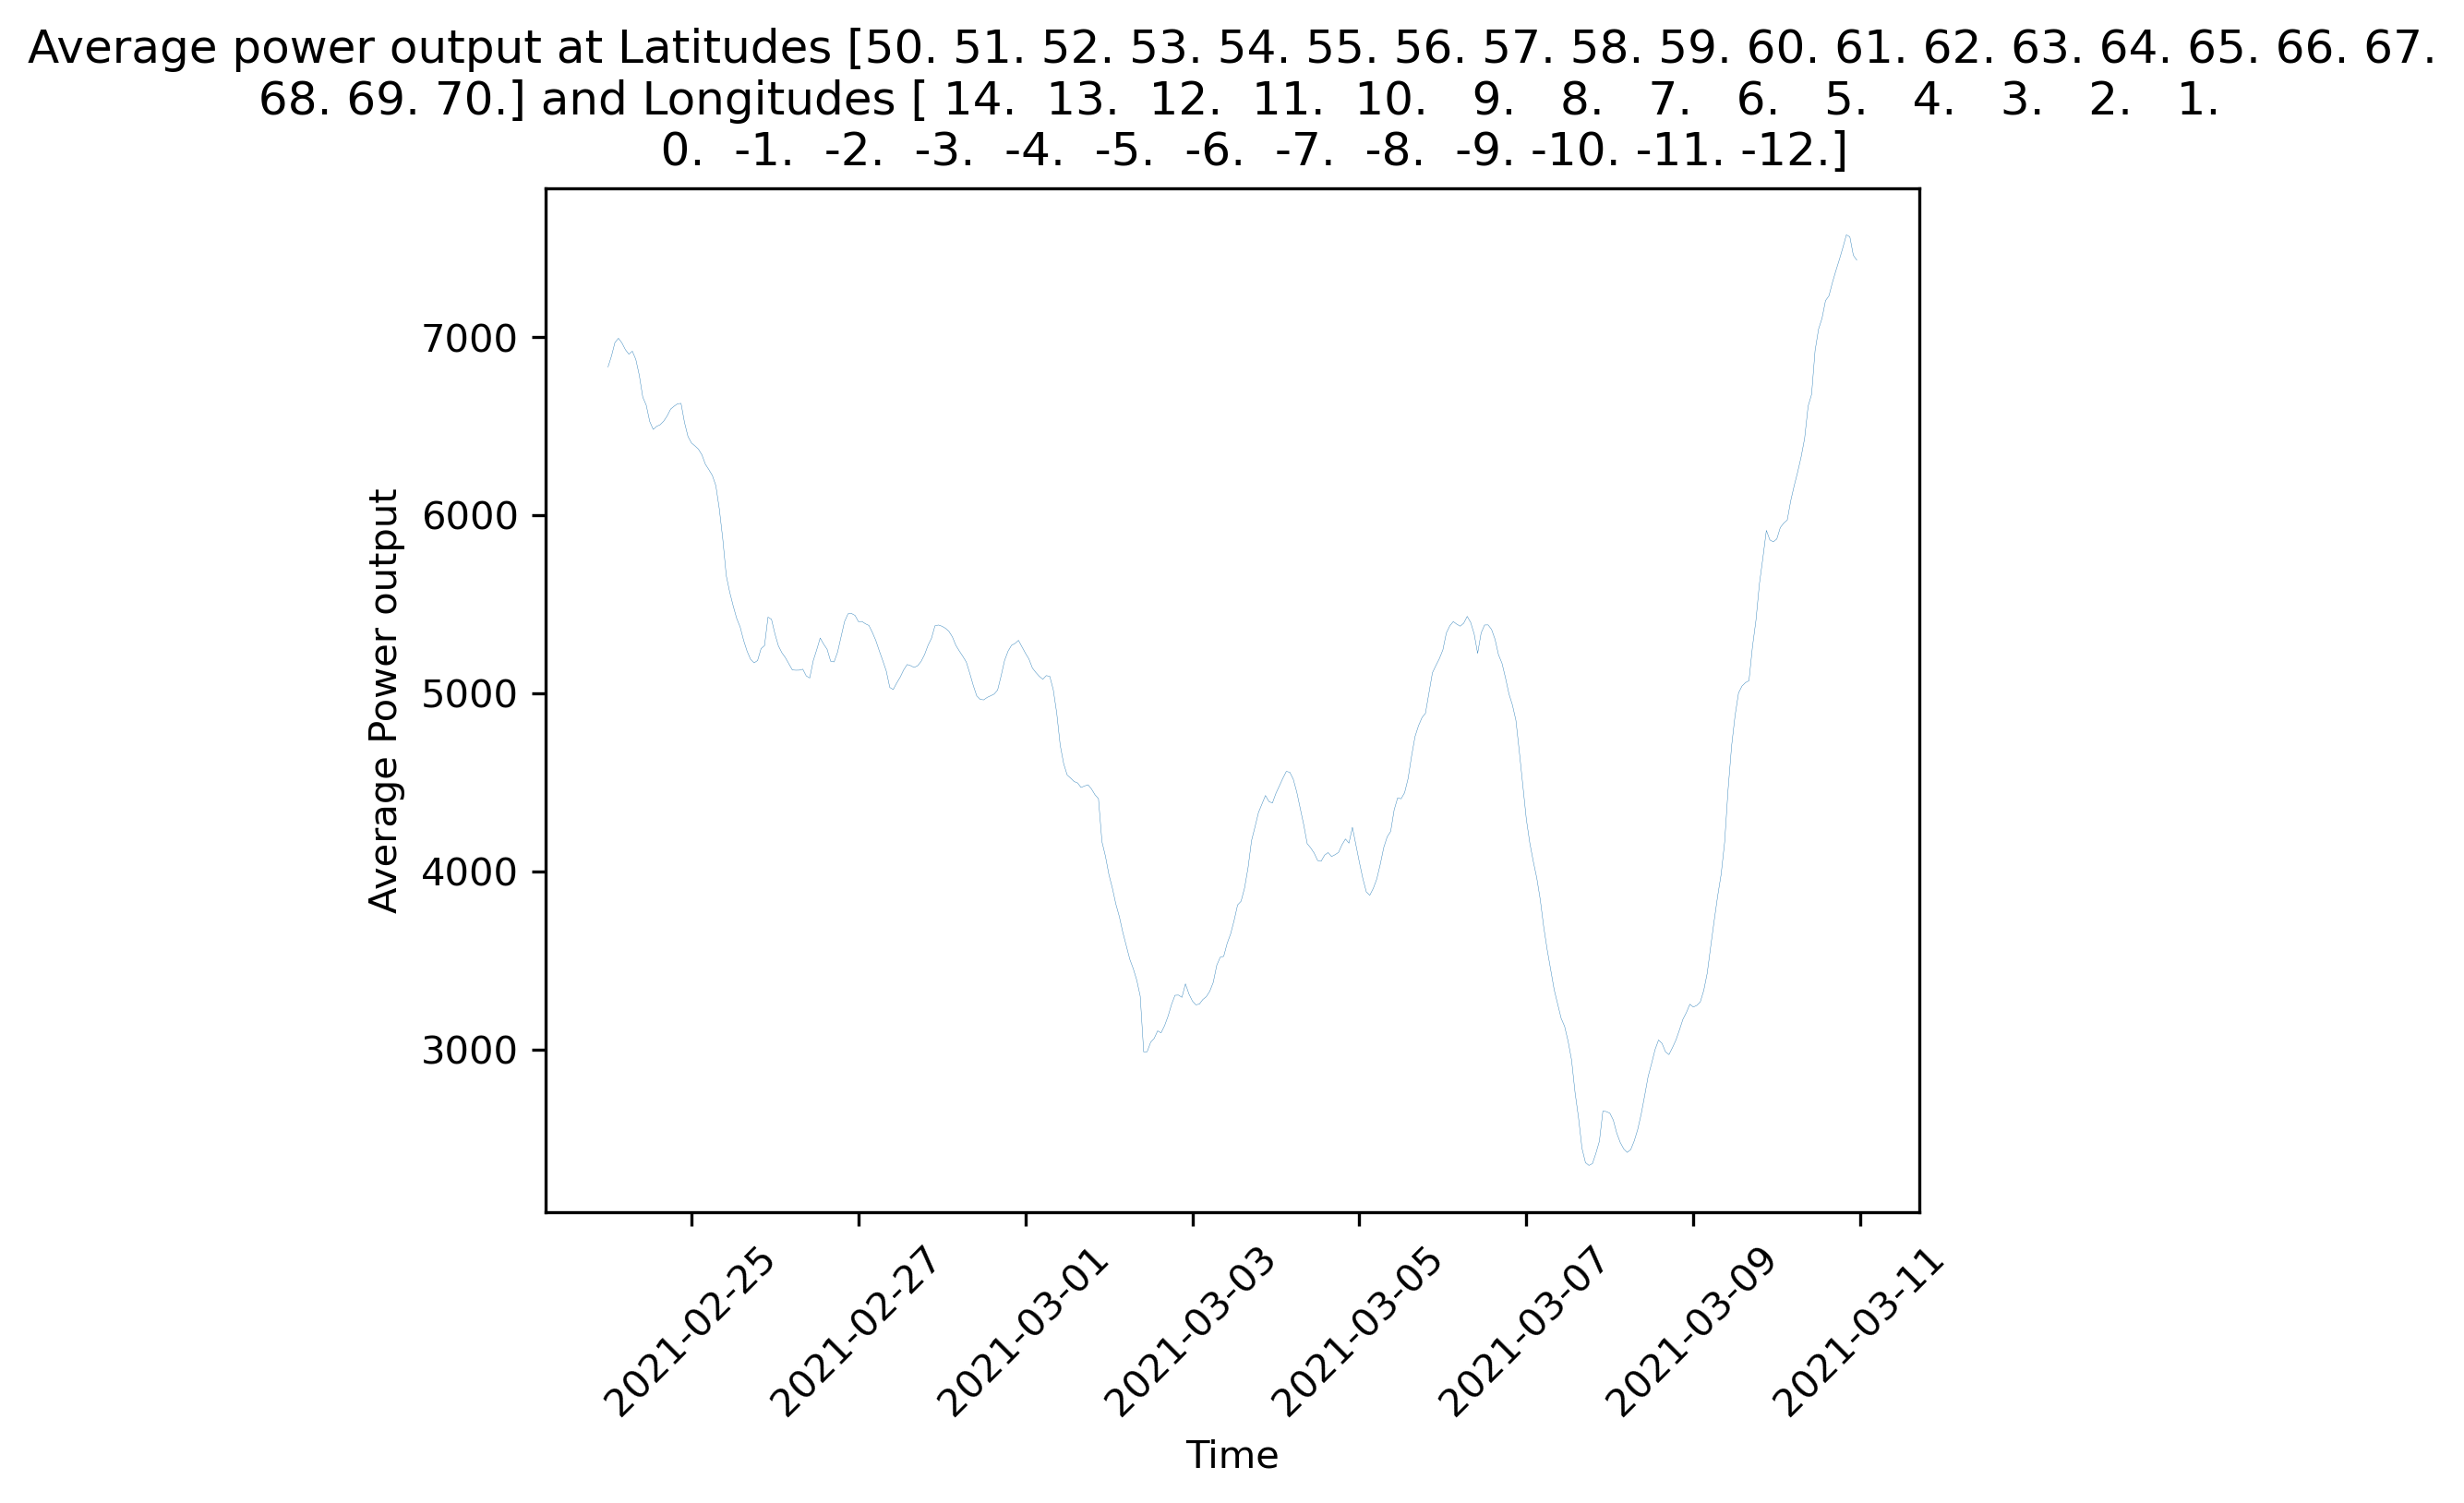

In [31]:
# Initialize an empty list to store wind magnitude values
power_values13 = []

# Loop through the specified latitude and longitude values
for lat13 in latitudes13:
    for lon13 in longitudes13:
        # Extract power values for the given latitude, longitude, and time range
        power_values13.append(ds.sel(latitude=lat13, longitude=lon13, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values13 = np.array(power_values13)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag13 = np.mean(power_values13, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag13, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes13, longitudes13))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

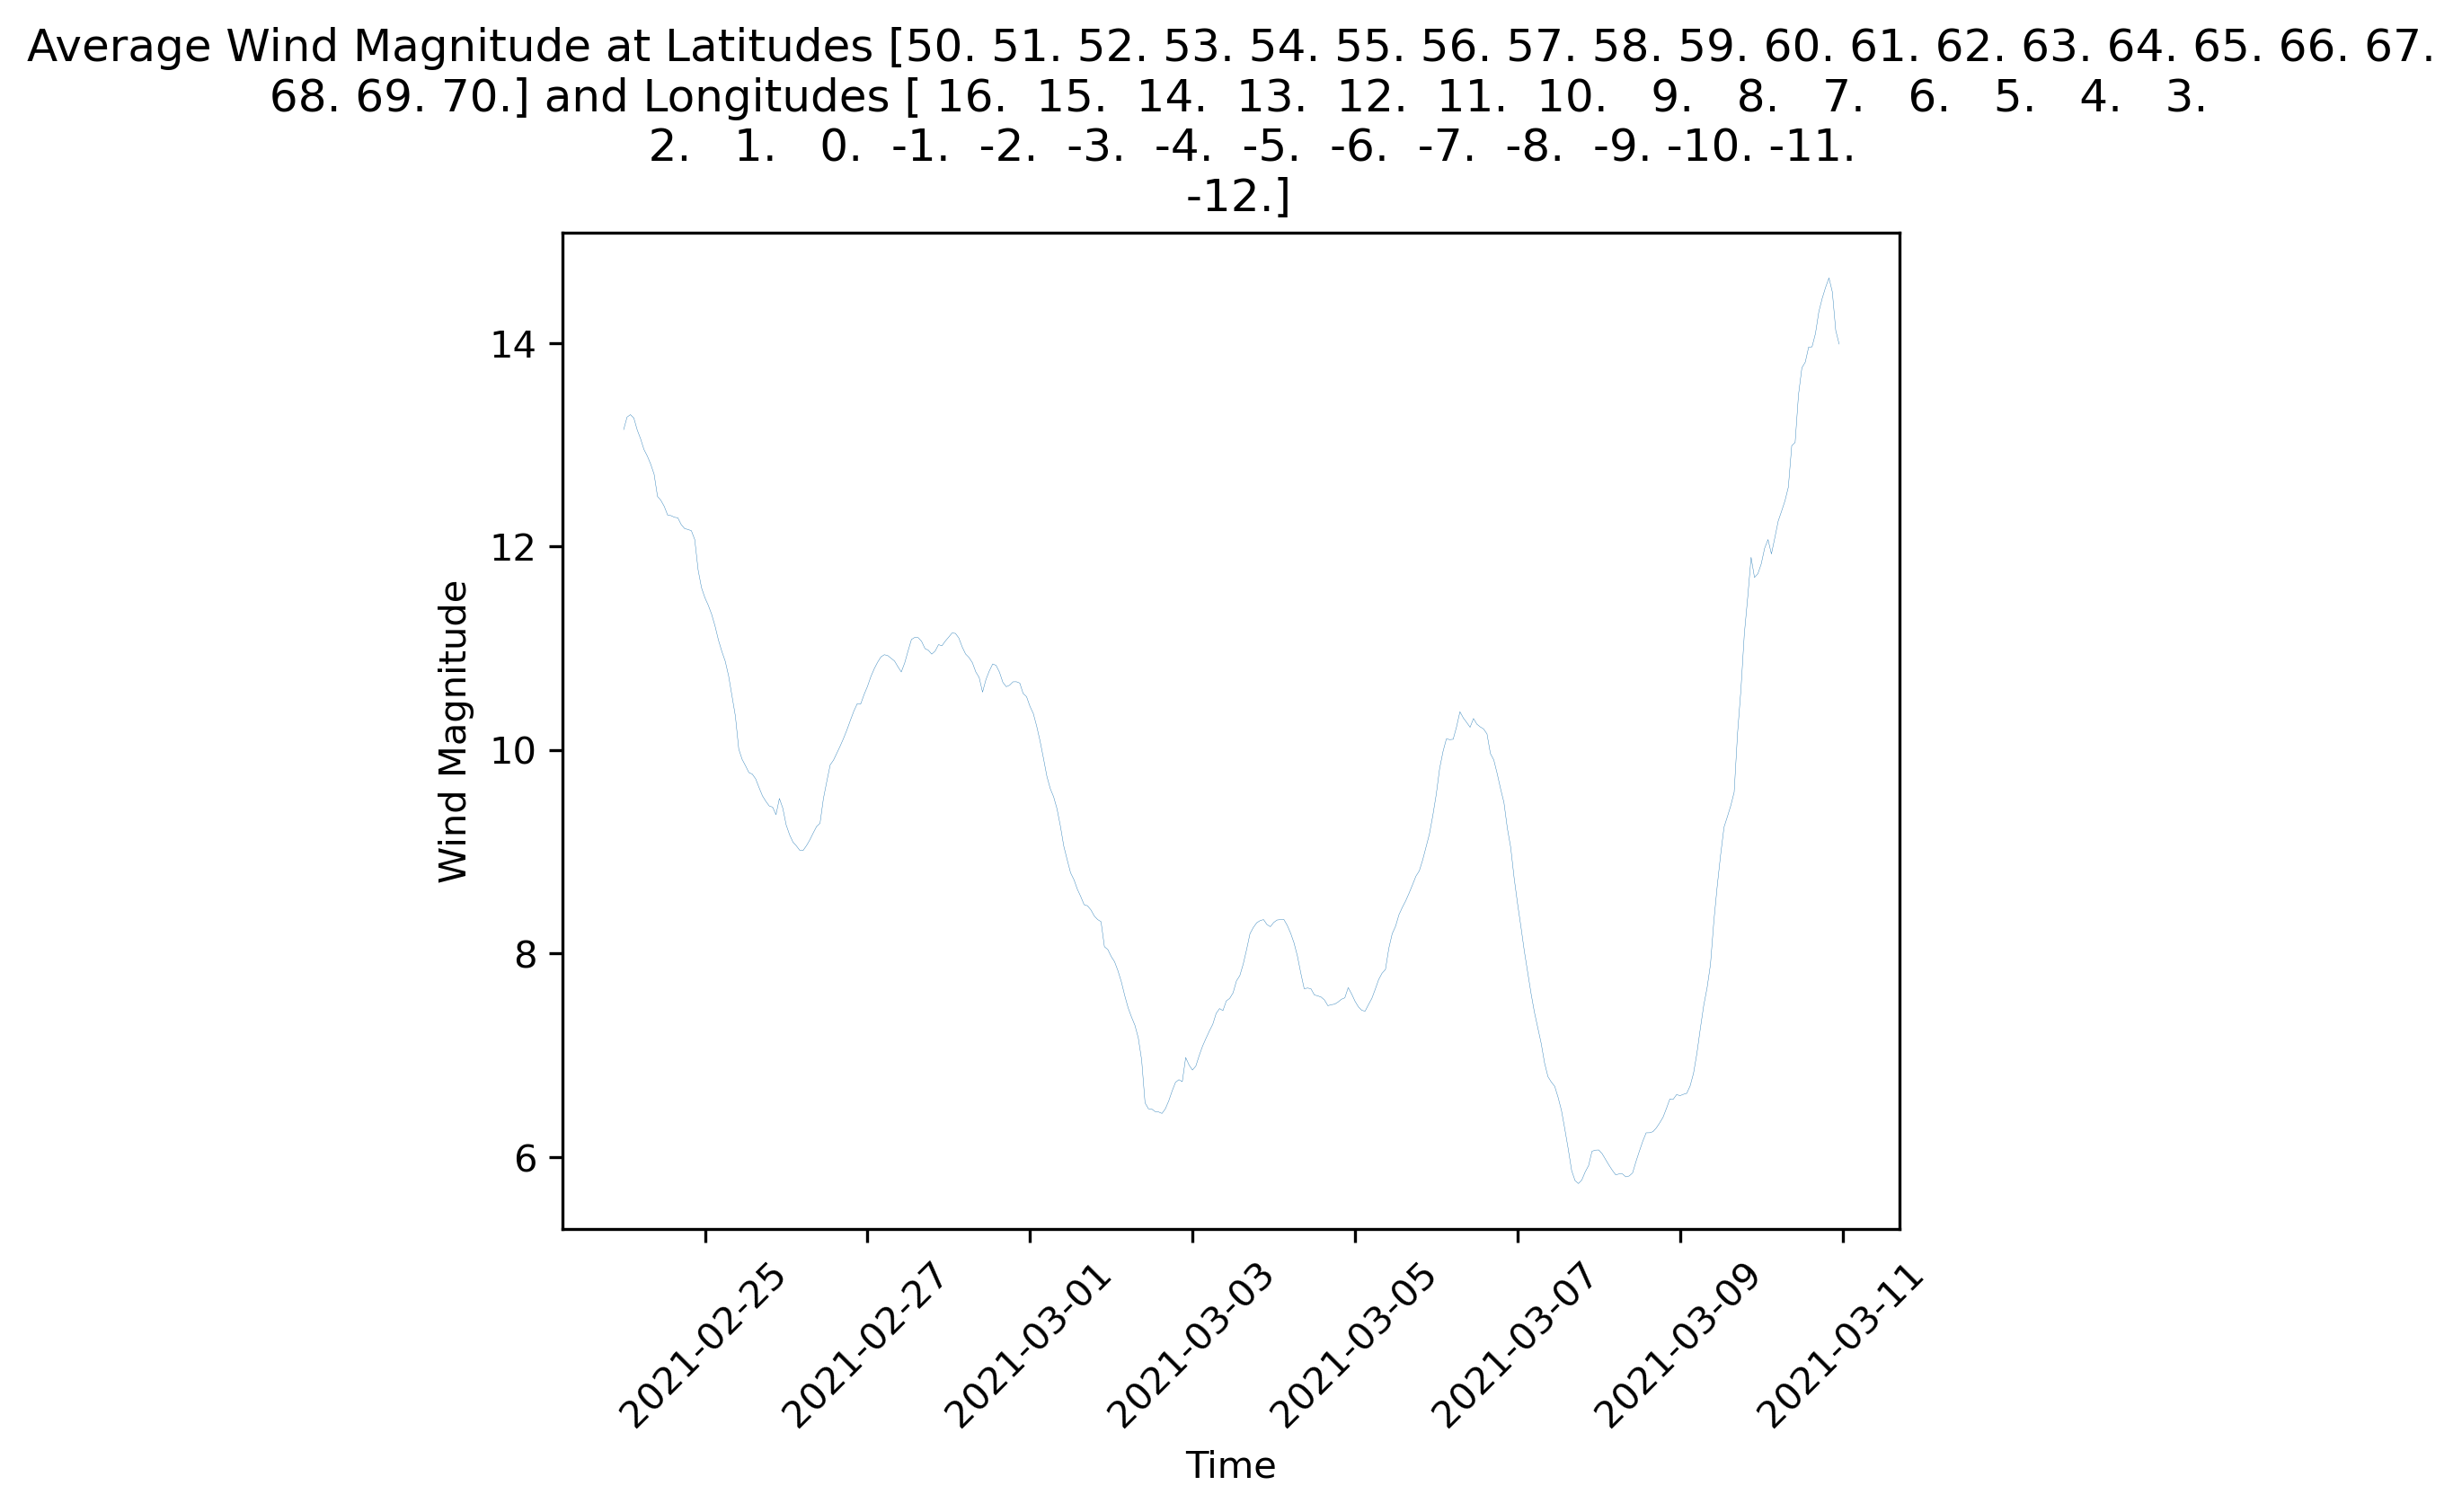

In [32]:
latitudes14= np.linspace(50,70,21)
longitudes14 =np.linspace(16,-12,29)

# Initialize an empty list to store wind magnitude values
wind_mag_values14 = []

# Loop through the specified latitude and longitude values
for lat14 in latitudes14:
    for lon14 in longitudes14:
        # Extract wind magnitude values for the given latitude, longitude, and time range
        wind_mag_values14.append(ds.sel(latitude=lat14, longitude=lon14, time=slice('2021-02-24', '2021-03-10'))['wind_mag'].values)

# Convert the list to a NumPy array for easier manipulation
wind_mag_values14 = np.array(wind_mag_values14)

# Calculate the average of the wind magnitude values along the specified axis (0 for averaging along the time axis)
average_wind_mag14 = np.mean(wind_mag_values14, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, average_wind_mag14, linewidth=0.1)
plt.title('Average Wind Magnitude at Latitudes {} and Longitudes {}'.format(latitudes14, longitudes14))
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()

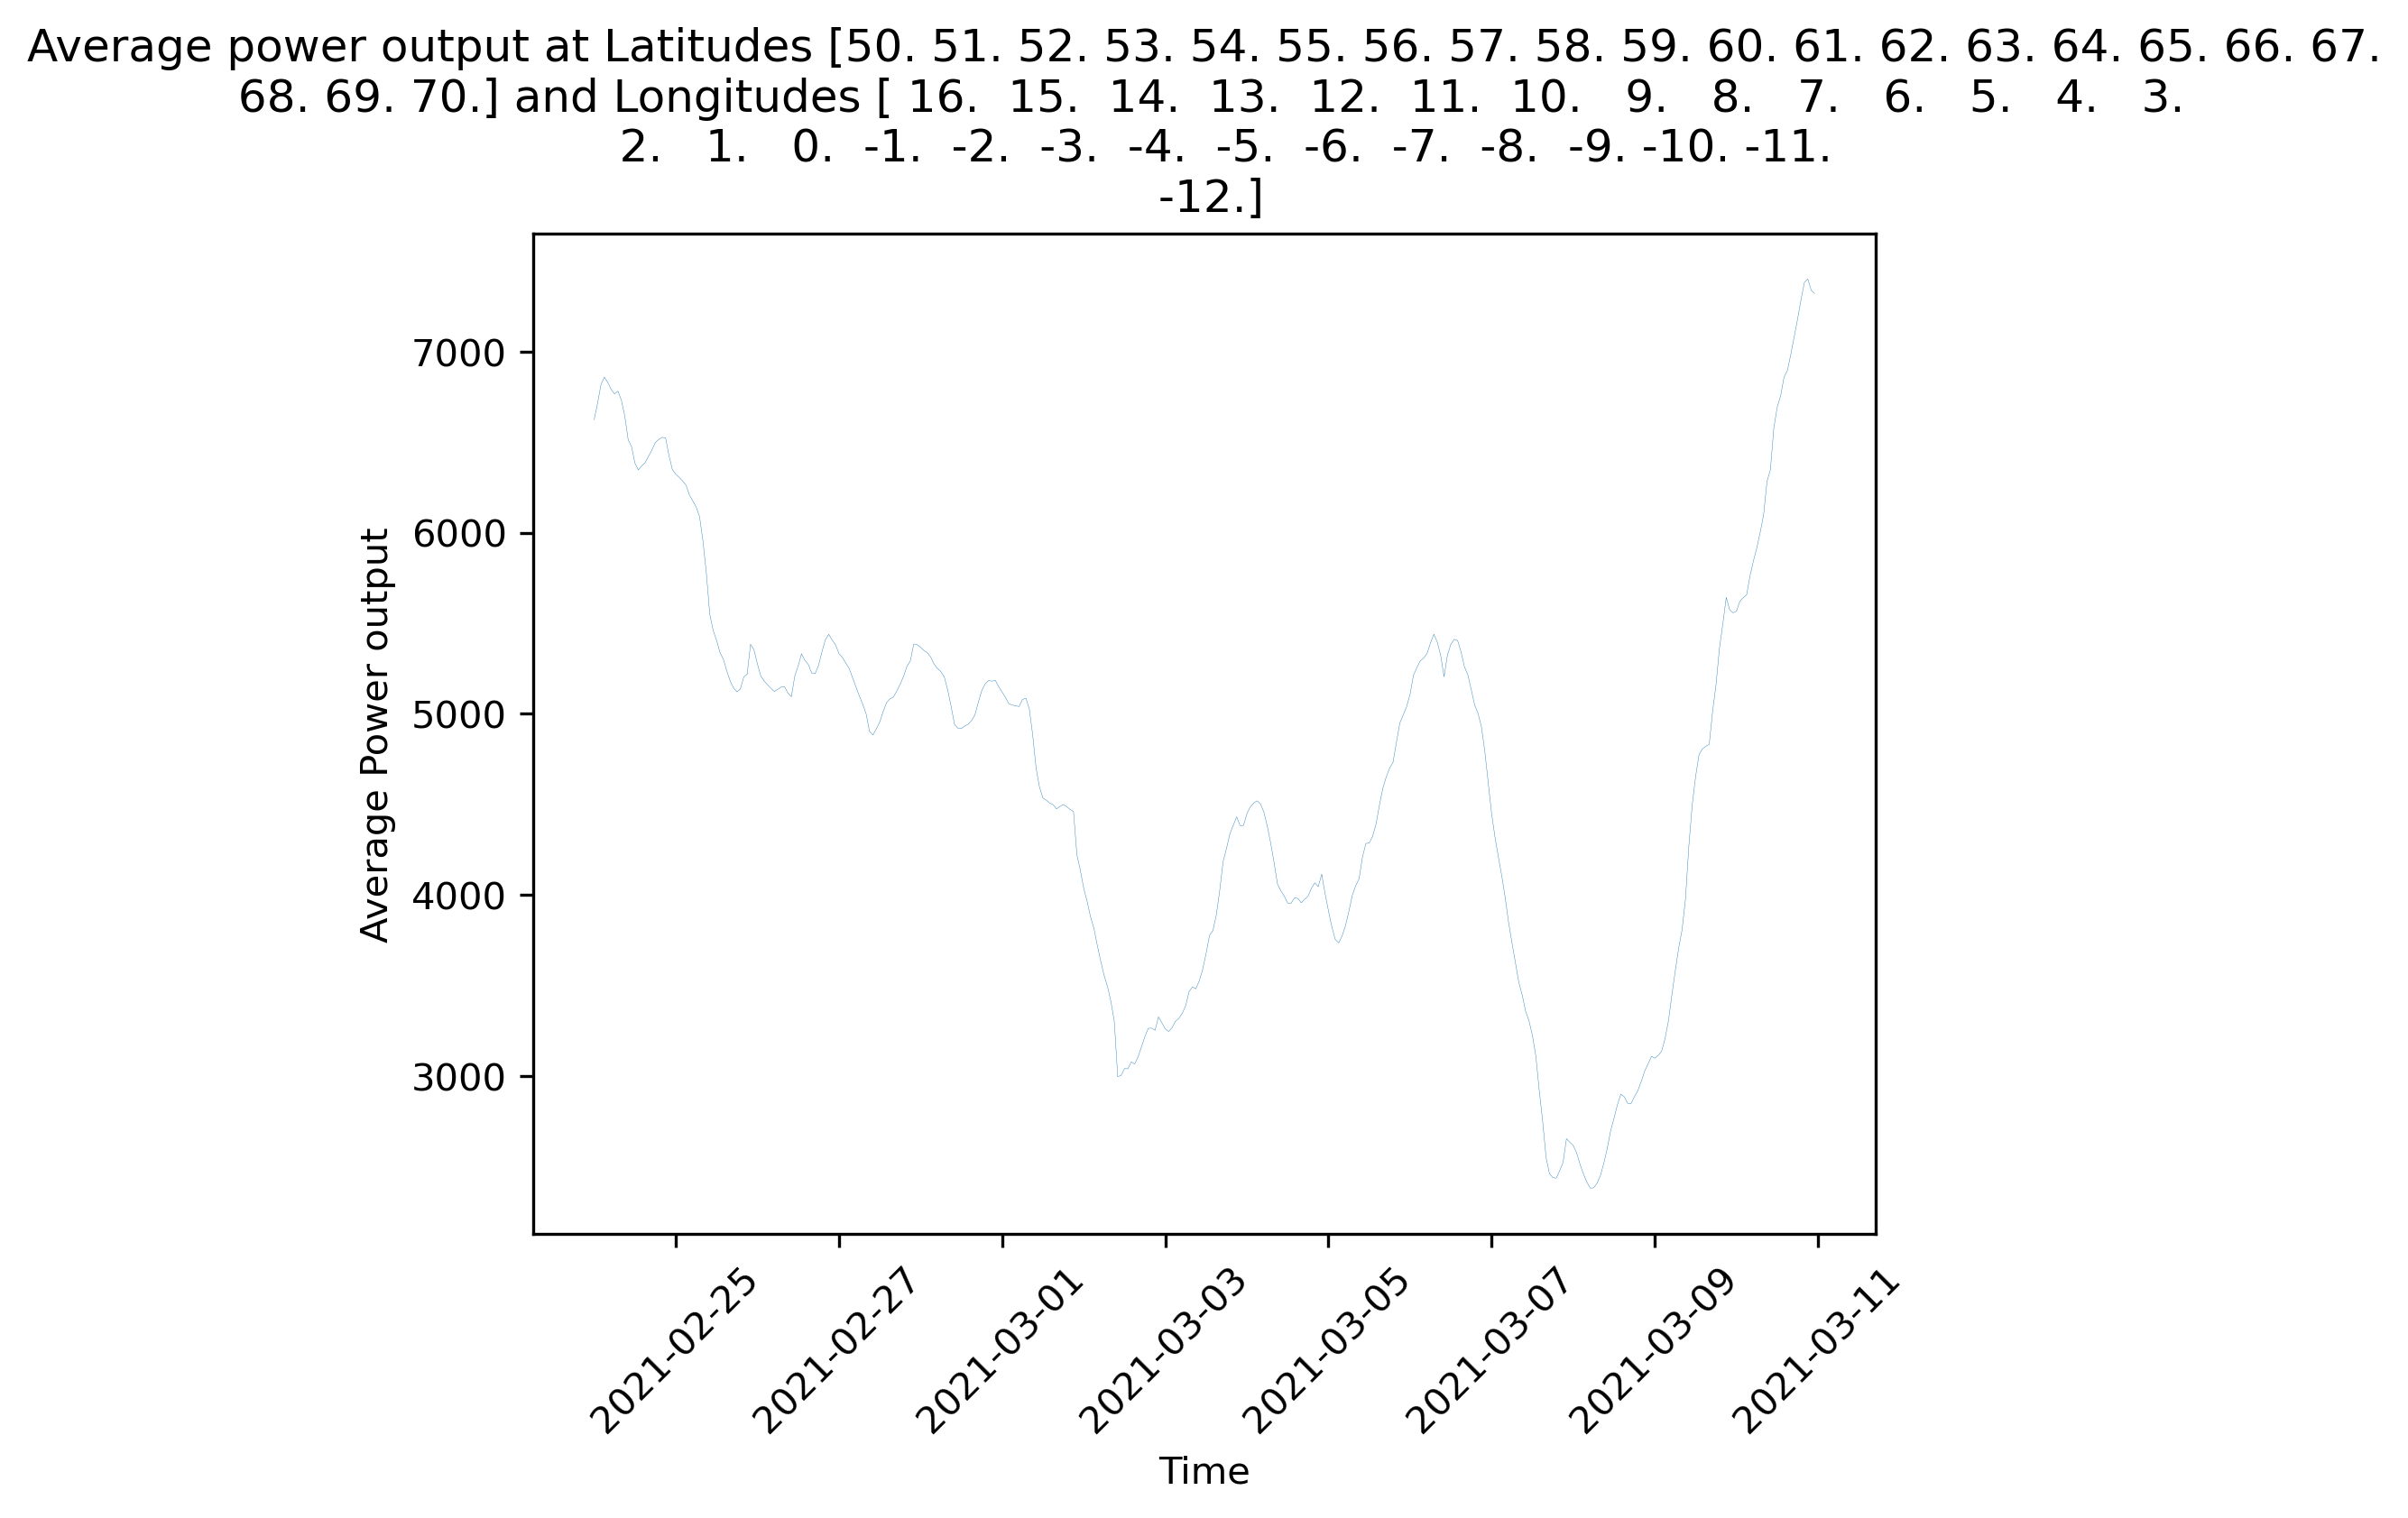

In [33]:
power_values14 = []

# Loop through the specified latitude and longitude values
for lat14 in latitudes14:
    for lon14 in longitudes14:
        # Extract power values for the given latitude, longitude, and time range
        power_values14.append(ds.sel(latitude=lat14, longitude=lon14, time=slice('2021-02-24', '2021-03-10'))['power'].values)

# Convert the list to a NumPy array for easier manipulation
power_values14 = np.array(power_values14)

# Calculate the average of the power values along the specified axis (0 for averaging along the time axis)
power_mag14 = np.mean(power_values14, axis=0)

# Extract the time values for the specified time range
time_values = ds.sel(time=slice('2021-02-24', '2021-03-10')).time.values

# Plot the average wind magnitude with time on the x-axis
plt.figure(dpi=300)
plt.plot(time_values, power_mag14, linewidth=0.1)
plt.title('Average power output at Latitudes {} and Longitudes {}'.format(latitudes14, longitudes14))
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

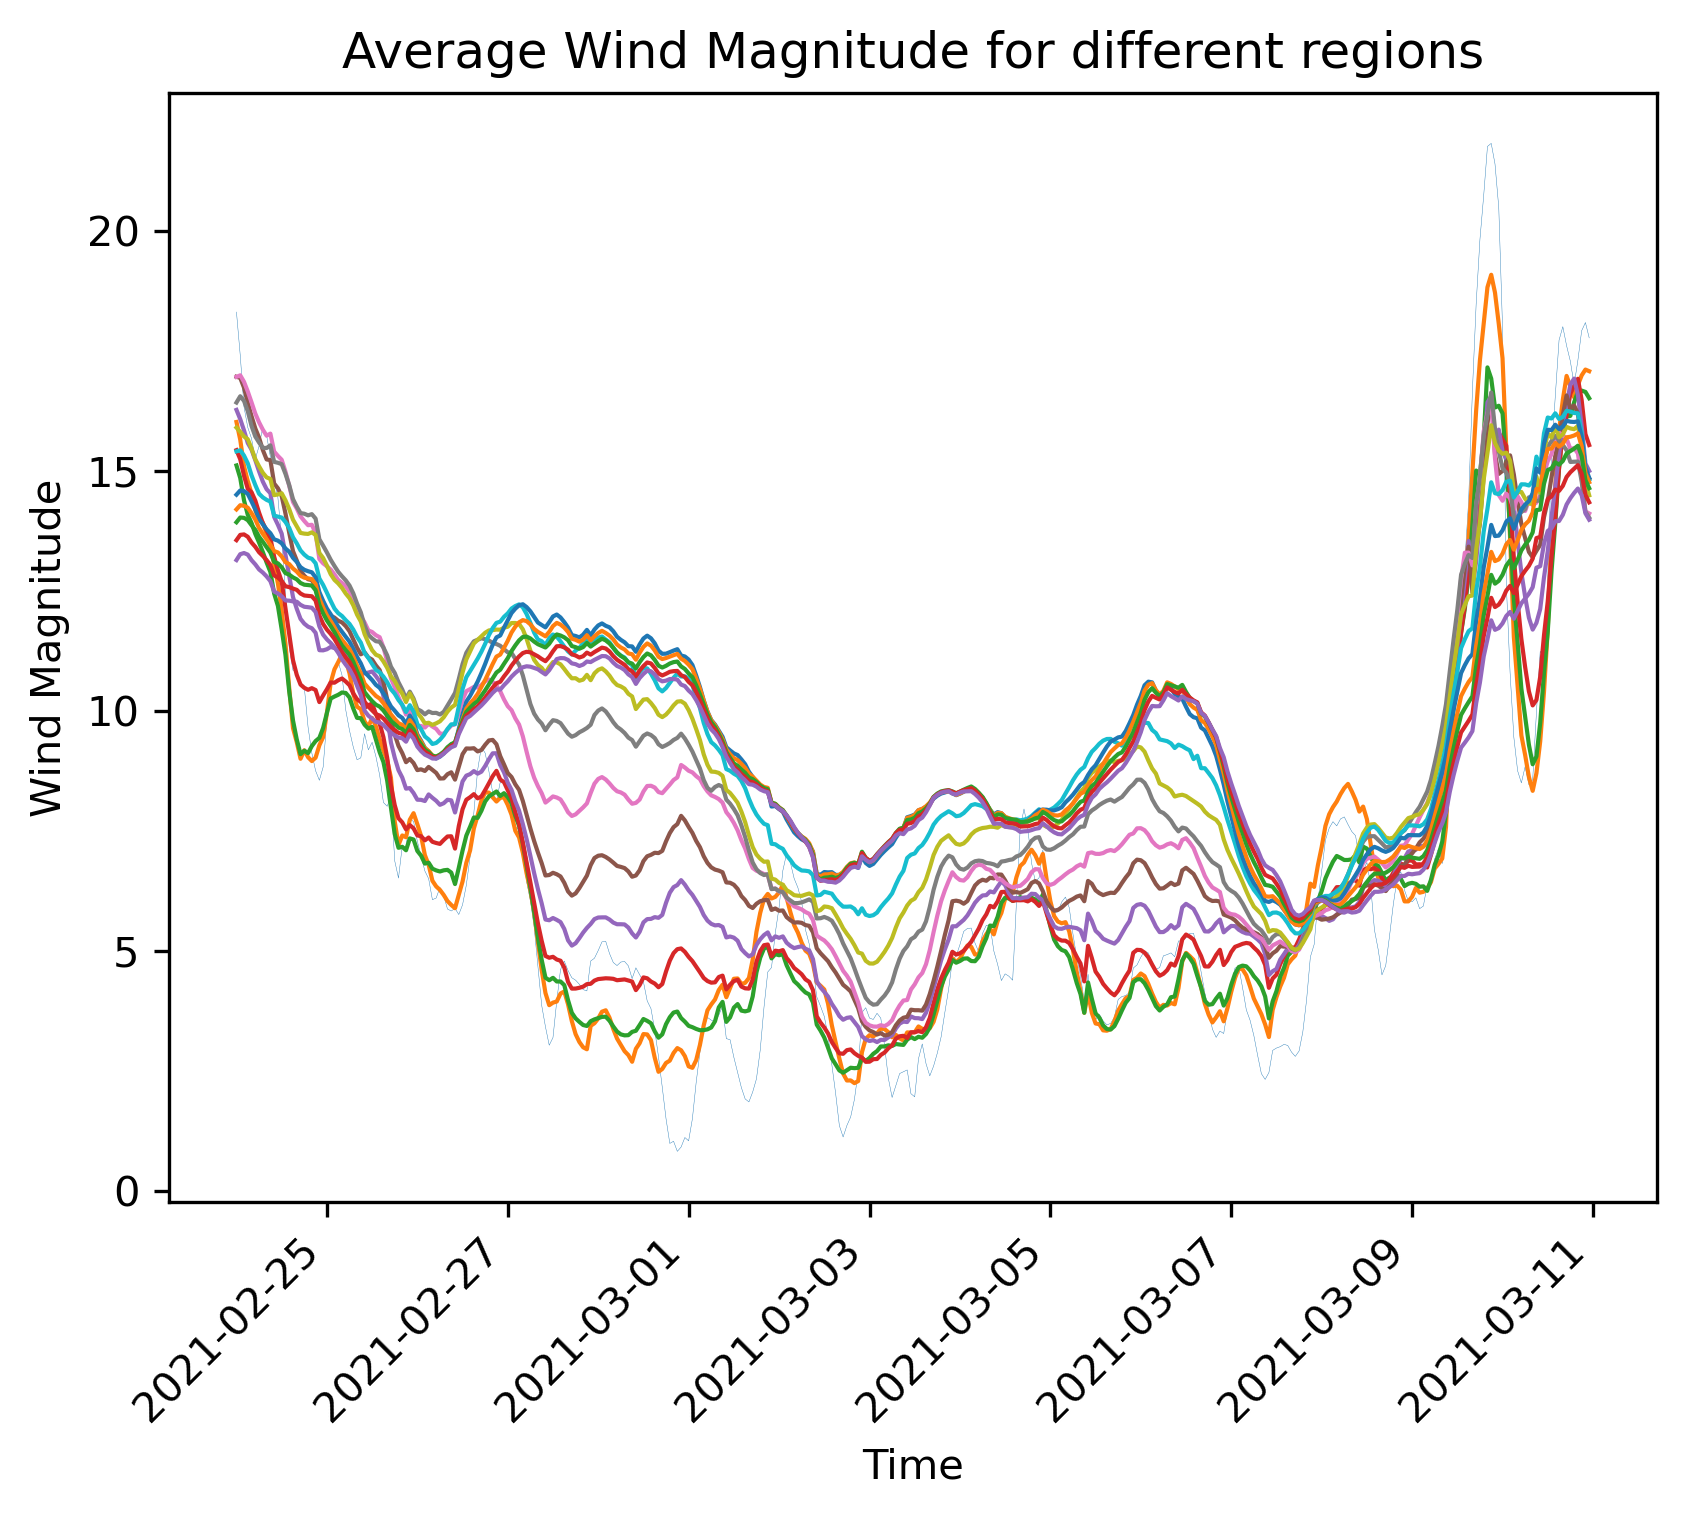

In [34]:
plt.figure(dpi=300)
ds.sel(latitude=[latitude], longitude=[longitude],time=slice('2021-02-24', '2021-03-10'))['wind_mag'].plot(linewidth=0.1)
plt.plot(time_values, average_wind_mag1, linewidth=1)
plt.plot(time_values, average_wind_mag2, linewidth=1)
plt.plot(time_values, average_wind_mag3, linewidth=1)
plt.plot(time_values, average_wind_mag4, linewidth=1)
plt.plot(time_values, average_wind_mag5, linewidth=1)
plt.plot(time_values, average_wind_mag6, linewidth=1)
plt.plot(time_values, average_wind_mag7, linewidth=1)
plt.plot(time_values, average_wind_mag8, linewidth=1)
plt.plot(time_values, average_wind_mag9, linewidth=1)
plt.plot(time_values, average_wind_mag10, linewidth=1)
plt.plot(time_values, average_wind_mag11, linewidth=1)
plt.plot(time_values, average_wind_mag12, linewidth=1)
plt.plot(time_values, average_wind_mag13, linewidth=1)
plt.plot(time_values, average_wind_mag14, linewidth=1)
plt.title('Average Wind Magnitude for different regions')
plt.xlabel('Time')
plt.ylabel('Wind Magnitude')
plt.xticks(rotation=45)
plt.show()

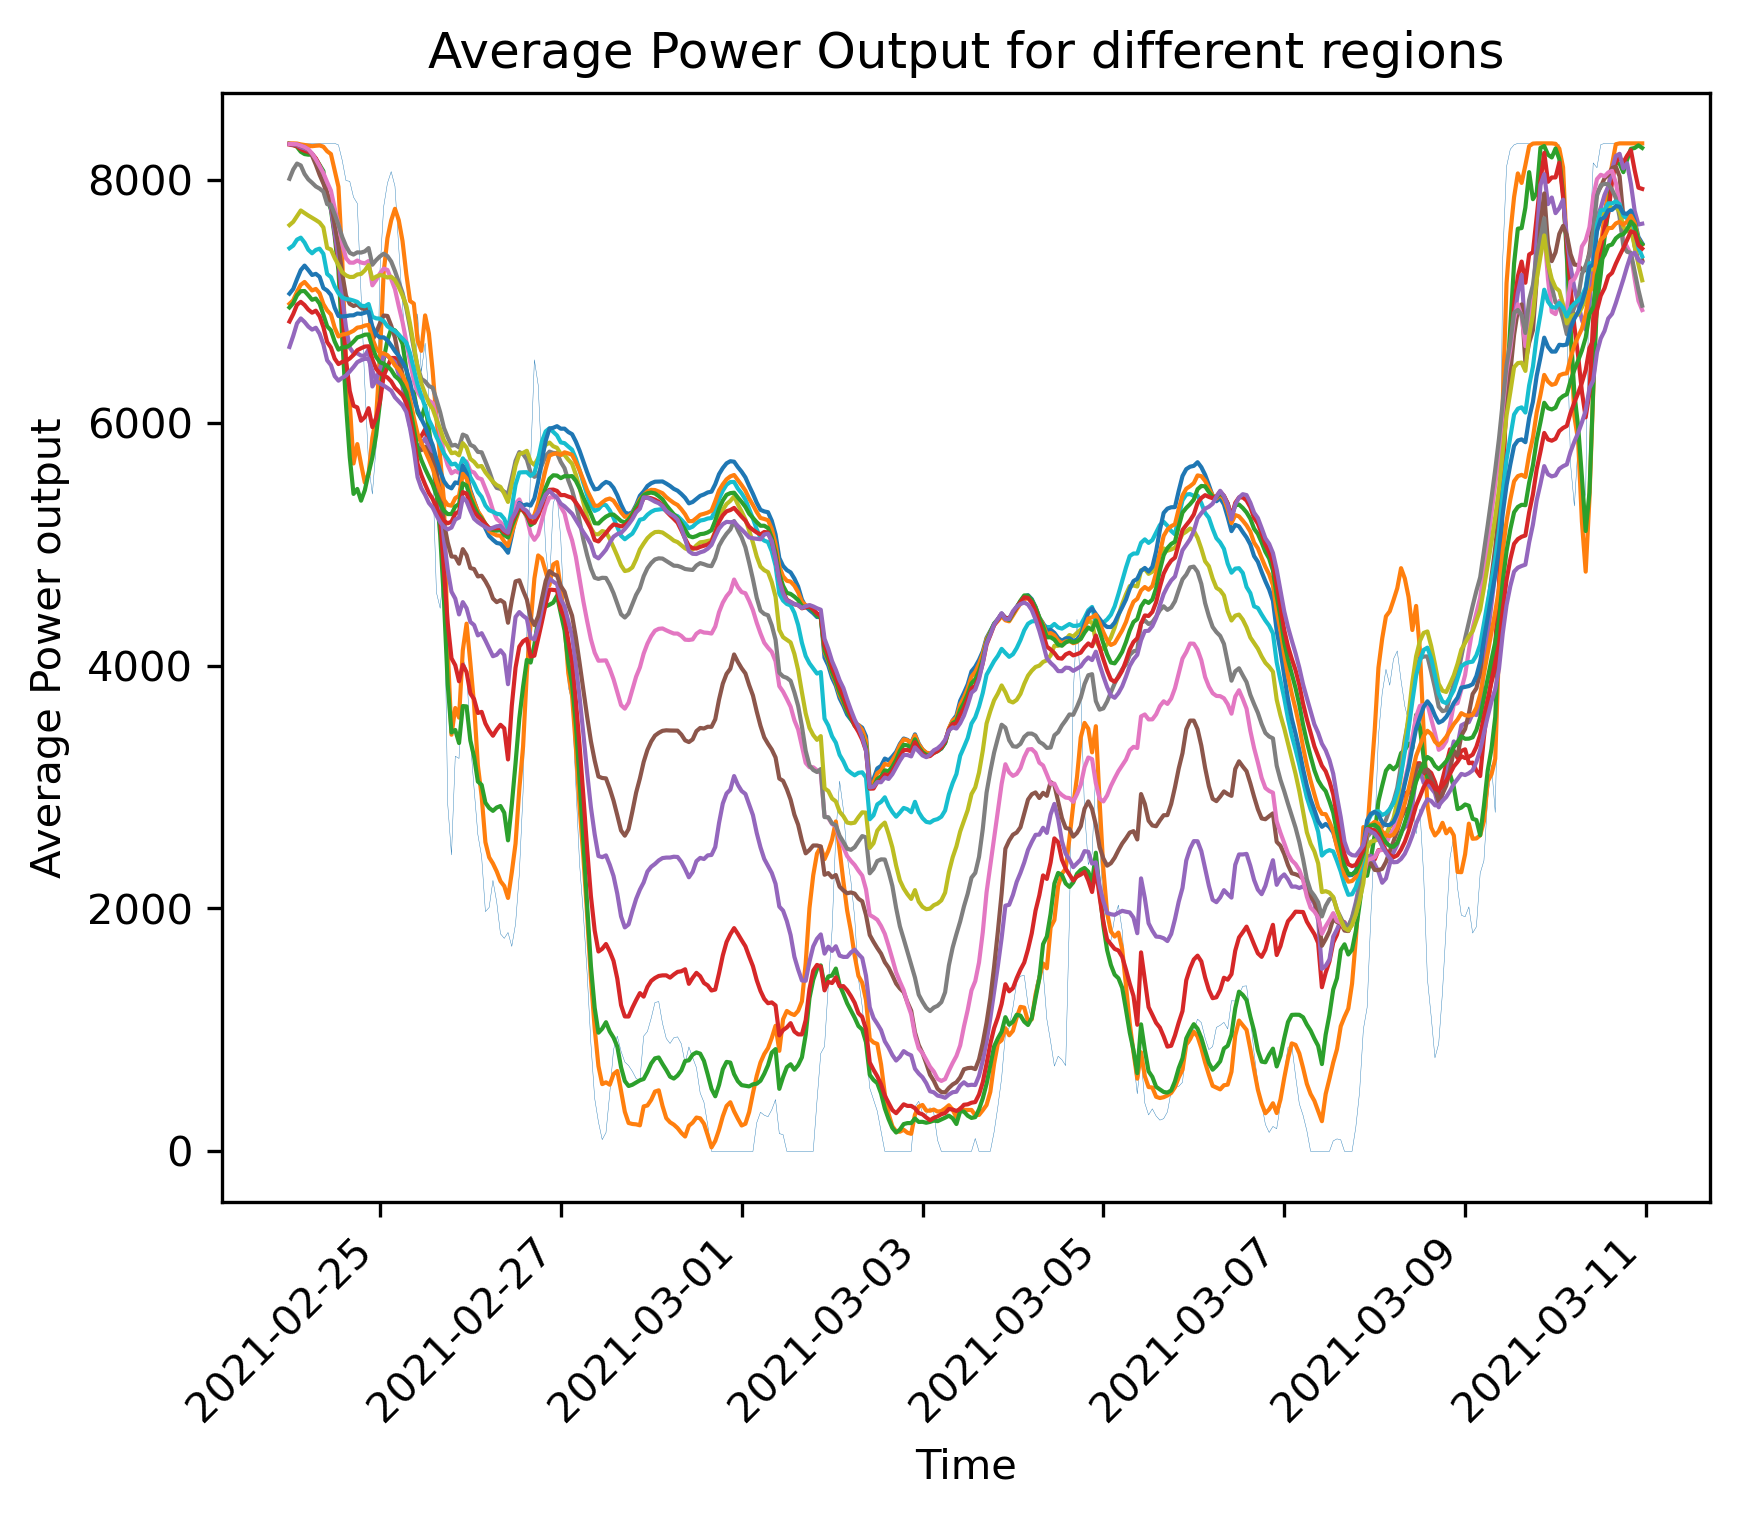

In [35]:
plt.figure(dpi=300)
ds.sel(latitude=[latitude], longitude=[longitude],time=slice('2021-02-24', '2021-03-10'))['power'].plot(linewidth=0.1)
plt.plot(time_values, power_mag1, linewidth=1)
plt.plot(time_values, power_mag2, linewidth=1)
plt.plot(time_values, power_mag3, linewidth=1)
plt.plot(time_values, power_mag4, linewidth=1)
plt.plot(time_values, power_mag5, linewidth=1)
plt.plot(time_values, power_mag6, linewidth=1)
plt.plot(time_values, power_mag7, linewidth=1)
plt.plot(time_values, power_mag8, linewidth=1)
plt.plot(time_values, power_mag9, linewidth=1)
plt.plot(time_values, power_mag10, linewidth=1)
plt.plot(time_values, power_mag11, linewidth=1)
plt.plot(time_values, power_mag12, linewidth=1)
plt.plot(time_values, power_mag13, linewidth=1)
plt.plot(time_values, power_mag14, linewidth=1)
plt.title("Average Power Output for different regions")
plt.xlabel('Time')
plt.ylabel('Average Power output')
plt.xticks(rotation=45)
plt.show()

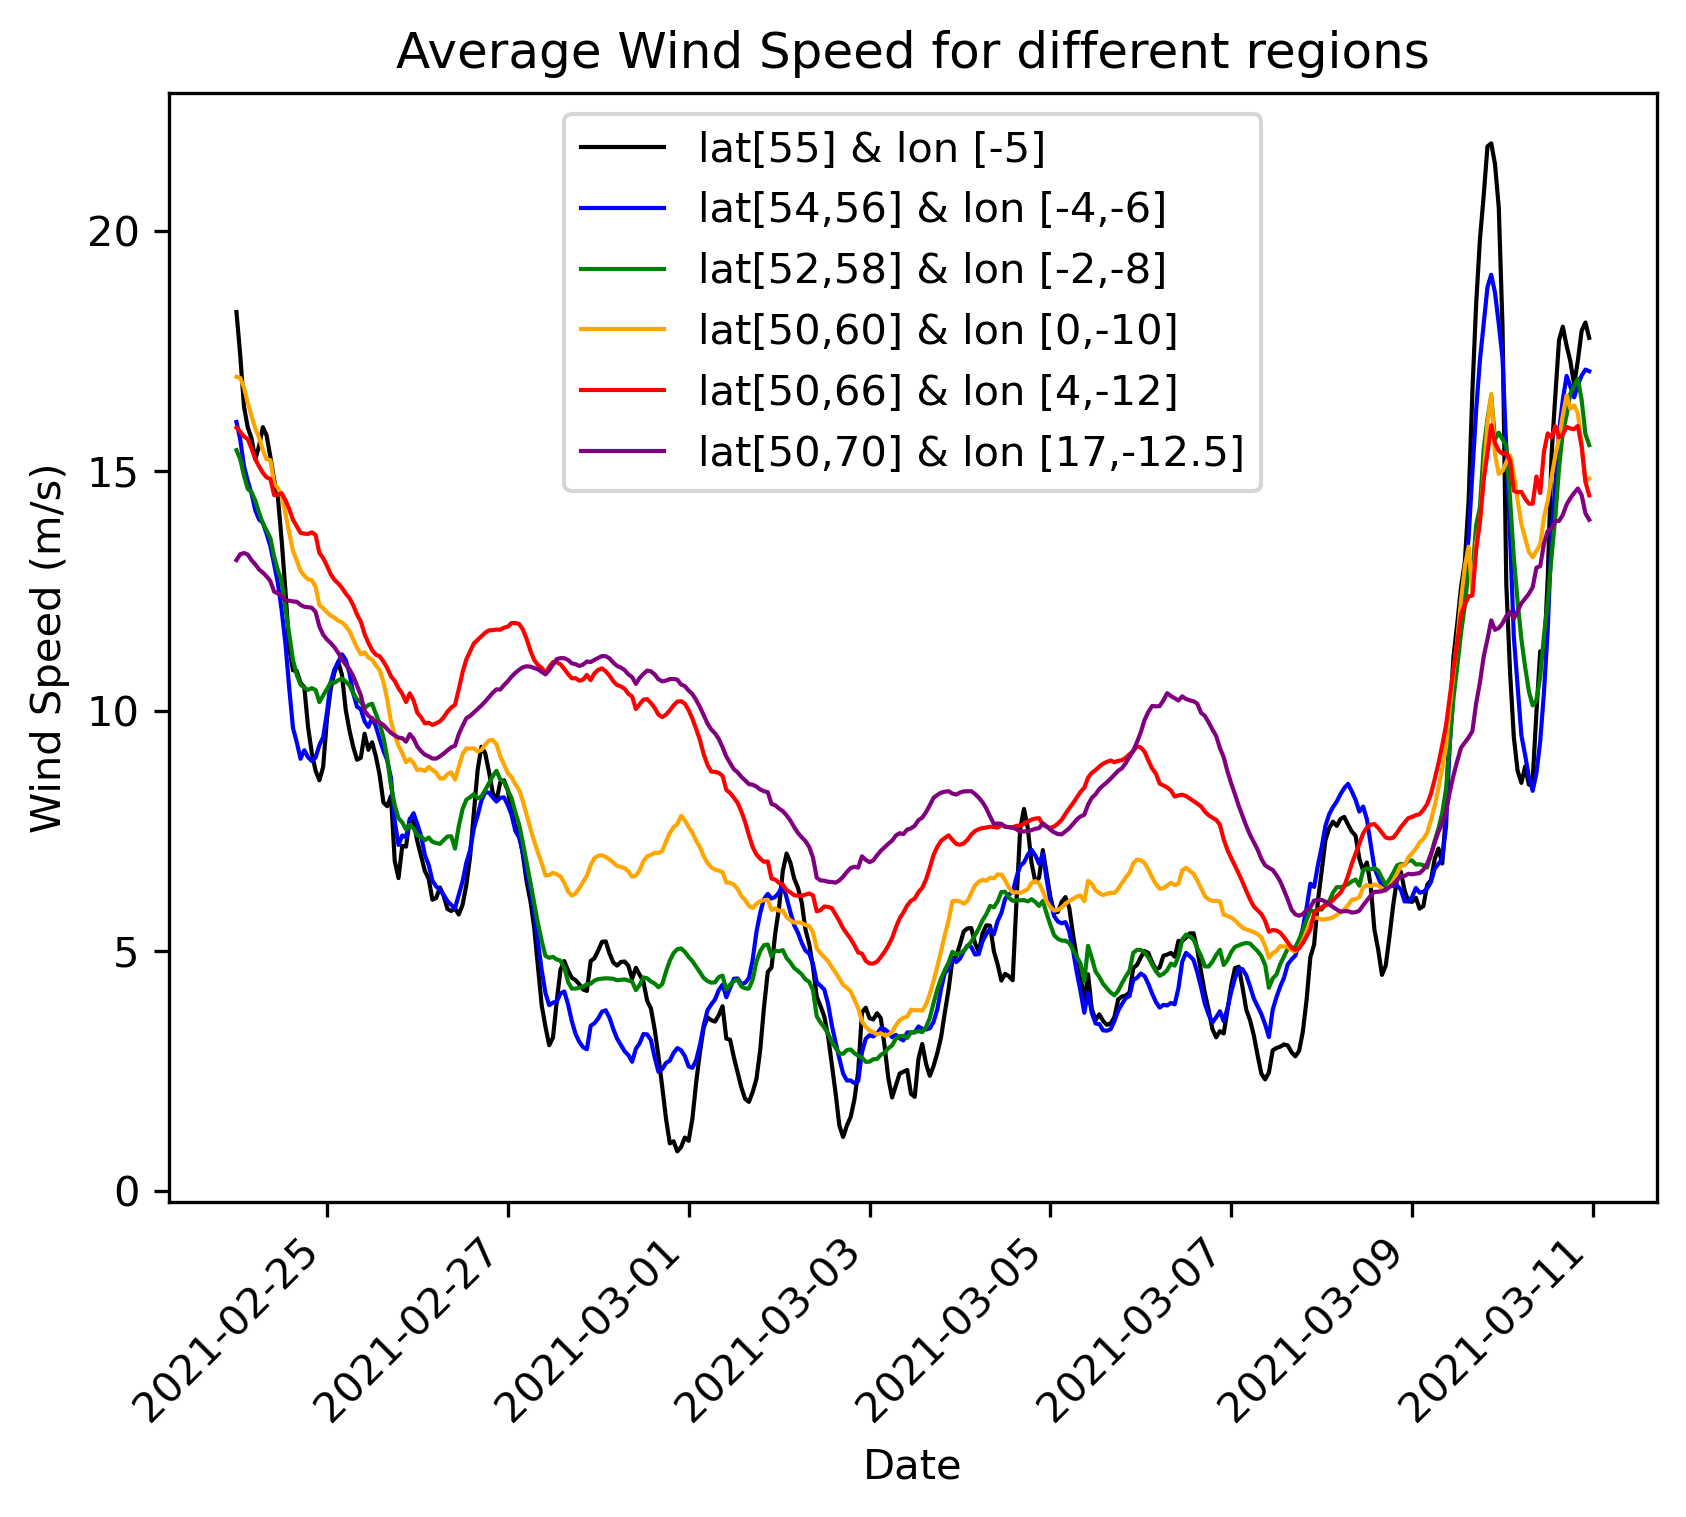

In [62]:
plt.figure(dpi=300)
ds.sel(latitude=[latitude], longitude=[longitude],time=slice('2021-02-24', '2021-03-10'))['wind_mag'].plot(linewidth=1, label= "lat[55] & lon [-5]", color = "black")
plt.plot(time_values, average_wind_mag1, linewidth=1, label = "lat[54,56] & lon [-4,-6]", color = "blue")
#plt.plot(time_values, average_wind_mag2, linewidth=1)
plt.plot(time_values, average_wind_mag3, linewidth=1, label = "lat[52,58] & lon [-2,-8]",color = "green")
#plt.plot(time_values, average_wind_mag4, linewidth=1)
plt.plot(time_values, average_wind_mag5, linewidth=1, label = "lat[50,60] & lon [0,-10]",color = "orange")
#plt.plot(time_values, average_wind_mag6, linewidth=1)
#plt.plot(time_values, average_wind_mag7, linewidth=1)
plt.plot(time_values, average_wind_mag8, linewidth=1, label = "lat[50,66] & lon [4,-12]", color = "red")
#plt.plot(time_values, average_wind_mag9, linewidth=1)
#plt.plot(time_values, average_wind_mag10, linewidth=1, label = "lat[50,60] & lon [8,-12]")
#plt.plot(time_values, average_wind_mag11, linewidth=1)
#plt.plot(time_values, average_wind_mag12, linewidth=1, label = "lat[50,60] & lon [12,-12]")
#plt.plot(time_values, average_wind_mag13, linewidth=1)
plt.plot(time_values, average_wind_mag14, linewidth=1, label = "lat[50,70] & lon [17,-12.5]", color = "purple")
plt.title("Average Wind Speed for different regions")
plt.xlabel('Date')
plt.legend(loc = "best")
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.show()

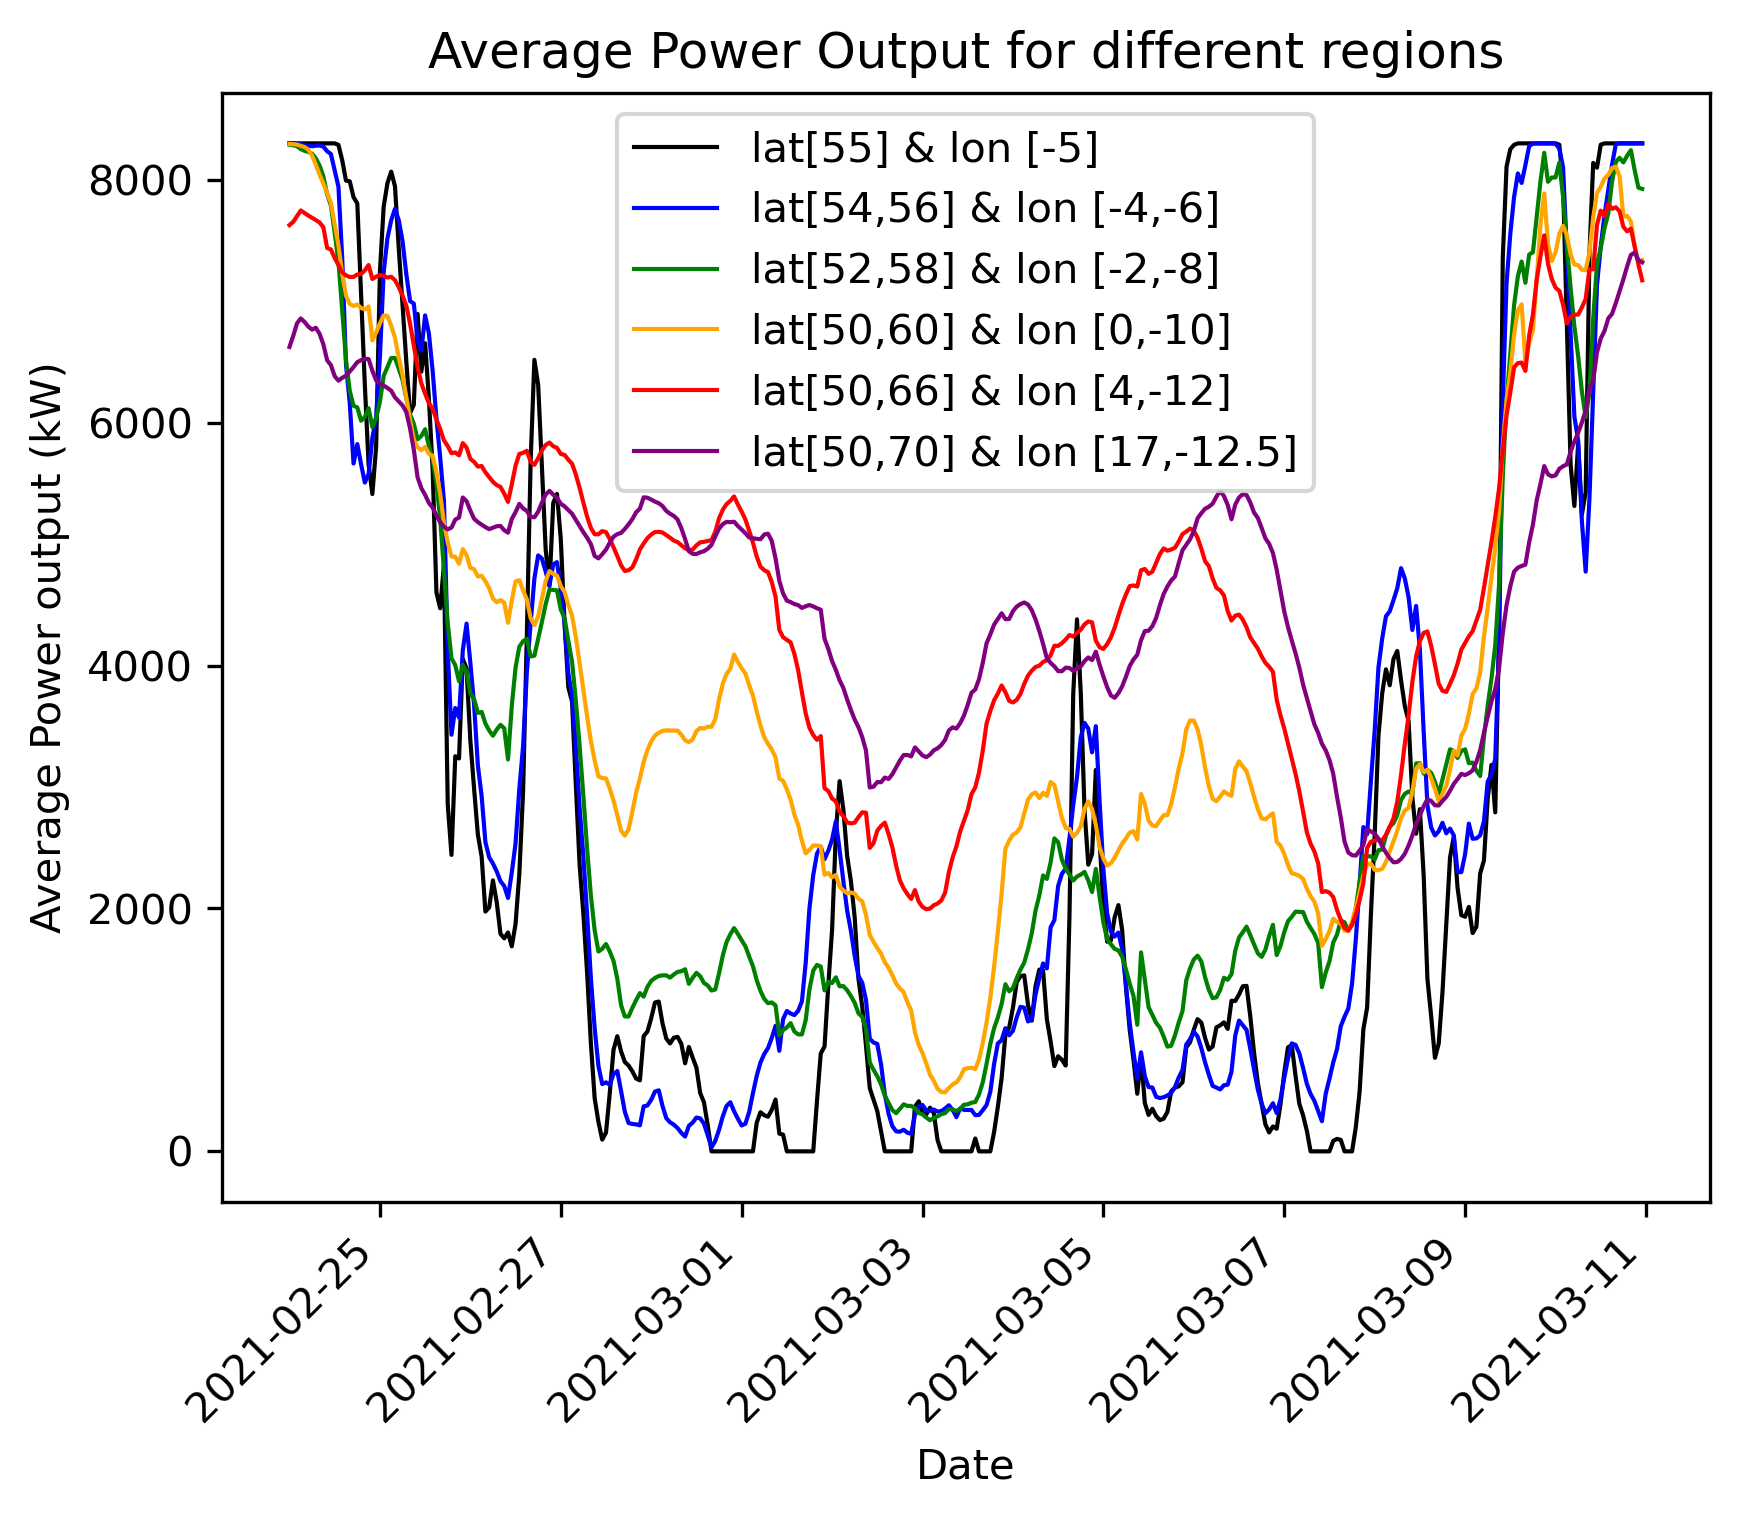

In [61]:
plt.figure(dpi=300)
ds.sel(latitude=[latitude], longitude=[longitude],time=slice('2021-02-24', '2021-03-10'))['power'].plot(linewidth=1, label= "lat[55] & lon [-5]", color = "black")
plt.plot(time_values, power_mag1, linewidth=1, label = "lat[54,56] & lon [-4,-6]", color = "blue")
#plt.plot(time_values, power_mag2, linewidth=1)
plt.plot(time_values, power_mag3, linewidth=1, label = "lat[52,58] & lon [-2,-8]",color = "green")
#plt.plot(time_values, power_mag4, linewidth=1)
plt.plot(time_values, power_mag5, linewidth=1, label = "lat[50,60] & lon [0,-10]",color = "orange")
#plt.plot(time_values, power_mag6, linewidth=1)
#plt.plot(time_values, power_mag7, linewidth=1)
plt.plot(time_values, power_mag8, linewidth=1, label = "lat[50,66] & lon [4,-12]", color = "red")
#plt.plot(time_values, power_mag9, linewidth=1)
#plt.plot(time_values, power_mag10, linewidth=1, label = "lat[50,70] & lon [8,-12]")
#plt.plot(time_values, power_mag11, linewidth=1)
#plt.plot(time_values, power_mag12, linewidth=1, label = "lat[50,60] & lon [12,-12]")
#plt.plot(time_values, power_mag13, linewidth=1)
plt.plot(time_values, power_mag14, linewidth=1, label = "lat[50,70] & lon [17,-12.5]", color = "purple")
plt.title("Average Power Output for different regions")
plt.xlabel('Date')
plt.legend(loc = "best")
plt.ylabel('Average Power output (kW)')
plt.xticks(rotation=45)
plt.show()

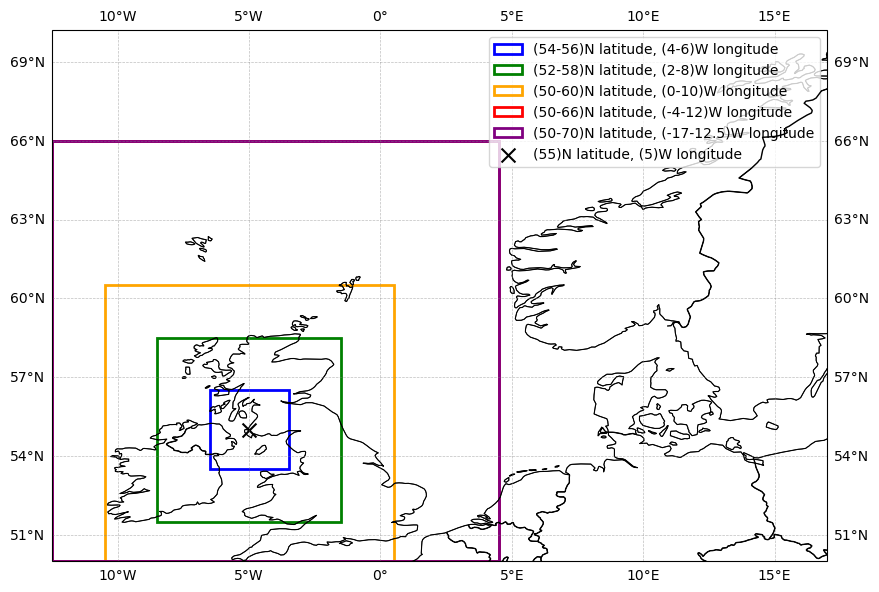

In [58]:

# Function to add a rectangular box to the map
def add_box(ax, center, width, height, edgecolor='red', linewidth=2, label=None):
    # Calculate the bottom-left corner of the box
    left = center[0] - width / 2
    bottom = center[1] - height / 2
    
    # Add the rectangular box without filling
    box = Rectangle((left, bottom), width, height, edgecolor=edgecolor, linewidth=linewidth, fill=False, transform=ccrs.PlateCarree(), label=label)
    ax.add_patch(box)

# Create a map with coastlines and wind speed overlay
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-12.5, 17, 50, 70])

# Add coastlines
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')

# Add country borders
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none'
)
ax.add_feature(countries, linestyle='-', linewidth=0.5)

# Add borders to specific countries (e.g., Germany and France)
borders = cfeature.BORDERS
ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Specify multiple boxes with different colors
boxes = [((-5, 55), 3, 3, "blue", '(54-56)N latitude, (4-6)W longitude'),
         ((-5, 55), 7, 7, "green",'(52-58)N latitude, (2-8)W longitude'),
         ((-5, 55), 11, 11,"orange",'(50-60)N latitude, (0-10)W longitude')]

# Add the rectangular boxes to the map
for box_center, box_width, box_height, box_color, label in boxes:
    add_box(ax, box_center, box_width, box_height, edgecolor=box_color, label=label)
    
box1 = Rectangle((-12.5, 50), 17, 16, edgecolor="red", linewidth=2, facecolor='none', transform=ccrs.PlateCarree(), label='(50-66)N latitude, (-4-12)W longitude')
box2 = Rectangle((-12.5, 50), 17, 16, edgecolor="purple", linewidth=2, facecolor='none', transform=ccrs.PlateCarree(), label='(50-70)N latitude, (-17-12.5)W longitude')
ax.add_patch(box1) 
ax.add_patch(box2) 
ax.scatter(-5, 55, marker='x', color='black', label='(55)N latitude, (5)W longitude', s=100, transform=ccrs.PlateCarree())


# Add legend
ax.legend()

plt.show()


